<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/5450_Project_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

Which features affect "Life expectancy at birth, total (years)" across different regions and socio economic conditions ('High income', 'Middle income','Low income')?

# Business Impact

Life expectancy prediction using health, nutrition, and population statistics holds immense business value across sectors such as healthcare, economics, policy, technology, and social services. The ability to predict life expectancy allows businesses and governments to proactively respond to health trends, allocate resources efficiently, and create targeted interventions to improve public health. It also supports the design of products and services that cater to specific population needs, ultimately enhancing business performance and societal well-being.

# Installing New Libraries

In [1]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00


In [2]:
!pip install mplcursors

In [3]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bbf9fdbef304c33c50296e97340905b623bf836296d822402ba99d042e912d38
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


# Importing Libraries

In [157]:
# imports
import pandas as pd
import copy
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from ydata_profiling import ProfileReport
import kagglehub
import itertools
import mplcursors
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import linearmodels

# Reading Data from Kaggle

In [6]:
# Download latest version
path = kagglehub.dataset_download("theworldbank/health-nutrition-and-population-statistics")

print("Path to dataset files:", path)

health_df = pd.read_csv(path + '/data.csv')
orig_health_df = copy.deepcopy(health_df)

100%|██████████| 14.0M/14.0M [00:00<00:00, 89.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/theworldbank/health-nutrition-and-population-statistics/versions/1


In [7]:
health_df.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

         1960        1961        1962        1963        1964        1965  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2  133.555013  134.159119  134.857912  134.504576  134.105211  133.569626   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   ...       2007       2008       2009       2010       2011       2012  \
0  ...        NaN        NaN        NaN        NaN        NaN        NaN   
1  ...        NaN        NaN        NaN        NaN        NaN        NaN   
2  ...  49.999851  49.887046  49.781207  49.672975  49.536047  49.383745   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN        NaN        NaN   

        2013       2014  2015  Unnamed: 60  
0        NaN        NaN   NaN          NaN  
1        NaN        NaN   NaN          NaN  
2  48.796558  48.196418   NaN          NaN  
3        NaN        NaN   NaN          NaN  
4        NaN        NaN   NaN          NaN  

[5 rows x 61 columns]

# Helper Functions

In [182]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [9]:
def plot_results(df_test_and_predicted, model):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Actual'], label='True Values') # Access the 'Actual' column data
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Predicted'], label='Predictions', linestyle='dashed') # Access the 'Predicted' column data
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.title(f'{model} Panel Data Prediction')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

In [493]:
def compare_actual_vs_predicted(X_test, y_test, y_pred, model):
    df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_actual_vs_predicted['Model'] = model
    result_df = pd.DataFrame(np.hstack((np.array(X_2_test), np.array(df_actual_vs_predicted))))
    result_df.columns = X_test.columns.tolist() + ['Actual', 'Predicted', 'Model']
    result_df['Country Name'] = result_df['Country Code'].apply(lambda x: country_dict[x])
    return df_actual_vs_predicted, result_df

In [11]:
def plot_kpi(df, x_col, y_col, hue_col):
    title_val = kpi_dict.get(y_col, y_col)
    fig = px.line(df, x=x_col, y=y_col, color=hue_col, title=title_val)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode="x")
    fig.show()

In [12]:
def show_unique_values(df):
    for e in zip(df.columns, df.dtypes):
        col_name, col_dtype = e
        if col_dtype == 'object':
            unique_values = df[col_name].unique()
            print(f"Unique values for column '{col_name}' are {unique_values}")
            print("---------------------------------------------------------------------")

In [13]:
def show_null_values(df):
    df_len = len(df)
    for col in df.columns:
        total_col_null_values = df[col].isnull().sum()
        pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
        print(f"Column '{col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
        print("---------------------------------------------------------------------")

In [14]:
def show_null_values_per_country(df, ind_col, col, country):
    df_len = len(df)
    total_col_null_values = df[col].isnull().sum()
    pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
    print(f"For country {country} indicator column '{ind_col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [15]:
def show_zero_values_per_indicator(df, ind_col):
    df_len = len(df)
    total_col_zero_values = df[ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")
    return pct_zero_values

In [16]:
def show_zero_values_per_ctry_indicator(df, ind_col, ctry):
    df_len = len(df[df['Country Name'] == ctry])
    total_col_zero_values = df[df['Country Name'] == ctry][ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For country {ctry}, indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [17]:
def impute_data(df, ctry, kpi, fill_method):
    df = df[df['Country Name'] == ctry][[kpi]]
    #df[kpi] = df[kpi].replace(0, np.nan)
    if fill_method == 'knn':
        #scaler = MinMaxScaler()
        #df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
        imputer = KNNImputer(n_neighbors=2)
        df[kpi] = imputer.fit_transform(df[[kpi]])
    elif fill_method == 'ffill':
        df.ffill(axis = 0, inplace=True)
    elif fill_method == 'ffill':
        df.ffill(axis = 0, inplace=True)
    elif fill_method == 'bfill':
        df.bfill(axis = 0, inplace=True)
    elif fill_method == 'mean':
        df.fillna(df.mean(), inplace=True)
    return list(itertools.chain(*df.values.tolist()))

# Exploratory Data Analysis

In [18]:
health_df.shape

(89010, 61)

In [19]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [20]:
health_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
Unnamed: 60       float64
Length: 61, dtype: object

In [21]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [22]:
ind_name_list = list(health_df['Indicator Name'].unique())
len(ind_name_list)

345

In [23]:
health_df.groupby(['Country Name']).agg({'Indicator Name' : np.size}).sort_values(by='Indicator Name', ascending=False)

Indicator Name
Country Name                      
Afghanistan                    345
Russian Federation             345
Namibia                        345
Nauru                          345
Nepal                          345
...                            ...
Guam                           345
Guatemala                      345
Guinea                         345
Guinea-Bissau                  345
Zimbabwe                       345

[258 rows x 1 columns]

In [24]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

# Data Processing

In [25]:
kpi_dict = dict(zip(health_df['Indicator Code'], health_df['Indicator Name']))

In [26]:
year_cols = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
             '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
             '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
             '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'
            ]

In [27]:
# Droppinmg unnamed columns
health_df.drop(columns=['Unnamed: 60'], inplace=True)
# replacing NaN with 0
for col in year_cols:
       health_df[col] = health_df[col].fillna(0)

In [28]:
'''
The data set contains both countries and conglomereate of multiple countries.
We are just extracing countries.
'''
country_name_list = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
                     'Andorra', 'Angola', 'Antigua and Barbuda','Argentina',
                     'Armenia', 'Aruba', 'Australia', 'Austria','Azerbaijan',
                     'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
                     'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
                     'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
                     'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
                     'Bulgaria', 'Burkina Faso', 'Burundi',
                     'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                     'Cayman Islands', 'Central African Republic', 'Chad',
                     'Channel Islands', 'Chile', 'China', 'Colombia',
                     'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
                     "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
                     'Czech Republic',
                     'Denmark',
                     'Djibouti',
                     'Dominica',
                     'Dominican Republic',
                     'Ecuador',
                     'Egypt, Arab Rep.',
                     'El Salvador',
                     'Equatorial Guinea',
                     'Eritrea',
                     'Estonia',
                     'Ethiopia',
                     'Faroe Islands',
                     'Fiji',
                     'Finland',
                     'France',
                     'French Polynesia',
                     'Gabon',
                     'Gambia, The',
                     'Georgia',
                     'Germany',
                     'Ghana',
                     'Gibraltar',
                     'Greece',
                     'Greenland',
                     'Grenada',
                     'Guam',
                     'Guatemala',
                     'Guinea',
                     'Guinea-Bissau',
                     'Guyana',
                     'Haiti',
                     'Honduras',
                     'Hong Kong SAR, China',
                     'Hungary',
                     'Iceland',
                     'India',
                     'Indonesia',
                     'Iran, Islamic Rep.',
                     'Iraq',
                     'Ireland',
                     'Isle of Man',
                     'Israel',
                     'Italy',
                     'Jamaica',
                     'Japan',
                     'Jordan',
                     'Kazakhstan',
                     'Kenya',
                     'Kiribati',
                     'Korea, Dem. People’s Rep.',
                     'Korea, Rep.',
                     'Kosovo',
                     'Kuwait',
                     'Kyrgyz Republic',
                     'Lao PDR',
                     'Latvia',
                     'Lebanon',
                     'Lesotho',
                     'Liberia',
                     'Libya',
                     'Liechtenstein',
                     'Lithuania',
                     'Luxembourg',
                     'Macao SAR, China',
                     'Macedonia, FYR',
                     'Madagascar',
                     'Malawi',
                     'Malaysia',
                     'Maldives',
                     'Mali',
                     'Malta',
                     'Marshall Islands',
                     'Mauritania',
                     'Mauritius',
                     'Mexico',
                     'Micronesia, Fed. Sts.',
                     'Moldova',
                     'Monaco',
                     'Mongolia',
                     'Montenegro',
                     'Morocco',
                     'Mozambique',
                     'Myanmar',
                     'Namibia',
                     'Nauru',
                     'Nepal',
                     'Netherlands',
                     'New Caledonia',
                     'New Zealand',
                     'Nicaragua',
                     'Niger',
                     'Nigeria',
                     'Northern Mariana Islands',
                     'Norway',
                     'Oman',
                     'Pakistan',
                     'Palau',
                     'Panama',
                     'Papua New Guinea',
                     'Paraguay',
                     'Peru',
                     'Philippines',
                     'Poland',
                     'Portugal',
                     'Puerto Rico',
                     'Qatar',
                     'Romania',
                     'Russian Federation',
                     'Rwanda',
                     'Samoa',
                     'San Marino',
                     'Sao Tome and Principe',
                     'Saudi Arabia',
                     'Senegal',
                     'Serbia',
                     'Seychelles',
                     'Sierra Leone',
                     'Singapore',
                     'Sint Maarten (Dutch part)',
                     'Slovak Republic',
                     'Slovenia',
                     'Solomon Islands',
                     'Somalia',
                     'South Africa',
                     'South Sudan',
                     'Spain',
                     'Sri Lanka',
                     'St. Kitts and Nevis',
                     'St. Lucia',
                     'St. Martin (French part)',
                     'St. Vincent and the Grenadines',
                     'Sudan',
                     'Suriname',
                     'Swaziland',
                     'Sweden',
                     'Switzerland',
                     'Syrian Arab Republic',
                     'Tajikistan',
                     'Tanzania',
                     'Thailand',
                     'Timor-Leste',
                     'Togo',
                     'Tonga',
                     'Trinidad and Tobago',
                     'Tunisia',
                     'Turkey',
                     'Turkmenistan',
                     'Turks and Caicos Islands',
                     'Tuvalu',
                     'Uganda',
                     'Ukraine',
                     'United Arab Emirates',
                     'United Kingdom',
                     'United States',
                     'Uruguay',
                     'Uzbekistan',
                     'Vanuatu',
                     'Venezuela, RB',
                     'Vietnam',
                     'Virgin Islands (U.S.)',
                     'West Bank and Gaza',
                     'Yemen, Rep.',
                     'Zambia',
                     'Zimbabwe'
                     ]

In [29]:
country_year_health_df = health_df[health_df['Country Name'].isin(country_name_list)].reset_index(drop=True)
country_year_health_df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

      1960     1961     1962     1963     1964     1965  ...       2006  \
0    0.000    0.000    0.000    0.000    0.000    0.000  ...     0.0000   
1    0.000    0.000    0.000    0.000    0.000    0.000  ...     0.0000   
2  145.321  145.321  145.321  145.321  145.321  145.321  ...   123.1616   
3    0.000    0.000    0.000    0.000    0.000    0.000  ...  3300.0000   
4    0.000    0.000    0.000    0.000    0.000    0.000  ...   500.0000   

      2007       2008       2009       2010       2011      2012       2013  \
0     0.00     0.0000     0.0000     0.0000     1.5000     0.000     0.0000   
1     0.00     0.0000     0.0000     0.0000     0.0000     0.000     0.0000   
2   117.39   111.4708   105.5516    99.6324    93.7132    87.794    82.2638   
3  3500.00  3800.0000  4200.0000  4500.0000  4900.0000  5300.000  5900.0000   
4  1000.00  1000.0000  1000.0000  1000.0000  1000.0000  1000.000  1000.0000   

        2014    2015  
0     0.0000     0.0  
1     0.0000     0.0  
2    76.7336     0.0  
3  6400.0000  6900.0  
4  1000.0000  1000.0  

[5 rows x 60 columns]

In [30]:
# Reading GDP data
gdp_data = pd.read_csv('gdp.csv')
orig_gdp_data = copy.deepcopy(gdp_data)
gdp_data = gdp_data[~gdp_data['Country Name'].isna()]
gdp_data = gdp_data[gdp_data['Country Name'].isin(country_name_list)]
gdp_data.set_index('Country Name', inplace=True) # Setting the country code as index column
gdp_data_t = gdp_data.T
gdp_country_avg = gdp_data_t.mean(axis=0)
# Fill NaN values with the row means
gdp_data_t.fillna(gdp_country_avg, axis=0, inplace=True)
gdp_data = gdp_data_t.T
gdp_data = gdp_data.dropna()
for col in gdp_data.columns:
    gdp_data[col] = gdp_data[col].astype('float64').astype('int')
gdp_data.shape

(209, 26)

In [31]:
gdp_data.head()

1990 [YR1990]  1991 [YR1991]  1992 [YR1992]  1993 [YR1993]  \
Country Name                                                                 
Afghanistan       11168859317    11168859317    11168859317    11168859317   
Albania            2028553750     1099559028      652174991     1185315468   
Algeria           62048507531    45715676428    48003133347    49945584453   
American Samoa      573428571      573428571      573428571      573428571   
Andorra            1028989692     1106891362     1209992020     1007090270   

                1994 [YR1994]  1995 [YR1995]  1996 [YR1996]  1997 [YR1997]  \
Country Name                                                                 
Afghanistan       11168859317    11168859317    11168859317    11168859317   
Albania            1880950864     2392764853     3199640815     2258513974   
Algeria           42543176829    41764291672    46941554225    48177612042   
American Samoa      573428571      573428571      573428571      573428571   
Andorra            1017544069     1178745283     1224024139     1180645572   

                1998 [YR1998]  1999 [YR1999]  ...  2006 [YR2006]  \
Country Name                                  ...                  
Afghanistan       11168859317    11168859317  ...     6971758282   
Albania            2545964541     3212121651  ...     8896075005   
Algeria           48187781984    48640671735  ...   123084258693   
American Samoa      573428571      573428571  ...      493000000   
Andorra            1211953994     1240295103  ...     3459337986   

                2007 [YR2007]  2008 [YR2008]  2009 [YR2009]  2010 [YR2010]  \
Country Name                                                                 
Afghanistan        9747886187    10109297048    12416152732    15856668556   
Albania           10677324853    12881352894    12044205550    11926926616   
Algeria          142482739810   180383848331   150317292079   177785053940   
American Samoa      518000000      560000000      675000000      573000000   
Andorra            3957625367     4102319399     3688976341     3449925739   

                2011 [YR2011]  2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  \
Country Name                                                                 
Afghanistan       17805098206    19907329778    20146416758    20497128556   
Albania           12890760315    12319834195    12776224497    13228147516   
Algeria          218331946925   227143746076   229701430292   238942664193   
American Samoa      570000000      640000000      638000000      643000000   
Andorra            3629133574     3188652765     3193512950     3271685597   

                2015 [YR2015]  
Country Name                   
Afghanistan       19134221645  
Albania           11386853113  
Algeria          187493855609  
American Samoa      673000000  
Andorra            2789881259  

[5 rows x 26 columns]

In [32]:
gdp_data.tail()

1990 [YR1990]  1991 [YR1991]  1992 [YR1992]  \
Country Name                                                         
Virgin Islands (U.S.)     4017500000     4017500000     4017500000   
West Bank and Gaza        6741731818     6741731818     6741731818   
Yemen, Rep.              12643821569    14665445462    17959367194   
Zambia                    3285217391     3376791460     3181921788   
Zimbabwe                  8783816700     8641481700     6751472200   

                       1993 [YR1993]  1994 [YR1994]  1995 [YR1995]  \
Country Name                                                         
Virgin Islands (U.S.)     4017500000     4017500000     4017500000   
West Bank and Gaza        6741731818     2843300000     3282800000   
Yemen, Rep.              21736802664    28019483764    12796345679   
Zambia                    3273505344     3656806166     3806983413   
Zimbabwe                  6563813300     6890675000     7111270700   

                       1996 [YR1996]  1997 [YR1997]  1998 [YR1998]  \
Country Name                                                         
Virgin Islands (U.S.)     4017500000     4017500000     4017500000   
West Bank and Gaza        3409600000     3759800000     4067800000   
Yemen, Rep.               6496163616     6838298531     6322175566   
Zambia                    3597220962     4303288480     3537741942   
Zimbabwe                  8553146600     8529571600     6401968200   

                       1999 [YR1999]  ...  2006 [YR2006]  2007 [YR2007]  \
Country Name                          ...                                 
Virgin Islands (U.S.)     4017500000  ...     4484000000     4784000000   
West Bank and Gaza        4271200000  ...     5348300000     5815700000   
Yemen, Rep.               7639325296  ...    19063143370    21650528674   
Zambia                    3404284891  ...    12756858899    14056957976   
Zimbabwe                  6858013100  ...     5443896500     5291950100   

                       2008 [YR2008]  2009 [YR2009]  2010 [YR2010]  \
Country Name                                                         
Virgin Islands (U.S.)     4244000000     4201000000     4324000000   
West Bank and Gaza        7310400000     8085700000     9681500000   
Yemen, Rep.              26910855807    25130278213    30906749533   
Zambia                   17910858638    15328342304    20265559484   
Zimbabwe                  4415702800     9665793300    12041655200   

                       2011 [YR2011]  2012 [YR2012]  2013 [YR2013]  \
Country Name                                                         
Virgin Islands (U.S.)     4223000000     4089000000     3738000000   
West Bank and Gaza       11186100000    12208400000    13515500000   
Yemen, Rep.              32726417878    35401331610    40415233436   
Zambia                   23459515276    25503060420    28037239463   
Zimbabwe                 14101920300    17114849900    19091020000   

                       2014 [YR2014]  2015 [YR2015]  
Country Name                                         
Virgin Islands (U.S.)     3565000000     3663000000  
West Bank and Gaza       13989700000    13972400000  
Yemen, Rep.              43228585321    42444490074  
Zambia                   27141023558    21251216799  
Zimbabwe                 19495519600    19963120600  

[5 rows x 26 columns]

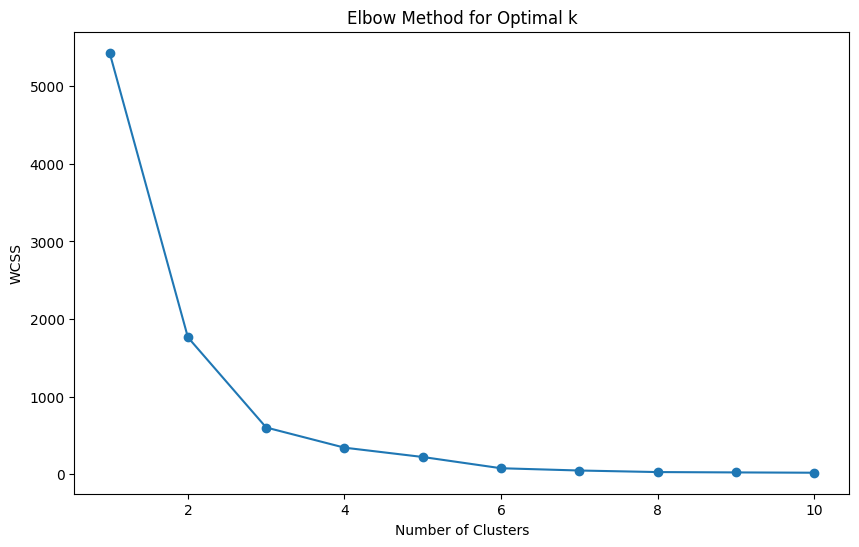

In [33]:
scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp_data)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gdp_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# Step 5: Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
gdp_data['cluster'] = kmeans.fit_predict(gdp_scaled)

In [34]:
gdp_data.groupby('cluster').mean()

1990 [YR1990]  1991 [YR1991]  1992 [YR1992]  1993 [YR1993]  \
cluster                                                               
0         3.900996e+10   4.011264e+10   4.165690e+10   4.058422e+10   
1         5.963144e+12   6.158129e+12   6.520327e+12   6.858559e+12   
2         1.477001e+12   1.593113e+12   1.740080e+12   1.750360e+12   

         1994 [YR1994]  1995 [YR1995]  1996 [YR1996]  1997 [YR1997]  \
cluster                                                               
0         4.385657e+10   4.952728e+10   5.254683e+10   5.291888e+10   
1         7.287236e+12   7.639749e+12   8.073122e+12   8.577552e+12   
2         1.900314e+12   2.164306e+12   2.103689e+12   1.986953e+12   

         1998 [YR1998]  1999 [YR1999]  ...  2006 [YR2006]  2007 [YR2007]  \
cluster                                ...                                 
0         5.052633e+10   5.000497e+10  ...   9.617501e+10   1.135939e+11   
1         9.062817e+12   9.631172e+12  ...   1.381558e+13   1.447423e+13   
2         1.965545e+12   2.059727e+12  ...   2.887836e+12   3.253310e+12   

         2008 [YR2008]  2009 [YR2009]  2010 [YR2010]  2011 [YR2011]  \
cluster                                                               
0         1.288945e+11   1.175418e+11   1.353687e+11   1.546516e+11   
1         1.476986e+13   1.447807e+13   1.504897e+13   1.559973e+13   
2         3.619108e+12   3.519350e+12   3.752117e+12   4.226328e+12   

         2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  
cluster                                                              
0         1.570434e+11   1.617832e+11   1.632914e+11   1.438040e+11  
1         1.625397e+13   1.688068e+13   1.760814e+13   1.829502e+13  
2         4.301568e+12   4.375876e+12   4.557399e+12   4.344638e+12  

[3 rows x 26 columns]

In [35]:
gdp_data[gdp_data['cluster'] == 0].index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela, RB', 'Virgin Islands (U.S.)', 'West Bank and Gaza',
       'Yemen, Rep.', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=202)

In [36]:
gdp_data[gdp_data['cluster'] == 1].index

Index(['United States'], dtype='object', name='Country Name')

In [37]:
gdp_data[gdp_data['cluster'] == 2].index

Index(['China', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom'], dtype='object', name='Country Name')

In [38]:
gdp_dict = gdp_data['cluster'].to_dict()

In [39]:
#health_df_1 = country_year_health_df.set_index(['Country Name', 'Indicator Code'])[year_cols].unstack()
#health_df_1

In [40]:
'''
Formatting the dataframe structure.
In the original dataframe, the data is laid out for each country-kpi, data is
present in each row across the years.
In the new format, we are placing all the kpis for a country in a single row.
There will be multiple rows for each country pertaining to each year
ranging from 1960 thru 2015.
'''
comb_list = [list(country_year_health_df['Country Name'].unique())] + [year_cols]
result = list(itertools.product(*comb_list))
df_x = pd.DataFrame(result, columns=['Country Name', 'Year'])
for col in country_year_health_df['Indicator Code'].unique():
    df_x[col] = 0
df_x.set_index(['Country Name', 'Year'], inplace=True)
df_x.reset_index(inplace=True)
col_list = list(df_x.columns)

# Create an empty list to store the DataFrames
all_dfs = []
for ctry in country_year_health_df['Country Name'].unique():
    temp_df = country_year_health_df[country_year_health_df['Country Name'] == ctry].iloc[:, 3:].T
    series_names = temp_df.iloc[0, :]
    temp_df = temp_df.iloc[1:, :]
    temp_df.columns = series_names
    temp_df['Country Name'] = ctry
    temp_df.reset_index(inplace=True)
    temp_df.rename(columns={'index' : 'Year'}, inplace=True)
    temp_df = temp_df[col_list]

    # Append the temp_df to the list instead of using append
    all_dfs.append(temp_df)

# Concatenate all DataFrames in the list outside the loop
df_x = pd.concat(all_dfs, ignore_index=True)

<ipython-input-40-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-40-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-40-3a7555b5af9e>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-inpu

In [41]:
df_x['gdp_cluster'] = 0
for ctry in gdp_dict.keys():
    gdp_val = 0
    if gdp_dict[ctry] == 2:
        gdp_val = 1
    elif gdp_dict[ctry] == 2:
        gdp_val = 1
    df_x.loc[df_x['Country Name'] == ctry, 'GDP Cluster'] = gdp_dict[ctry]

In [42]:
df_x.head(50)

Indicator Code Country Name  Year SH.HIV.KNOW.FE.ZS SH.HIV.KNOW.MA.ZS  \
0               Afghanistan  1960               0.0               0.0   
1               Afghanistan  1961               0.0               0.0   
2               Afghanistan  1962               0.0               0.0   
3               Afghanistan  1963               0.0               0.0   
4               Afghanistan  1964               0.0               0.0   
5               Afghanistan  1965               0.0               0.0   
6               Afghanistan  1966               0.0               0.0   
7               Afghanistan  1967               0.0               0.0   
8               Afghanistan  1968               0.0               0.0   
9               Afghanistan  1969               0.0               0.0   
10              Afghanistan  1970               0.0               0.0   
11              Afghanistan  1971               0.0               0.0   
12              Afghanistan  1972               0.0               0.0   
13              Afghanistan  1973               0.0               0.0   
14              Afghanistan  1974               0.0               0.0   
15              Afghanistan  1975               0.0               0.0   
16              Afghanistan  1976               0.0               0.0   
17              Afghanistan  1977               0.0               0.0   
18              Afghanistan  1978               0.0               0.0   
19              Afghanistan  1979               0.0               0.0   
20              Afghanistan  1980               0.0               0.0   
21              Afghanistan  1981               0.0               0.0   
22              Afghanistan  1982               0.0               0.0   
23              Afghanistan  1983               0.0               0.0   
24              Afghanistan  1984               0.0               0.0   
25              Afghanistan  1985               0.0               0.0   
26              Afghanistan  1986               0.0               0.0   
27              Afghanistan  1987               0.0               0.0   
28              Afghanistan  1988               0.0               0.0   
29              Afghanistan  1989               0.0               0.0   
30              Afghanistan  1990               0.0               0.0   
31              Afghanistan  1991               0.0               0.0   
32              Afghanistan  1992               0.0               0.0   
33              Afghanistan  1993               0.0               0.0   
34              Afghanistan  1994               0.0               0.0   
35              Afghanistan  1995               0.0               0.0   
36              Afghanistan  1996               0.0               0.0   
37              Afghanistan  1997               0.0               0.0   
38              Afghanistan  1998               0.0               0.0   
39              Afghanistan  1999               0.0               0.0   
40              Afghanistan  2000               0.0               0.0   
41              Afghanistan  2001               0.0               0.0   
42              Afghanistan  2002               0.0               0.0   
43              Afghanistan  2003               0.0               0.0   
44              Afghanistan  2004               0.0               0.0   
45              Afghanistan  2005               0.0               0.0   
46              Afghanistan  2006               0.0               0.0   
47              Afghanistan  2007               0.0               0.0   
48              Afghanistan  2008               0.0               0.0   
49              Afghanistan  2009               0.0               0.0   

Indicator Code SP.ADO.TFRT SH.HIV.TOTL SH.HIV.INCD.TL SH.DYN.AIDS SH.HIV.INCD  \
0                  145.321         0.0            0.0         0.0         0.0   
1                  145.321         0.0            0.0         0.0         0.0   
2                  145.321       

In [43]:
df_x.shape

(12152, 349)

In [44]:
series_names = df_x.columns[2:]

In [45]:
# Checking % of data populated per country.
for series in series_names:
    print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.KNOW.FE.ZS Indicator Code        SH.HIV.KNOW.FE.ZS
Country Name                           
Afghanistan                         1.5
Albania                            34.0
Algeria                            21.4
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 15.6
Yemen, Rep.                         1.3
Zambia                            113.4
Zimbabwe                          217.8

[217 rows x 1 columns]
SH.HIV.KNOW.MA.ZS Indicator Code        SH.HIV.KNOW.MA.ZS
Country Name                           
Afghanistan                         0.0
Albania                            20.3
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG04.FE.IN Indicator Code        SP.POP.AG04.FE.IN
Country Name                           
Afghanistan                  15361991.0
Albania                       1587139.0
Algeria                      17469170.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           50681.0
West Bank and Gaza            1389566.0
Yemen, Rep.                  11913254.0
Zambia                        7788270.0
Zimbabwe                      8353707.0

[217 rows x 1 columns]
SP.POP.AG04.MA.IN Indicator Code        SP.POP.AG04.MA.IN
Country Name                           
Afghanistan                  16131255.0
Albania                       1685683.0
Algeria                      18180727.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           52092.0
West Bank and Gaza            1449406.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG08.FE.IN Indicator Code        SP.POP.AG08.FE.IN
Country Name                           
Afghanistan                  13194096.0
Albania                       1585984.0
Algeria                      16244520.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48336.0
West Bank and Gaza            1253939.0
Yemen, Rep.                  10496170.0
Zambia                        6704457.0
Zimbabwe                      7526903.0

[217 rows x 1 columns]
SP.POP.AG08.MA.IN Indicator Code        SP.POP.AG08.MA.IN
Country Name                           
Afghanistan                  13919157.0
Albania                       1678145.0
Algeria                      16919306.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48912.0
West Bank and Gaza            1306599.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.POP.AG10.MA.IN
Country Name                           
Afghanistan                  12959923.0
Albania                       1670165.0
Algeria                      16429543.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48844.0
West Bank and Gaza            1238573.0
Yemen, Rep.                  10207414.0
Zambia                        6292034.0
Zimbabwe                      7196872.0

[217 rows x 1 columns]
SP.POP.AG11.FE.IN Indicator Code        SP.POP.AG11.FE.IN
Country Name                           
Afghanistan                  11831729.0
Albania                       1576439.0
Algeria                      15551357.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48518.0
West Bank and Gaza            1157914.0
Yemen, Rep.                   9605905.

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.POP.AG13.FE.IN
Country Name                           
Afghanistan                  11001184.0
Albania                       1557443.0
Algeria                      15155917.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           47872.0
West Bank and Gaza            1096178.0
Yemen, Rep.                   9050715.0
Zambia                        5645019.0
Zimbabwe                      6652709.0

[217 rows x 1 columns]
SP.POP.AG13.MA.IN Indicator Code        SP.POP.AG13.MA.IN
Country Name                           
Afghanistan                  11633832.0
Albania                       1637514.0
Algeria                      15796401.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           47738.0
West Bank and Gaza            1140139.0
Yemen, Rep.                   9339321.

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG16.FE.IN Indicator Code        SP.POP.AG16.FE.IN
Country Name                           
Afghanistan                   9809060.0
Albania                       1502512.0
Algeria                      14555186.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           45062.0
West Bank and Gaza            1000245.0
Yemen, Rep.                   8214983.0
Zambia                        5098057.0
Zimbabwe                      6168436.0

[217 rows x 1 columns]
SP.POP.AG16.MA.IN Indicator Code        SP.POP.AG16.MA.IN
Country Name                           
Afghanistan                  10402708.0
Albania                       1571199.0
Algeria                      15151712.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           44194.0
West Bank and Gaza            1038569.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG18.MA.IN Indicator Code        SP.POP.AG18.MA.IN
Country Name                           
Afghanistan                   9641563.0
Albania                       1506069.0
Algeria                      14652372.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           40887.0
West Bank and Gaza             967936.0
Yemen, Rep.                   7905585.0
Zambia                        4780048.0
Zimbabwe                      5831291.0

[217 rows x 1 columns]
SP.POP.AG19.FE.IN Indicator Code        SP.POP.AG19.FE.IN
Country Name                           
Afghanistan                   8708368.0
Albania                       1412764.0
Algeria                      13857023.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           41069.0
West Bank and Gaza             900253.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG22.MA.IN Indicator Code        SP.POP.AG22.MA.IN
Country Name                           
Afghanistan                   8288824.0
Albania                       1343647.0
Algeria                      13397432.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           34214.0
West Bank and Gaza             827369.0
Yemen, Rep.                   6675896.0
Zambia                        4142268.0
Zimbabwe                      5099550.0

[217 rows x 1 columns]
SP.POP.AG23.FE.IN Indicator Code        SP.POP.AG23.FE.IN
Country Name                           
Afghanistan                   7458261.0
Albania                       1264634.0
Algeria                      12652198.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           36573.0
West Bank and Gaza             769040.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.ARTC.ZS Indicator Code        SH.HIV.ARTC.ZS
Country Name                        
Afghanistan                     20.0
Albania                          0.0
Algeria                        404.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     79.0
Zambia                         372.0
Zimbabwe                       328.0

[217 rows x 1 columns]
SH.HIV.PMTC.ZS Indicator Code        SH.HIV.PMTC.ZS
Country Name                        
Afghanistan                     15.0
Albania                          0.0
Algeria                        291.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     43.0
Zambia                         525.0
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.ORPH Indicator Code        SH.HIV.ORPH
Country Name                     
Afghanistan               41200.0
Albania                       0.0
Algeria                   22500.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.               54000.0
Zambia                 10167000.0
Zimbabwe               13155000.0

[217 rows x 1 columns]
SH.MLR.TRET.ZS Indicator Code        SH.MLR.TRET.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      1.2
Zambia                         359.8
Zimbabwe                        33.9

[217 rows x 1 columns]
SH

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.CON.AIDS.MA.ZS Indicator Code        SH.CON.AIDS.MA.ZS
Country Name                           
Afghanistan                         0.0
Albania                            51.4
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                         0.0
Zambia                            190.1
Zimbabwe                          278.8

[217 rows x 1 columns]
SH.CON.1524.FE.ZS Indicator Code        SH.CON.1524.FE.ZS
Country Name                           
Afghanistan                         0.0
Albania                            12.6
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.FPL.SATM.ZS Indicator Code        SH.FPL.SATM.ZS
Country Name                        
Afghanistan                      0.0
Albania                         12.9
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     75.7
Zambia                         201.0
Zimbabwe                       289.8

[217 rows x 1 columns]
SH.STA.DIAB.ZS Indicator Code        SH.STA.DIAB.ZS
Country Name                        
Afghanistan                      8.8
Albania                         10.3
Algeria                          7.5
American Samoa                   0.0
Andorra                          8.5
...                              ...
Virgin Islands (U.S.)           12.3
West Bank and Gaza               9.4
Yemen, Rep.                      5.1
Zambia                           4.1
Zimbabwe            

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.POP.0509.FE
Country Name                        
Afghanistan               68598231.0
Albania                    7894003.0
Algeria                   82676950.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       244071.0
West Bank and Gaza         6002973.0
Yemen, Rep.               54192342.0
Zambia                    34830663.0
Zimbabwe                  38639047.0

[217 rows x 1 columns]
SP.POP.1014.FE Indicator Code        SP.POP.1014.FE
Country Name                        
Afghanistan               57107521.0
Albania                    7791932.0
Algeria                   76787483.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       241212.0
West Bank and Gaza         5256432.0
Yemen, Rep.               46649107.0
Zambia                    29234193.0
Zimbabwe                  34116094.0

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.4549.FE Indicator Code        SP.POP.4549.FE
Country Name                        
Afghanistan               14619170.0
Albania                    3718491.0
Algeria                   26454454.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       159041.0
West Bank and Gaza         1289381.0
Yemen, Rep.               12093097.0
Zambia                     6710709.0
Zimbabwe                   7647418.0

[217 rows x 1 columns]
SP.POP.5054.FE Indicator Code        SP.POP.5054.FE
Country Name                        
Afghanistan               11826523.0
Albania                    3256681.0
Algeria                   21743743.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       144610.0
West Bank and Gaza         1004431.0
Yemen, Rep.               10001841.0
Zambia                     5615604.0
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.7579.FE Indicator Code        SP.POP.7579.FE
Country Name                        
Afghanistan                1783463.0
Albania                    1077458.0
Algeria                    5681535.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        38083.0
West Bank and Gaza          191764.0
Yemen, Rep.                1811551.0
Zambia                     1203491.0
Zimbabwe                   1662132.0

[217 rows x 1 columns]
SP.POP.80UP.FE Indicator Code        SP.POP.80UP.FE
Country Name                        
Afghanistan                1062208.0
Albania                    1057020.0
Algeria                    4524921.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        42152.0
West Bank and Gaza          141895.0
Yemen, Rep.                1449115.0
Zambia                      875627.0
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.XPD.PCAP.PP.KD Indicator Code        SH.XPD.PCAP.PP.KD
Country Name                           
Afghanistan                 1554.216012
Albania                     7786.702658
Algeria                     9218.248411
American Samoa                      0.0
Andorra                    51747.220683
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                 3633.922301
Zambia                      2707.183686
Zimbabwe                    1485.506438

[217 rows x 1 columns]
SH.XPD.PRIV.ZS Indicator Code        SH.XPD.PRIV.ZS
Country Name                        
Afghanistan                85.323525
Albania                    75.431317
Algeria                     23.79847
American Samoa                   0.0
Andorra                    36.039723
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                62.138967
Zambia          

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.IMM.MEAS Indicator Code        SH.IMM.MEAS
Country Name                     
Afghanistan                1308.0
Albania                    3368.0
Algeria                    2663.0
American Samoa                0.0
Andorra                    1821.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                1739.0
Zambia                     2718.0
Zimbabwe                   2760.0

[217 rows x 1 columns]
SH.IMM.POL3 Indicator Code        SH.IMM.POL3
Country Name                     
Afghanistan                1292.0
Albania                    3457.0
Algeria                    2856.0
American Samoa                0.0
Andorra                    1830.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                1783.0
Zambia                     2647.0
Zimbabwe                   2741.0

[217 rows x 1 columns]
SH.STA.ACSN Indicator Code        SH.STA.ACS

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SL.TLF.TOTL.IN Indicator Code        SL.TLF.TOTL.IN
Country Name                        
Afghanistan              137352620.0
Albania                   33305909.0
Algeria                  234636153.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)      1305654.0
West Bank and Gaza        16946454.0
Yemen, Rep.              120791180.0
Zambia                   121237399.0
Zimbabwe                 146825969.0

[217 rows x 1 columns]
SP.DYN.LE00.FE.IN Indicator Code        SP.DYN.LE00.FE.IN
Country Name                           
Afghanistan                    2630.949
Albania                        4048.244
Algeria                         3493.15
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           4200.27
West Bank and Gaza             1815.868
Yemen, Rep.                    2962.384
Zambia                

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.MALR Indicator Code        SH.STA.MALR
Country Name                     
Afghanistan             5201971.0
Albania                       0.0
Algeria                    2626.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.             7527620.0
Zambia                 32647577.0
Zimbabwe               15013624.0

[217 rows x 1 columns]
SP.POP.0004.MA Indicator Code        SP.POP.0004.MA
Country Name                        
Afghanistan               86963559.0
Albania                    8444607.0
Algeria                   95046561.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       285358.0
West Bank and Gaza         7115221.0
Yemen, Rep.               66043297.0
Zambia                    42790788.0
Zimbabwe                  44658571.0

[217 rows x 1 columns]
SP

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.5054.MA Indicator Code        SP.POP.5054.MA
Country Name                        
Afghanistan               12296047.0
Albania                    3490065.0
Algeria                   21265892.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       133898.0
West Bank and Gaza         1024325.0
Yemen, Rep.                9119070.0
Zambia                     5047597.0
Zimbabwe                   5909798.0

[217 rows x 1 columns]
SP.POP.5559.MA Indicator Code        SP.POP.5559.MA
Country Name                        
Afghanistan                9526314.0
Albania                    2954426.0
Algeria                   17305181.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       116092.0
West Bank and Gaza          791275.0
Yemen, Rep.                7338224.0
Zambia                     4098118.0
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.80UP.MA Indicator Code        SP.POP.80UP.MA
Country Name                        
Afghanistan                 925780.0
Albania                     693012.0
Algeria                    3728372.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        24440.0
West Bank and Gaza           95328.0
Yemen, Rep.                1204557.0
Zambia                      621233.0
Zimbabwe                   1014795.0

[217 rows x 1 columns]
SH.STA.STNT.ZS Indicator Code        SH.STA.STNT.ZS
Country Name                        
Afghanistan                    112.5
Albania                   109.700001
Algeria                   136.799998
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza         56.800001
Yemen, Rep.               313.200001
Zambia                    349.299999
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SH.STA.MMRT
Country Name                     
Afghanistan               24112.0
Albania                    1071.0
Algeria                    4344.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza         1905.0
Yemen, Rep.               11710.0
Zambia                    11366.0
Zimbabwe                  13056.0

[217 rows x 1 columns]
SH.STA.MMRT.NE Indicator Code        SH.STA.MMRT.NE
Country Name                        
Afghanistan                   1930.0
Albania                        113.4
Algeria                        117.4
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    906.0
Zambia                        3576.0
Zimbabwe                      5554.0

[217 rows x 1 columns]
SH.STA.TRAF.P5

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.DYN.IMRT.MA.IN Indicator Code        SP.DYN.IMRT.MA.IN
Country Name                           
Afghanistan                       379.2
Albania                            94.3
Algeria                           128.0
American Samoa                      0.0
Andorra                            17.5
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                105.1
Yemen, Rep.                       253.3
Zambia                            329.0
Zimbabwe                          241.1

[217 rows x 1 columns]
SH.DYN.NMRT Indicator Code        SH.DYN.NMRT
Country Name                     
Afghanistan                1132.9
Albania                     263.7
Algeria                     505.3
American Samoa                0.0
Andorra                      60.5
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza          418.8
Yemen, Rep.                 880.0
Zambia                      782.6
Zimbabwe          

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.DTH.NMRT Indicator Code        SH.DTH.NMRT
Country Name                     
Afghanistan             1032070.0
Albania                   14150.0
Algeria                  378096.0
American Samoa                0.0
Andorra                      37.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza        50554.0
Yemen, Rep.              626144.0
Zambia                   366005.0
Zimbabwe                 257075.0

[217 rows x 1 columns]
SN.ITK.DEFC Indicator Code         SN.ITK.DEFC
Country Name                      
Afghanistan            198900000.0
Albania                        0.0
Algeria                 47400000.0
American Samoa                 0.0
Andorra                        0.0
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza             0.0
Yemen, Rep.            135700000.0
Zambia                 127500000.0
Zimbabwe               127300000.0

[217 rows x 1 columns]
SH.SGR.PROC.P5 Indicator Code 

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.ODFC.RU.ZS Indicator Code        SH.STA.ODFC.RU.ZS
Country Name                           
Afghanistan                       714.0
Albania                            23.3
Algeria                           300.8
American Samoa                     18.2
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 55.2
Yemen, Rep.                       942.3
Zambia                            822.9
Zimbabwe                         1127.5

[217 rows x 1 columns]
SH.STA.ODFC.UR.ZS Indicator Code        SH.STA.ODFC.UR.ZS
Country Name                           
Afghanistan                       197.0
Albania                             8.3
Algeria                            15.0
American Samoa                     18.2
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 14.4
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.0014.FE.IN Indicator Code        SP.POP.0014.FE.IN
Country Name                           
Afghanistan                 208724719.0
Albania                      23621543.0
Algeria                     250796215.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          759119.0
West Bank and Gaza           18076990.0
Yemen, Rep.                 164627233.0
Zambia                      106272854.0
Zimbabwe                    116992957.0

[217 rows x 1 columns]
SP.POP.0014.MA.IN Indicator Code        SP.POP.0014.MA.IN
Country Name                           
Afghanistan                 219623592.0
Albania                      25008773.0
Algeria                     261161651.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          774524.0
West Bank and Gaza           18841466.0
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.1519.FE.5Y Indicator Code        SP.POP.1519.FE.5Y
Country Name                           
Afghanistan                  585.220436
Albania                      551.571005
Algeria                      593.530117
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        472.644807
West Bank and Gaza           288.591241
Yemen, Rep.                  596.144195
Zambia                       593.286172
Zimbabwe                     616.651562

[217 rows x 1 columns]
SP.POP.1519.MA.5Y Indicator Code        SP.POP.1519.MA.5Y
Country Name                           
Afghanistan                  586.335227
Albania                      557.921874
Algeria                      606.344762
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        486.546454
West Bank and Gaza             291.0654
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.2529.MA.5Y Indicator Code        SP.POP.2529.MA.5Y
Country Name                           
Afghanistan                  408.241709
Albania                      416.174438
Algeria                      445.382632
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        371.633688
West Bank and Gaza            195.77661
Yemen, Rep.                  392.590837
Zambia                       411.275046
Zimbabwe                     423.326176

[217 rows x 1 columns]
SP.POP.3034.FE.5Y Indicator Code        SP.POP.3034.FE.5Y
Country Name                           
Afghanistan                  335.752358
Albania                      370.653983
Algeria                      369.490346
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        399.445718
West Bank and Gaza           159.859974
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.4549.FE.5Y Indicator Code        SP.POP.4549.FE.5Y
Country Name                           
Afghanistan                  187.002221
Albania                      273.444187
Algeria                      210.856244
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         320.71875
West Bank and Gaza            81.372049
Yemen, Rep.                  190.179081
Zambia                       173.284278
Zimbabwe                     168.889818

[217 rows x 1 columns]
SP.POP.4549.MA.5Y Indicator Code        SP.POP.4549.MA.5Y
Country Name                           
Afghanistan                  188.705376
Albania                      280.732339
Algeria                      202.863247
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        320.541591
West Bank and Gaza            81.468431
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.6064.MA.5Y Indicator Code        SP.POP.6064.MA.5Y
Country Name                           
Afghanistan                   87.132632
Albania                      171.755438
Algeria                      111.527999
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        202.590663
West Bank and Gaza            37.303202
Yemen, Rep.                   87.668721
Zambia                        83.131463
Zimbabwe                       85.85478

[217 rows x 1 columns]
SP.POP.65UP.TO.ZS Indicator Code        SP.POP.65UP.TO.ZS
Country Name                           
Afghanistan                  135.301764
Albania                      378.140032
Algeria                        224.6405
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         406.45605
West Bank and Gaza            63.408158
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.65UP.TO Indicator Code        SP.POP.65UP.TO
Country Name                        
Afghanistan               21829793.0
Albania                   10418272.0
Algeria                   57666062.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       392993.0
West Bank and Gaza         2045181.0
Yemen, Rep.               19978392.0
Zambia                    12576680.0
Zimbabwe                  16447965.0

[217 rows x 1 columns]
SP.POP.6569.FE.5Y Indicator Code        SP.POP.6569.FE.5Y
Country Name                           
Afghanistan                    64.92771
Albania                      140.250966
Algeria                       94.696045
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        160.216465
West Bank and Gaza            28.897106
Yemen, Rep.                   70.857619
Zambia                

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.7579.FE.5Y Indicator Code        SP.POP.7579.FE.5Y
Country Name                           
Afghanistan                   22.151012
Albania                       79.494405
Algeria                       43.377566
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          77.57147
West Bank and Gaza            12.038817
Yemen, Rep.                   29.841823
Zambia                        28.215113
Zimbabwe                      34.910774

[217 rows x 1 columns]
SP.POP.7579.MA.5Y Indicator Code        SP.POP.7579.MA.5Y
Country Name                           
Afghanistan                   20.062008
Albania                       64.163872
Algeria                       37.321335
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         62.400064
West Bank and Gaza             9.011383
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

 Indicator Code        SP.POP.TOTL.MA.ZS
Country Name                           
Afghanistan                 2873.186536
Albania                     2847.582547
Algeria                     2824.543278
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)       2716.651914
West Bank and Gaza          1317.814114
Yemen, Rep.                 2790.523786
Zambia                      2783.513652
Zimbabwe                    2783.818613

[217 rows x 1 columns]
SP.POP.TOTL Indicator Code          SP.POP.TOTL
Country Name                       
Afghanistan             920084314.0
Albania                 151041710.0
Algeria                1356957166.0
American Samoa            2350424.0
Andorra                   2775198.0
...                             ...
Virgin Islands (U.S.)     5110330.0
West Bank and Gaza       81812260.0
Yemen, Rep.             722478343.0
Zambia                  455058852.0
Zimbabwe   

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

 Indicator Code        SH.ANM.CHLD.ZS
Country Name                        
Afghanistan                   1078.3
Albania                        582.6
Algeria                        814.6
American Samoa                   0.0
Andorra                        280.5
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                   1356.1
Zambia                        1385.4
Zimbabwe                       884.0

[217 rows x 1 columns]
SH.ANM.NPRG.ZS Indicator Code        SH.ANM.NPRG.ZS
Country Name                        
Afghanistan                    526.7
Albania                        398.6
Algeria                        610.6
American Samoa                   0.0
Andorra                        244.9
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                    705.5
Zambia                         559.0
Zimbabwe                       562.

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.HIV.1524.FE.ZS Indicator Code        SH.HIV.1524.FE.ZS
Country Name                           
Afghanistan                         2.6
Albania                             0.0
Algeria                             2.6
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                         2.6
Zambia                            182.1
Zimbabwe                          262.7

[217 rows x 1 columns]
SH.HIV.1524.MA.ZS Indicator Code        SH.HIV.1524.MA.ZS
Country Name                           
Afghanistan                         2.6
Albania                             0.0
Algeria                             2.6
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.        

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SH.STA.OW15.FE.ZS Indicator Code        SH.STA.OW15.FE.ZS
Country Name                           
Afghanistan                        36.0
Albania                            94.4
Algeria                           123.2
American Samoa                      0.0
Andorra                           122.2
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                       105.5
Zambia                             73.7
Zimbabwe                           87.3

[217 rows x 1 columns]
SH.STA.OWGH.MA.ZS Indicator Code        SH.STA.OWGH.MA.ZS
Country Name                           
Afghanistan                         6.3
Albania                       77.799999
Algeria                       78.400001
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 19.4
Yemen, Rep.        

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.SVR.WAST.FE.ZS Indicator Code        SH.SVR.WAST.FE.ZS
Country Name                           
Afghanistan                         4.3
Albania                            13.9
Algeria                            15.7
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  1.8
Yemen, Rep.                        23.5
Zambia                             12.2
Zimbabwe                           12.3

[217 rows x 1 columns]
SH.SVR.WAST.MA.ZS Indicator Code        SH.SVR.WAST.MA.ZS
Country Name                           
Afghanistan                         2.9
Albania                            17.7
Algeria                            17.3
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  1.7
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.WAST.MA.ZS Indicator Code        SH.STA.WAST.MA.ZS
Country Name                           
Afghanistan                         7.9
Albania                            31.7
Algeria                            38.3
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  5.2
Yemen, Rep.                        83.2
Zambia                             38.1
Zimbabwe                           36.6

[217 rows x 1 columns]
SE.PRM.CMPT.FE.ZS Indicator Code        SE.PRM.CMPT.FE.ZS
Country Name                           
Afghanistan                   83.615301
Albania                     1251.981865
Algeria                     3040.209688
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza          1642.197861
Yemen, Rep.         

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.RUR.TOTL Indicator Code         SP.RUR.TOTL
Country Name                      
Afghanistan            741418969.0
Albania                 91450866.0
Algeria                611698394.0
American Samoa            432340.0
Andorra                   295014.0
...                            ...
Virgin Islands (U.S.)     750420.0
West Bank and Gaza      22381744.0
Yemen, Rep.            544954948.0
Zambia                 288480016.0
Zimbabwe               375478290.0

[217 rows x 1 columns]
SP.RUR.TOTL.ZS Indicator Code        SP.RUR.TOTL.ZS
Country Name                        
Afghanistan                 4623.316
Albania                     3434.415
Algeria                     2754.269
American Samoa              1170.392
Andorra                      744.138
...                              ...
Virgin Islands (U.S.)        984.725
West Bank and Gaza           723.379
Yemen, Rep.                 4441.236
Zambia                      3650.299
Zimbabwe                    4156.632

[217 rows x 

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SE.PRM.NENR.MA
Country Name                        
Afghanistan                86.541237
Albania                  1031.748589
Algeria                   3165.69326
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza       1367.944092
Yemen, Rep.               676.559731
Zambia                   2235.772667
Zimbabwe                  669.467155

[217 rows x 1 columns]
SE.SEC.ENRR Indicator Code         SE.SEC.ENRR
Country Name                      
Afghanistan             789.925303
Albania                3117.054924
Algeria                2079.166677
American Samoa                 0.0
Andorra                 170.715113
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza     1566.580704
Yemen, Rep.             453.269665
Zambia                  309.707088
Zimbabwe               1058.006917

[217 rows x 1 columns]
SE.S

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.PRV.SMOK.FE Indicator Code        SH.PRV.SMOK.FE
Country Name                        
Afghanistan                      0.0
Albania                         38.6
Algeria                          0.0
American Samoa                   0.0
Andorra                        119.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                          21.4
Zimbabwe                        10.5

[217 rows x 1 columns]
SH.PRV.SMOK.MA Indicator Code        SH.PRV.SMOK.MA
Country Name                        
Afghanistan                      0.0
Albania                        216.8
Algeria                          0.0
American Samoa                   0.0
Andorra                        162.6
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         115.4
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

 Indicator Code        SH.TBS.DTEC.ZS
Country Name                        
Afghanistan                    815.8
Albania                       1972.0
Algeria                       1722.0
American Samoa                1485.0
Andorra                       2057.0
...                              ...
Virgin Islands (U.S.)          429.0
West Bank and Gaza             385.7
Yemen, Rep.                   1539.0
Zambia                        1317.0
Zimbabwe                      1575.0

[217 rows x 1 columns]
SH.TBS.MORT Indicator Code        SH.TBS.MORT
Country Name                     
Afghanistan                1316.0
Albania                     20.58
Algeria                     306.8
American Samoa              36.14
Andorra                     42.15
...                           ...
Virgin Islands (U.S.)       28.23
West Bank and Gaza           11.9
Yemen, Rep.                 475.7
Zambia                     1150.0
Zimbabwe                    476.0

[217 rows x 1 columns]
SH.TBS.CURE.ZS I

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SL.UEM.TOTL.MA.ZS Indicator Code        SL.UEM.TOTL.MA.ZS
Country Name                           
Afghanistan                  175.700001
Albania                           325.7
Algeria                      404.100004
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza           565.600005
Yemen, Rep.                       201.6
Zambia                       411.599998
Zimbabwe                          146.2

[217 rows x 1 columns]
SL.UEM.TOTL.ZS Indicator Code        SL.UEM.TOTL.ZS
Country Name                        
Afghanistan                    205.4
Albania                   355.200001
Algeria                        464.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza        545.300001
Yemen, Rep.               356.000002
Zambia          

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.MLR.PREG.ZS Indicator Code        SH.MLR.PREG.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         215.2
Zimbabwe                        63.9

[217 rows x 1 columns]
SH.MLR.NETS.ZS Indicator Code        SH.MLR.NETS.ZS
Country Name                        
Afghanistan                      0.0
Albania                          0.0
Algeria                          0.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         248.4
Zimbabwe             

<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-45-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7b76801f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

In [46]:
# Checking % of zero values per country-kpi level.
for ctry in country_year_health_df['Country Name'].unique():
    for series in series_names:
        show_zero_values_per_ctry_indicator(df_x, series, ctry)

Streaming output truncated to the last 5000 lines.
For country Vanuatu, indicator column 'SH.HIV.1524.FE.ZS' has 100.0% zero values (56 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SH.HIV.1524.MA.ZS' has 100.0% zero values (56 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SH.DYN.AIDS.ZS' has 100.0% zero values (56 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SH.STA.OW15.ZS' has 96.43% zero values (54 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SH.STA.OWGH.ZS' has 96.43% zero values (54 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SH.STA.OWGH.FE.ZS' has 98.21% zero values (55 out of 56).
--------------------------

In [47]:
# Checking % of zero values at kpi level across all countries.
for series in series_names:
    show_zero_values_per_indicator(df_x, series)

For indicator column 'SH.HIV.KNOW.FE.ZS' has 97.82% zero values (11887 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.KNOW.MA.ZS' has 98.8% zero values (12006 out of 12152).
---------------------------------------------------------------------
For indicator column 'SP.ADO.TFRT' has 12.2% zero values (1482 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.TOTL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD.TL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.DYN.AIDS' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD' has 77.11% zero values (9370 out of 12152).
------------

In [48]:
list(range(int(min(year_cols)), int(max(year_cols)), 5))

[1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]

In [49]:
# Checking % of zero values for each kpi across countries with different year cut off.
# The reason for using year cut off is that not alway the kpi values are populated from certain years.
# This % values will help us to use the ones that have zero values under certain threshold.
kpi_matrix = []
for series in series_names:
    for year in list(range(int(min(year_cols)), int(max(year_cols)), 5)):
        print(f"Cut off year {year}")
        pct_zero_values = show_zero_values_per_indicator(df_x[df_x['Year'] >= str(year)], series)
        kpi_matrix.append([year, series, pct_zero_values])
df_kpi = pd.DataFrame(kpi_matrix, columns=['Year', 'Indicator', 'Pct_Zero_Values'])
df_kpi.head()

Streaming output truncated to the last 5000 lines.
For indicator column 'SH.VAC.TTNS.ZS' has 54.35% zero values (3656 out of 6727).
---------------------------------------------------------------------
Cut off year 1990
For indicator column 'SH.VAC.TTNS.ZS' has 53.0% zero values (2990 out of 5642).
---------------------------------------------------------------------
Cut off year 1995
For indicator column 'SH.VAC.TTNS.ZS' has 52.51% zero values (2393 out of 4557).
---------------------------------------------------------------------
Cut off year 2000
For indicator column 'SH.VAC.TTNS.ZS' has 51.93% zero values (1803 out of 3472).
---------------------------------------------------------------------
Cut off year 2005
For indicator column 'SH.VAC.TTNS.ZS' has 51.45% zero values (1228 out of 2387).
---------------------------------------------------------------------
Cut off year 2010
For indicator column 'SH.VAC.TTNS.ZS' has 51.23% zero values (667 out of 1302).
-------------------------

Year          Indicator  Pct_Zero_Values
0  1960  SH.HIV.KNOW.FE.ZS            97.82
1  1965  SH.HIV.KNOW.FE.ZS            97.61
2  1970  SH.HIV.KNOW.FE.ZS            97.35
3  1975  SH.HIV.KNOW.FE.ZS            97.02
4  1980  SH.HIV.KNOW.FE.ZS            96.61

In [50]:
df_kpi[df_kpi['Indicator'] == 'SH.HIV.KNOW.FE.ZS']

Year          Indicator  Pct_Zero_Values
0   1960  SH.HIV.KNOW.FE.ZS            97.82
1   1965  SH.HIV.KNOW.FE.ZS            97.61
2   1970  SH.HIV.KNOW.FE.ZS            97.35
3   1975  SH.HIV.KNOW.FE.ZS            97.02
4   1980  SH.HIV.KNOW.FE.ZS            96.61
5   1985  SH.HIV.KNOW.FE.ZS            96.06
6   1990  SH.HIV.KNOW.FE.ZS            95.30
7   1995  SH.HIV.KNOW.FE.ZS            94.18
8   2000  SH.HIV.KNOW.FE.ZS            92.45
9   2005  SH.HIV.KNOW.FE.ZS            91.24
10  2010  SH.HIV.KNOW.FE.ZS            91.86

In [51]:
df_kpi[df_kpi['Indicator'] == 'SH.TBS.PREV']

Year    Indicator  Pct_Zero_Values
3179  1960  SH.TBS.PREV            57.68
3180  1965  SH.TBS.PREV            53.53
3181  1970  SH.TBS.PREV            48.48
3182  1975  SH.TBS.PREV            42.19
3183  1980  SH.TBS.PREV            34.17
3184  1985  SH.TBS.PREV            23.55
3185  1990  SH.TBS.PREV             8.84
3186  1995  SH.TBS.PREV             9.48
3187  2000  SH.TBS.PREV            10.57
3188  2005  SH.TBS.PREV            12.78
3189  2010  SH.TBS.PREV            19.59

In [52]:
df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)
df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] < 20]

<ipython-input-52-1ce624dd835f>:1: FutureWarning: The provided callable <function mean at 0x7b76801f55a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)


Indicator  Pct_Zero_Values
330        SP.POP.TOTL         0.467273
329        SP.POP.GROW         0.589091
344  SP.URB.TOTL.IN.ZS         1.203636
343        SP.URB.TOTL         1.390000
342        SP.URB.GROW         1.442727
..                 ...              ...
183  SP.DYN.TO65.MA.ZS        15.068182
166        SP.ADO.TFRT        15.068182
182  SP.DYN.TO65.FE.ZS        15.068182
167     SP.DYN.AMRT.FE        17.246364
168     SP.DYN.AMRT.MA        17.246364

[168 rows x 2 columns]

In [53]:
df_kpi[df_kpi['Indicator'] == 'SP.DYN.AMRT.MA']

Year       Indicator  Pct_Zero_Values
2046  1960  SP.DYN.AMRT.MA            13.68
2047  1965  SP.DYN.AMRT.MA            13.81
2048  1970  SP.DYN.AMRT.MA            13.96
2049  1975  SP.DYN.AMRT.MA            14.15
2050  1980  SP.DYN.AMRT.MA            14.39
2051  1985  SP.DYN.AMRT.MA            14.78
2052  1990  SP.DYN.AMRT.MA            15.40
2053  1995  SP.DYN.AMRT.MA            16.59
2054  2000  SP.DYN.AMRT.MA            18.52
2055  2005  SP.DYN.AMRT.MA            22.33
2056  2010  SP.DYN.AMRT.MA            32.10

In [54]:
df_x.to_csv('health_data_processed.csv', index=False)
df_kpi.to_csv('kpi_matrix.csv', index=False)
df_kpi_agg.to_csv('kpi_matrix_agg.csv', index=False)

In [55]:
df_x[(df_x['Country Name'] == 'Albania')][['Year', 'SH.DYN.AIDS.FE.ZS']]

Indicator Code  Year SH.DYN.AIDS.FE.ZS
56              1960               0.0
57              1961               0.0
58              1962               0.0
59              1963               0.0
60              1964               0.0
61              1965               0.0
62              1966               0.0
63              1967               0.0
64              1968               0.0
65              1969               0.0
66              1970               0.0
67              1971               0.0
68              1972               0.0
69              1973               0.0
70              1974               0.0
71              1975               0.0
72              1976               0.0
73              1977               0.0
74              1978               0.0
75              1979               0.0
76              1980               0.0
77              1981               0.0
78              1982               0.0
79              1983               0.0
80              1984               0.0
81              1985               0.0
82              1986               0.0
83              1987               0.0
84              1988               0.0
85              1989               0.0
86              1990               0.0
87              1991               0.0
88              1992               0.0
89              1993               0.0
90              1994               0.0
91              1995               0.0
92              1996               0.0
93              1997               0.0
94              1998               0.0
95              1999               0.0
96              2000               0.0
97              2001               0.0
98              2002               0.0
99              2003               0.0
100             2004               0.0
101             2005               0.0
102             2006               0.0
103             2007               0.0
104             2008               0.0
105             2009               0.0
106             2010               0.0
107             2011               0.0
108             2012               0.0
109             2013               0.0
110             2014               0.0
111             2015               0.0

In [56]:
'''
profile = ProfileReport(df_x, title="Profiling Report")
profile
'''

'\nprofile = ProfileReport(df_x, title="Profiling Report")\nprofile\n'

In [57]:
df_x.head(50)

Indicator Code Country Name  Year SH.HIV.KNOW.FE.ZS SH.HIV.KNOW.MA.ZS  \
0               Afghanistan  1960               0.0               0.0   
1               Afghanistan  1961               0.0               0.0   
2               Afghanistan  1962               0.0               0.0   
3               Afghanistan  1963               0.0               0.0   
4               Afghanistan  1964               0.0               0.0   
5               Afghanistan  1965               0.0               0.0   
6               Afghanistan  1966               0.0               0.0   
7               Afghanistan  1967               0.0               0.0   
8               Afghanistan  1968               0.0               0.0   
9               Afghanistan  1969               0.0               0.0   
10              Afghanistan  1970               0.0               0.0   
11              Afghanistan  1971               0.0               0.0   
12              Afghanistan  1972               0.0               0.0   
13              Afghanistan  1973               0.0               0.0   
14              Afghanistan  1974               0.0               0.0   
15              Afghanistan  1975               0.0               0.0   
16              Afghanistan  1976               0.0               0.0   
17              Afghanistan  1977               0.0               0.0   
18              Afghanistan  1978               0.0               0.0   
19              Afghanistan  1979               0.0               0.0   
20              Afghanistan  1980               0.0               0.0   
21              Afghanistan  1981               0.0               0.0   
22              Afghanistan  1982               0.0               0.0   
23              Afghanistan  1983               0.0               0.0   
24              Afghanistan  1984               0.0               0.0   
25              Afghanistan  1985               0.0               0.0   
26              Afghanistan  1986               0.0               0.0   
27              Afghanistan  1987               0.0               0.0   
28              Afghanistan  1988               0.0               0.0   
29              Afghanistan  1989               0.0               0.0   
30              Afghanistan  1990               0.0               0.0   
31              Afghanistan  1991               0.0               0.0   
32              Afghanistan  1992               0.0               0.0   
33              Afghanistan  1993               0.0               0.0   
34              Afghanistan  1994               0.0               0.0   
35              Afghanistan  1995               0.0               0.0   
36              Afghanistan  1996               0.0               0.0   
37              Afghanistan  1997               0.0               0.0   
38              Afghanistan  1998               0.0               0.0   
39              Afghanistan  1999               0.0               0.0   
40              Afghanistan  2000               0.0               0.0   
41              Afghanistan  2001               0.0               0.0   
42              Afghanistan  2002               0.0               0.0   
43              Afghanistan  2003               0.0               0.0   
44              Afghanistan  2004               0.0               0.0   
45              Afghanistan  2005               0.0               0.0   
46              Afghanistan  2006               0.0               0.0   
47              Afghanistan  2007               0.0               0.0   
48              Afghanistan  2008               0.0               0.0   
49              Afghanistan  2009               0.0               0.0   

Indicator Code SP.ADO.TFRT SH.HIV.TOTL SH.HIV.INCD.TL SH.DYN.AIDS SH.HIV.INCD  \
0                  145.321         0.0            0.0         0.0         0.0   
1                  145.321         0.0            0.0         0.0         0.0   
2                  145.321       

# Imputations

In [58]:
cutoff_pct = 20

In [59]:
selected_kpi_list = df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] <= cutoff_pct]['Indicator'].unique().tolist()
selected_kpi_list

['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.URB.TOTL.IN.ZS',
 'SP.URB.TOTL',
 'SP.URB.GROW',
 'SP.RUR.TOTL.ZS',
 'SP.RUR.TOTL',
 'SP.RUR.TOTL.ZG',
 'SP.POP.AG25.FE.IN',
 'SP.POP.AG09.MA.IN',
 'SP.POP.AG10.FE.IN',
 'SP.POP.AG22.FE.IN',
 'SP.POP.AG22.MA.IN',
 'SP.POP.AG10.MA.IN',
 'SP.POP.AG11.FE.IN',
 'SP.POP.AG23.FE.IN',
 'SP.POP.AG09.FE.IN',
 'SP.POP.AG12.FE.IN',
 'SP.POP.AG23.MA.IN',
 'SP.POP.AG24.FE.IN',
 'SP.POP.AG24.MA.IN',
 'SP.POP.AG12.MA.IN',
 'SP.POP.AG13.FE.IN',
 'SP.POP.AG13.MA.IN',
 'SP.POP.AG14.FE.IN',
 'SP.POP.AG14.MA.IN',
 'SP.POP.AG25.MA.IN',
 'SP.POP.AG11.MA.IN',
 'SP.POP.AG17.MA.IN',
 'SP.POP.AG08.FE.IN',
 'SP.POP.AG17.FE.IN',
 'SP.POP.AG20.FE.IN',
 'SP.POP.AG19.MA.IN',
 'SP.POP.AG19.FE.IN',
 'SP.POP.AG18.MA.IN',
 'SP.POP.AG18.FE.IN',
 'SP.POP.AG00.MA.IN',
 'SP.POP.AG01.FE.IN',
 'SP.POP.AG01.MA.IN',
 'SP.POP.AG02.FE.IN',
 'SP.POP.AG02.MA.IN',
 'SP.POP.AG03.FE.IN',
 'SP.POP.AG20.MA.IN',
 'SP.POP.AG03.MA.IN',
 'SP.POP.AG04.FE.IN',
 'SP.POP.AG04.MA.IN',
 'SP.POP.AG21.FE.IN',
 '

In [60]:
df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)]

Year    Indicator  Pct_Zero_Values
22    1960  SP.ADO.TFRT            12.20
23    1965  SP.ADO.TFRT            12.35
24    1970  SP.ADO.TFRT            12.54
25    1975  SP.ADO.TFRT            12.78
26    1980  SP.ADO.TFRT            13.08
...    ...          ...              ...
3713  1990  SP.URB.GROW             1.26
3714  1995  SP.URB.GROW             1.14
3715  2000  SP.URB.GROW             1.07
3716  2005  SP.URB.GROW             1.13
3717  2010  SP.URB.GROW             1.31

[1848 rows x 3 columns]

In [61]:
min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()
min_pct_zero_values_list

<ipython-input-61-be359f86b798>:1: FutureWarning: The provided callable <function min at 0x7b76801f4dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()


[11.1,
 11.06,
 12.2,
 13.68,
 9.49,
 9.87,
 11.41,
 11.35,
 10.69,
 10.67,
 10.64,
 10.63,
 10.45,
 0.25,
 0.12,
 5.02,
 5.05,
 4.96,
 1.07,
 1.04,
 0.99]

In [62]:
df_kpi_1 = df_kpi[(df_kpi['Indicator'].isin(selected_kpi_list)) & (df_kpi['Pct_Zero_Values'].isin(min_pct_zero_values_list))].sort_values(by='Indicator')
df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()
df_kpi_2['Year'].value_counts()

<ipython-input-62-4d256c78af38>:2: FutureWarning: The provided callable <function min at 0x7b76801f4dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()


Year
2010    52
1990    50
1995    34
1965    14
1960     6
1980     4
2000     3
1975     2
1985     2
2005     1
Name: count, dtype: int64

In [63]:
year_cutoff = 1990
test_cutoff = 2005

In [64]:
df_x.isna().any()

Indicator Code
Country Name         False
Year                 False
SH.HIV.KNOW.FE.ZS    False
SH.HIV.KNOW.MA.ZS    False
SP.ADO.TFRT          False
                     ...  
SN.ITK.VITA.ZS       False
SP.DYN.WFRT          False
SH.DYN.AIDS.FE.ZS    False
gdp_cluster          False
GDP Cluster           True
Length: 349, dtype: bool

In [103]:
col_list = ['Country Name', 'Year', 'GDP Cluster'] + selected_kpi_list
df_x_1 = df_x[(df_x['Year'] >= str(year_cutoff))][col_list].reset_index(drop=True)
df_x_1.shape

(5642, 171)

In [104]:
df_x_1.isna().any()

Indicator Code
Country Name         False
Year                 False
GDP Cluster           True
SP.POP.TOTL          False
SP.POP.GROW          False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 171, dtype: bool

In [105]:
(df_x_1 == 0).any().any()

True

In [106]:
for kpi in selected_kpi_list:
    df_x_1[kpi] = df_x_1[kpi].replace(0, np.nan)

<ipython-input-106-cfca7a86d307>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [107]:
df_x_1.isna().any()

Indicator Code
Country Name         False
Year                 False
GDP Cluster           True
SP.POP.TOTL           True
SP.POP.GROW           True
                     ...  
SP.DYN.TO65.MA.ZS     True
SP.ADO.TFRT           True
SP.DYN.TO65.FE.ZS     True
SP.DYN.AMRT.FE        True
SP.DYN.AMRT.MA        True
Length: 171, dtype: bool

In [108]:
df_x_1.head()

Indicator Code Country Name  Year  GDP Cluster  SP.POP.TOTL  SP.POP.GROW  \
0               Afghanistan  1990          0.0   12067570.0     3.879694   
1               Afghanistan  1991          0.0   12789374.0     5.809298   
2               Afghanistan  1992          0.0   13745630.0     7.210629   
3               Afghanistan  1993          0.0   14824371.0     7.555156   
4               Afghanistan  1994          0.0   15869967.0     6.815594   

Indicator Code  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0                          18.316    2210296.0     5.409140          81.684   
1                          18.597    2378440.0     7.331837          81.403   
2                          18.882    2595450.0     8.731510          81.118   
3                          19.170    2841832.0     9.068900          80.830   
4                          19.462    3088613.0     8.327321          80.538   

Indicator Code  SP.RUR.TOTL  ...  SP.DYN.LE00.MA.IN  SP.DYN.IMRT.IN  \
0                 9857274.0  ...             48.903           122.5   
1                10410934.0  ...             49.660           118.3   
2                11150180.0  ...             50.360           114.4   
3                11982539.0  ...             50.997           110.9   
4                12781354.0  ...             51.568           107.7   

Indicator Code  SH.DTH.MORT  SH.DYN.MORT  SH.DTH.IMRT  SP.DYN.TO65.MA.ZS  \
0                  100437.0        181.0      68718.0           39.82877   
1                  101417.0        174.2      69482.0           40.92956   
2                  104899.0        167.8      72376.0           42.03034   
3                  109625.0        162.0      76190.0           42.72012   
4                  113758.0        156.8      79446.0           43.40989   

Indicator Code  SP.ADO.TFRT  SP.DYN.TO65.FE.ZS  SP.DYN.AMRT.FE  SP.DYN.AMRT.MA  
0                  162.7380           44.99139         348.006         396.086  
1                  163.3270           46.17192         339.753         387.388  
2                  163.9160           47.35245         331.500         378.690  
3                  164.1812           48.09906         326.244         373.408  
4                  164.4464           48.84567         320.988         368.125  

[5 rows x 171 columns]

In [109]:
df_x_1.to_csv('health_data_processed_1.csv', index=False)

In [110]:
df_x_1[selected_kpi_list].isna().sum().sum()

98550

In [111]:
df_x_1[selected_kpi_list].isna().sum()

Indicator Code
SP.POP.TOTL           15
SP.POP.GROW           25
SP.URB.TOTL.IN.ZS     56
SP.URB.TOTL           67
SP.URB.GROW           71
                    ... 
SP.DYN.TO65.MA.ZS    792
SP.ADO.TFRT          792
SP.DYN.TO65.FE.ZS    792
SP.DYN.AMRT.FE       869
SP.DYN.AMRT.MA       869
Length: 168, dtype: int64

In [112]:
df_x_1[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code Country Name  Year  SP.DYN.AMRT.MA
0               Afghanistan  1990         396.086
1               Afghanistan  1991         387.388
2               Afghanistan  1992         378.690
3               Afghanistan  1993         373.408
4               Afghanistan  1994         368.125
...                     ...   ...             ...
5637               Zimbabwe  2011         517.349
5638               Zimbabwe  2012         477.223
5639               Zimbabwe  2013         445.135
5640               Zimbabwe  2014         413.047
5641               Zimbabwe  2015             NaN

[5642 rows x 3 columns]

In [113]:
country_kpi_pop_list = []
for ctry in df_x_1['Country Name'].unique():
    missing_kpi_count = 0
    for kpi in selected_kpi_list:
        # No value is present for the country-kpi combination.
        # In that case, we are replacing with avg kpi value across all countries.
        if df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum() == len(df_x_1[df_x_1['Country Name'] == ctry][kpi]):
            missing_kpi_count += 1
            df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = df_x_1[kpi].mean(axis=0)
        if df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum() > 0 and len(df_x_1[df_x_1['Country Name'] == ctry][kpi]) != df_x_1[df_x_1['Country Name'] == ctry][kpi].isna().sum():
            df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'knn')
            '''
            if df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'ffill')
            elif df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'bfill')
            elif df_x_1[selected_kpi_list].isna().sum().sum() > 0:
                df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi, 'mean')
            '''
    country_kpi_pop_list.append((ctry, missing_kpi_count, len(df_x_1[df_x_1['Country Name'] == ctry])))

<ipython-input-17-2db7d6f7eaf7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-2db7d6f7eaf7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-2db7d6f7eaf7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-2db7d6f

In [114]:
df_country_kpi_pop = pd.DataFrame(country_kpi_pop_list, columns=['Country Name', 'Missing KPI Count', 'Total Records'])
df_country_kpi_pop

Country Name  Missing KPI Count  Total Records
0              Afghanistan                  0             26
1                  Albania                  0             26
2                  Algeria                  0             26
3           American Samoa                158             26
4                  Andorra                153             26
..                     ...                ...            ...
212  Virgin Islands (U.S.)                  4             26
213     West Bank and Gaza                  0             26
214            Yemen, Rep.                  0             26
215                 Zambia                  0             26
216               Zimbabwe                  0             26

[217 rows x 3 columns]

In [115]:
df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 0].sort_values(by='Missing KPI Count', ascending=False)

Country Name  Missing KPI Count  Total Records
74                   Gibraltar                163             26
36              Cayman Islands                161             26
27      British Virgin Islands                160             26
200   Turks and Caicos Islands                160             26
182   St. Martin (French part)                160             26
145   Northern Mariana Islands                160             26
137                      Nauru                159             26
3               American Samoa                158             26
21                     Bermuda                157             26
171  Sint Maarten (Dutch part)                157             26
130                     Monaco                157             26
201                     Tuvalu                156             26
93                 Isle of Man                154             26
113              Liechtenstein                154             26
64               Faroe Islands                154             26
4                      Andorra                153             26
76                   Greenland                152             26
149                      Palau                150             26
163                 San Marino                150             26
124           Marshall Islands                148             26
180        St. Kitts and Nevis                148             26
55                    Dominica                148             26
104                     Kosovo                 83             26
9                        Aruba                  4             26
39             Channel Islands                  4             26
50                     Curacao                  4             26
85        Hong Kong SAR, China                  4             26
157                Puerto Rico                  4             26
78                        Guam                  4             26
140              New Caledonia                  4             26
68            French Polynesia                  4             26
116           Macao SAR, China                  4             26
212      Virgin Islands (U.S.)                  4             26
170                  Singapore                  3             26

In [116]:
len(df_x_1['Country Name'].unique()), len(selected_kpi_list)

(217, 168)

In [117]:
len(df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 50].sort_values(by='Missing KPI Count', ascending=False))

23

In [118]:
country_with_sporadic_data = df_country_kpi_pop[df_country_kpi_pop['Missing KPI Count'] > 50].sort_values(by='Missing KPI Count', ascending=False)['Country Name'].unique().tolist()
country_with_sporadic_data

['Gibraltar',
 'Cayman Islands',
 'British Virgin Islands',
 'Turks and Caicos Islands',
 'St. Martin (French part)',
 'Northern Mariana Islands',
 'Nauru',
 'American Samoa',
 'Monaco',
 'Bermuda',
 'Sint Maarten (Dutch part)',
 'Tuvalu',
 'Isle of Man',
 'Faroe Islands',
 'Liechtenstein',
 'Andorra',
 'Greenland',
 'Palau',
 'San Marino',
 'Marshall Islands',
 'St. Kitts and Nevis',
 'Dominica',
 'Kosovo']

In [119]:
(df_x_1 == 0).any()

Indicator Code
Country Name         False
Year                 False
GDP Cluster           True
SP.POP.TOTL          False
SP.POP.GROW          False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 171, dtype: bool

In [120]:
'GDP Cluster' in df_x_1.columns

True

In [121]:
df_x_2 = df_x_1[~df_x_1['Country Name'].isin(country_with_sporadic_data)]
df_x_2.shape

(5044, 171)

In [122]:
df_x_2.to_csv('health_data_processed_2.csv', index=False)

In [123]:
df_x_2[selected_kpi_list].isna().sum()

Indicator Code
SP.POP.TOTL          0
SP.POP.GROW          0
SP.URB.TOTL.IN.ZS    0
SP.URB.TOTL          0
SP.URB.GROW          0
                    ..
SP.DYN.TO65.MA.ZS    0
SP.ADO.TFRT          0
SP.DYN.TO65.FE.ZS    0
SP.DYN.AMRT.FE       0
SP.DYN.AMRT.MA       0
Length: 168, dtype: int64

In [124]:
df_x_2[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code Country Name  Year  SP.DYN.AMRT.MA
0               Afghanistan  1990       396.08600
1               Afghanistan  1991       387.38800
2               Afghanistan  1992       378.69000
3               Afghanistan  1993       373.40800
4               Afghanistan  1994       368.12500
...                     ...   ...             ...
5637               Zimbabwe  2011       517.34900
5638               Zimbabwe  2012       477.22300
5639               Zimbabwe  2013       445.13500
5640               Zimbabwe  2014       413.04700
5641               Zimbabwe  2015       604.03716

[5044 rows x 3 columns]

In [125]:
df_x_2.head()

Indicator Code Country Name  Year  GDP Cluster  SP.POP.TOTL  SP.POP.GROW  \
0               Afghanistan  1990          0.0   12067570.0     3.879694   
1               Afghanistan  1991          0.0   12789374.0     5.809298   
2               Afghanistan  1992          0.0   13745630.0     7.210629   
3               Afghanistan  1993          0.0   14824371.0     7.555156   
4               Afghanistan  1994          0.0   15869967.0     6.815594   

Indicator Code  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0                          18.316    2210296.0     5.409140          81.684   
1                          18.597    2378440.0     7.331837          81.403   
2                          18.882    2595450.0     8.731510          81.118   
3                          19.170    2841832.0     9.068900          80.830   
4                          19.462    3088613.0     8.327321          80.538   

Indicator Code  SP.RUR.TOTL  ...  SP.DYN.LE00.MA.IN  SP.DYN.IMRT.IN  \
0                 9857274.0  ...             48.903           122.5   
1                10410934.0  ...             49.660           118.3   
2                11150180.0  ...             50.360           114.4   
3                11982539.0  ...             50.997           110.9   
4                12781354.0  ...             51.568           107.7   

Indicator Code  SH.DTH.MORT  SH.DYN.MORT  SH.DTH.IMRT  SP.DYN.TO65.MA.ZS  \
0                  100437.0        181.0      68718.0           39.82877   
1                  101417.0        174.2      69482.0           40.92956   
2                  104899.0        167.8      72376.0           42.03034   
3                  109625.0        162.0      76190.0           42.72012   
4                  113758.0        156.8      79446.0           43.40989   

Indicator Code  SP.ADO.TFRT  SP.DYN.TO65.FE.ZS  SP.DYN.AMRT.FE  SP.DYN.AMRT.MA  
0                  162.7380           44.99139         348.006         396.086  
1                  163.3270           46.17192         339.753         387.388  
2                  163.9160           47.35245         331.500         378.690  
3                  164.1812           48.09906         326.244         373.408  
4                  164.4464           48.84567         320.988         368.125  

[5 rows x 171 columns]

In [126]:
orig_df_x_1 = copy.deepcopy(df_x_1)
orig_df_x_2 = copy.deepcopy(df_x_2)

In [127]:
orig_df_x_2.isna().any()

Indicator Code
Country Name         False
Year                 False
GDP Cluster           True
SP.POP.TOTL          False
SP.POP.GROW          False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 171, dtype: bool

# Plots

In [128]:
plot_kpi(df_x_2, 'Year', 'SP.POP.AG25.MA.IN', hue_col='Country Name')

In [129]:
'''
for series in selected_kpi_list:
    print(series)
    plt.figure(figsize=(8, 8))
    sns.lineplot(data=df_x_1, x='Year', y=series, hue = 'Country Name')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.xticks(rotation=45, ha='right')
    # Add hover functionality
    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
    @cursor.connect("add")
    def on_add(sel):
        pass  # Do something with the selection
    plt.show()
    #plt.pause(5)
    #plt.close()
    break
'''

'\nfor series in selected_kpi_list:\n    print(series)\n    plt.figure(figsize=(8, 8))\n    sns.lineplot(data=df_x_1, x=\'Year\', y=series, hue = \'Country Name\')\n    plt.legend(loc=\'lower center\', bbox_to_anchor=(0.5, 1.0), ncol=3)\n    plt.xticks(rotation=45, ha=\'right\')\n    # Add hover functionality\n    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)\n    @cursor.connect("add")\n    def on_add(sel):\n        pass  # Do something with the selection\n    plt.show()\n    #plt.pause(5)\n    #plt.close()\n    break\n'

#Feature Selection

In [130]:
for item in kpi_dict.items():
    if 'Life' in item[1]:
        print(item)

('SP.DYN.LE00.FE.IN', 'Life expectancy at birth, female (years)')
('SP.DYN.LE00.MA.IN', 'Life expectancy at birth, male (years)')
('SP.DYN.LE00.IN', 'Life expectancy at birth, total (years)')
('SH.MMR.RISK.ZS', 'Lifetime risk of maternal death (%)')
('SH.MMR.RISK', 'Lifetime risk of maternal death (1 in: rate varies by country)')


In [131]:
'SP.DYN.LE00.IN' in df_x_2.columns, 'SP.DYN.LE00.MA.IN' in df_x_2.columns, 'SP.DYN.LE00.FE.IN' in df_x_2.columns

(True, True, True)

As Life expectancy at birth, total (years) is combination of Life expectancy at birth, female (years) and Life expectancy at birth, male (years), we are dropping these two columns Life expectancy at birth, female (years) and Life expectancy at birth, male (years).

In [132]:
df_x_2.drop('SP.DYN.LE00.MA.IN', axis=1, inplace=True)
df_x_2.drop('SP.DYN.LE00.FE.IN', axis=1, inplace=True)

<ipython-input-132-b390dd3e0bb4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-b390dd3e0bb4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
df_x_2['Year'] = df_x_2['Year'].astype('int')

<ipython-input-94-50fe4975e81d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
dict(sorted(kpi_dict.items()))

{'NY.GNP.PCAP.CD': 'GNI per capita, Atlas method (current US$)',
 'SE.ADT.1524.LT.FM.ZS': 'Ratio of young literate females to males (% ages 15-24)',
 'SE.ADT.1524.LT.MA.ZS': 'Literacy rate, youth male (% of males ages 15-24)',
 'SE.ADT.1524.LT.ZS': 'Literacy rate, youth total (% of people ages 15-24)',
 'SE.ADT.LITR.FE.ZS': 'Literacy rate, adult female (% of females ages 15 and above)',
 'SE.ADT.LITR.MA.ZS': 'Literacy rate, adult male (% of males ages 15 and above)',
 'SE.ADT.LITR.ZS': 'Literacy rate, adult total (% of people ages 15 and above)',
 'SE.ENR.ORPH': 'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
 'SE.PRM.CMPT.FE.ZS': 'Primary completion rate, female (% of relevant age group)',
 'SE.PRM.CMPT.MA.ZS': 'Primary completion rate, male (% of relevant age group)',
 'SE.PRM.CMPT.ZS': 'Primary completion rate, total (% of relevant age group)',
 'SE.PRM.ENRR': 'School enrollment, primary (% gross)',
 'SE.PRM.ENRR.FE': 'School enrollment, prima

In [134]:
gender_specific_kpi_list = []
for k in selected_kpi_list:
    if 'female' in kpi_dict[k].lower() or 'male' in kpi_dict[k].lower():
        gender_specific_kpi_list.append(k)
len(gender_specific_kpi_list), len(selected_kpi_list)

(142, 168)

In [135]:
revised_kpi_list = [x for x in selected_kpi_list if x not in gender_specific_kpi_list]
len(revised_kpi_list)

26

In [136]:
df_x_2.columns

Index(['Country Name', 'Year', 'GDP Cluster', 'SP.POP.TOTL', 'SP.POP.GROW',
       'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL', 'SP.URB.GROW', 'SP.RUR.TOTL.ZS',
       'SP.RUR.TOTL',
       ...
       'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.DTH.MORT', 'SH.DYN.MORT',
       'SH.DTH.IMRT', 'SP.DYN.TO65.MA.ZS', 'SP.ADO.TFRT', 'SP.DYN.TO65.FE.ZS',
       'SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA'],
      dtype='object', name='Indicator Code', length=169)

In [137]:
df_x_3 = df_x_2[['Country Name', 'Year', 'GDP Cluster'] + revised_kpi_list]
df_x_3.shape

(5044, 29)

In [138]:
df_x_3.to_csv('health_data_processed_3.csv', index=False)

In [139]:
df_x_3['Country Code'] = df_x_3['Country Name'].astype('category').cat.codes
country_dict = dict(zip(df_x_3['Country Code'], df_x_3['Country Name']))
df_x_3.drop('Country Name', axis=1, inplace=True)

<ipython-input-139-9cb5d0f9659c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-9cb5d0f9659c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
df_x_3.head()

Indicator Code  Year  GDP Cluster  SP.POP.TOTL  SP.POP.GROW  \
0               1990          0.0   12067570.0     3.879694   
1               1991          0.0   12789374.0     5.809298   
2               1992          0.0   13745630.0     7.210629   
3               1993          0.0   14824371.0     7.555156   
4               1994          0.0   15869967.0     6.815594   

Indicator Code  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0                          18.316    2210296.0     5.409140          81.684   
1                          18.597    2378440.0     7.331837          81.403   
2                          18.882    2595450.0     8.731510          81.118   
3                          19.170    2841832.0     9.068900          80.830   
4                          19.462    3088613.0     8.327321          80.538   

Indicator Code  SP.RUR.TOTL  SP.RUR.TOTL.ZG  ...  SP.DYN.CBRT.IN  \
0                 9857274.0        3.539933  ...          49.029   
1                10410934.0        5.464694  ...          48.896   
2                11150180.0        6.859904  ...          48.834   
3                11982539.0        7.199487  ...          48.839   
4                12781354.0        6.453688  ...          48.898   

Indicator Code  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SP.DYN.LE00.IN  \
0                       15.555           7.466       49.861049   
1                       15.008           7.479       50.640976   
2                       14.524           7.502       51.362927   
3                       14.101           7.535       52.021878   
4                       13.736           7.572       52.614341   

Indicator Code  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DYN.MORT  SH.DTH.IMRT  \
0                        122.5     100437.0        181.0      68718.0   
1                        118.3     101417.0        174.2      69482.0   
2                        114.4     104899.0        167.8      72376.0   
3                        110.9     109625.0        162.0      76190.0   
4                        107.7     113758.0        156.8      79446.0   

Indicator Code  SP.ADO.TFRT  Country Code  
0                  162.7380             0  
1                  163.3270             0  
2                  163.9160             0  
3                  164.1812             0  
4                  164.4464             0  

[5 rows x 29 columns]

In [141]:
target_variable = 'SP.DYN.LE00.IN'

In [144]:
df_x_3['GDP Cluster'].value_counts()

GDP Cluster
0.0    4706
2.0     156
1.0      26
Name: count, dtype: int64

In [146]:
orig_df_x_3 = copy.deepcopy(df_x_3)
df_x_3['GDP Cluster'] = df_x_3['GDP Cluster'].fillna(-1).astype('int')
df_x_4 = copy.deepcopy(df_x_3)
df_x_4.set_index(['GDP Cluster', 'Country Code', 'Year'], inplace=True)
df_x_4.head()

<ipython-input-146-34c9e8343dc9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Indicator Code                 SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                                
0           0            1990   12067570.0     3.879694             18.316   
                         1991   12789374.0     5.809298             18.597   
                         1992   13745630.0     7.210629             18.882   
                         1993   14824371.0     7.555156             19.170   
                         1994   15869967.0     6.815594             19.462   

Indicator Code                 SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
GDP Cluster Country Code Year                                             
0           0            1990    2210296.0     5.409140          81.684   
                         1991    2378440.0     7.331837          81.403   
                         1992    2595450.0     8.731510          81.118   
                         1993    2841832.0     9.068900          80.830   
                         1994    3088613.0     8.327321          80.538   

Indicator Code                 SP.RUR.TOTL  SP.RUR.TOTL.ZG  SP.POP.65UP.TO.ZS  \
GDP Cluster Country Code Year                                                   
0           0            1990    9857274.0        3.539933           2.207072   
                         1991   10410934.0        5.464694           2.221282   
                         1992   11150180.0        6.859904           2.238617   
                         1993   11982539.0        7.199487           2.258915   
                         1994   12781354.0        6.453688           2.284970   

Indicator Code                 SP.POP.0014.TO.ZS  ...  SP.POP.1564.TO  \
GDP Cluster Country Code Year                     ...                   
0           0            1990          48.065170  ...       6000932.0   
                         1991          48.029450  ...       6362620.0   
                         1992          47.980565  ...       6842687.0   
                         1993          47.960504  ...       7379658.0   
                         1994          47.926086  ...       7901489.0   

Indicator Code                 SP.DYN.CBRT.IN  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  \
GDP Cluster Country Code Year                                                   
0           0            1990          49.029          15.555           7.466   
                         1991          48.896          15.008           7.479   
                         1992          48.834          14.524           7.502   
                         1993          48.839          14.101           7.535   
                         1994          48.898          13.736           7.572   

Indicator Code                 SP.DYN.LE00.IN  SP.DYN.IMRT.IN  SH.DTH.MORT  \
GDP Cluster Country Code Year                                                
0           0            1990       49.861049           122.5     100437.0   
                         1991       50.640976           118.3     101417.0   
                         1992       51.362927           114.4     104899.0   
                         1993       52.021878           110.9     109625.0   
                         1994       52.614341           107.7     113758.0   

Indicator Code                 SH.DYN.MORT  SH.DTH.IMRT  SP.ADO.TFRT  
GDP Cluster Country Code Year                                         
0           0            1990        181.0      68718.0     162.7380  
                         1991        174.2      69482.0     163.3270  
                         1992        167.8      72376.0     163.9160  
                         1993        162.0      76190.0     164.1812  
                         1994        156.8      79446.0     164.4464  

[5 rows x 26 columns]

<Axes: xlabel='Indicator Code', ylabel='Indicator Code'>

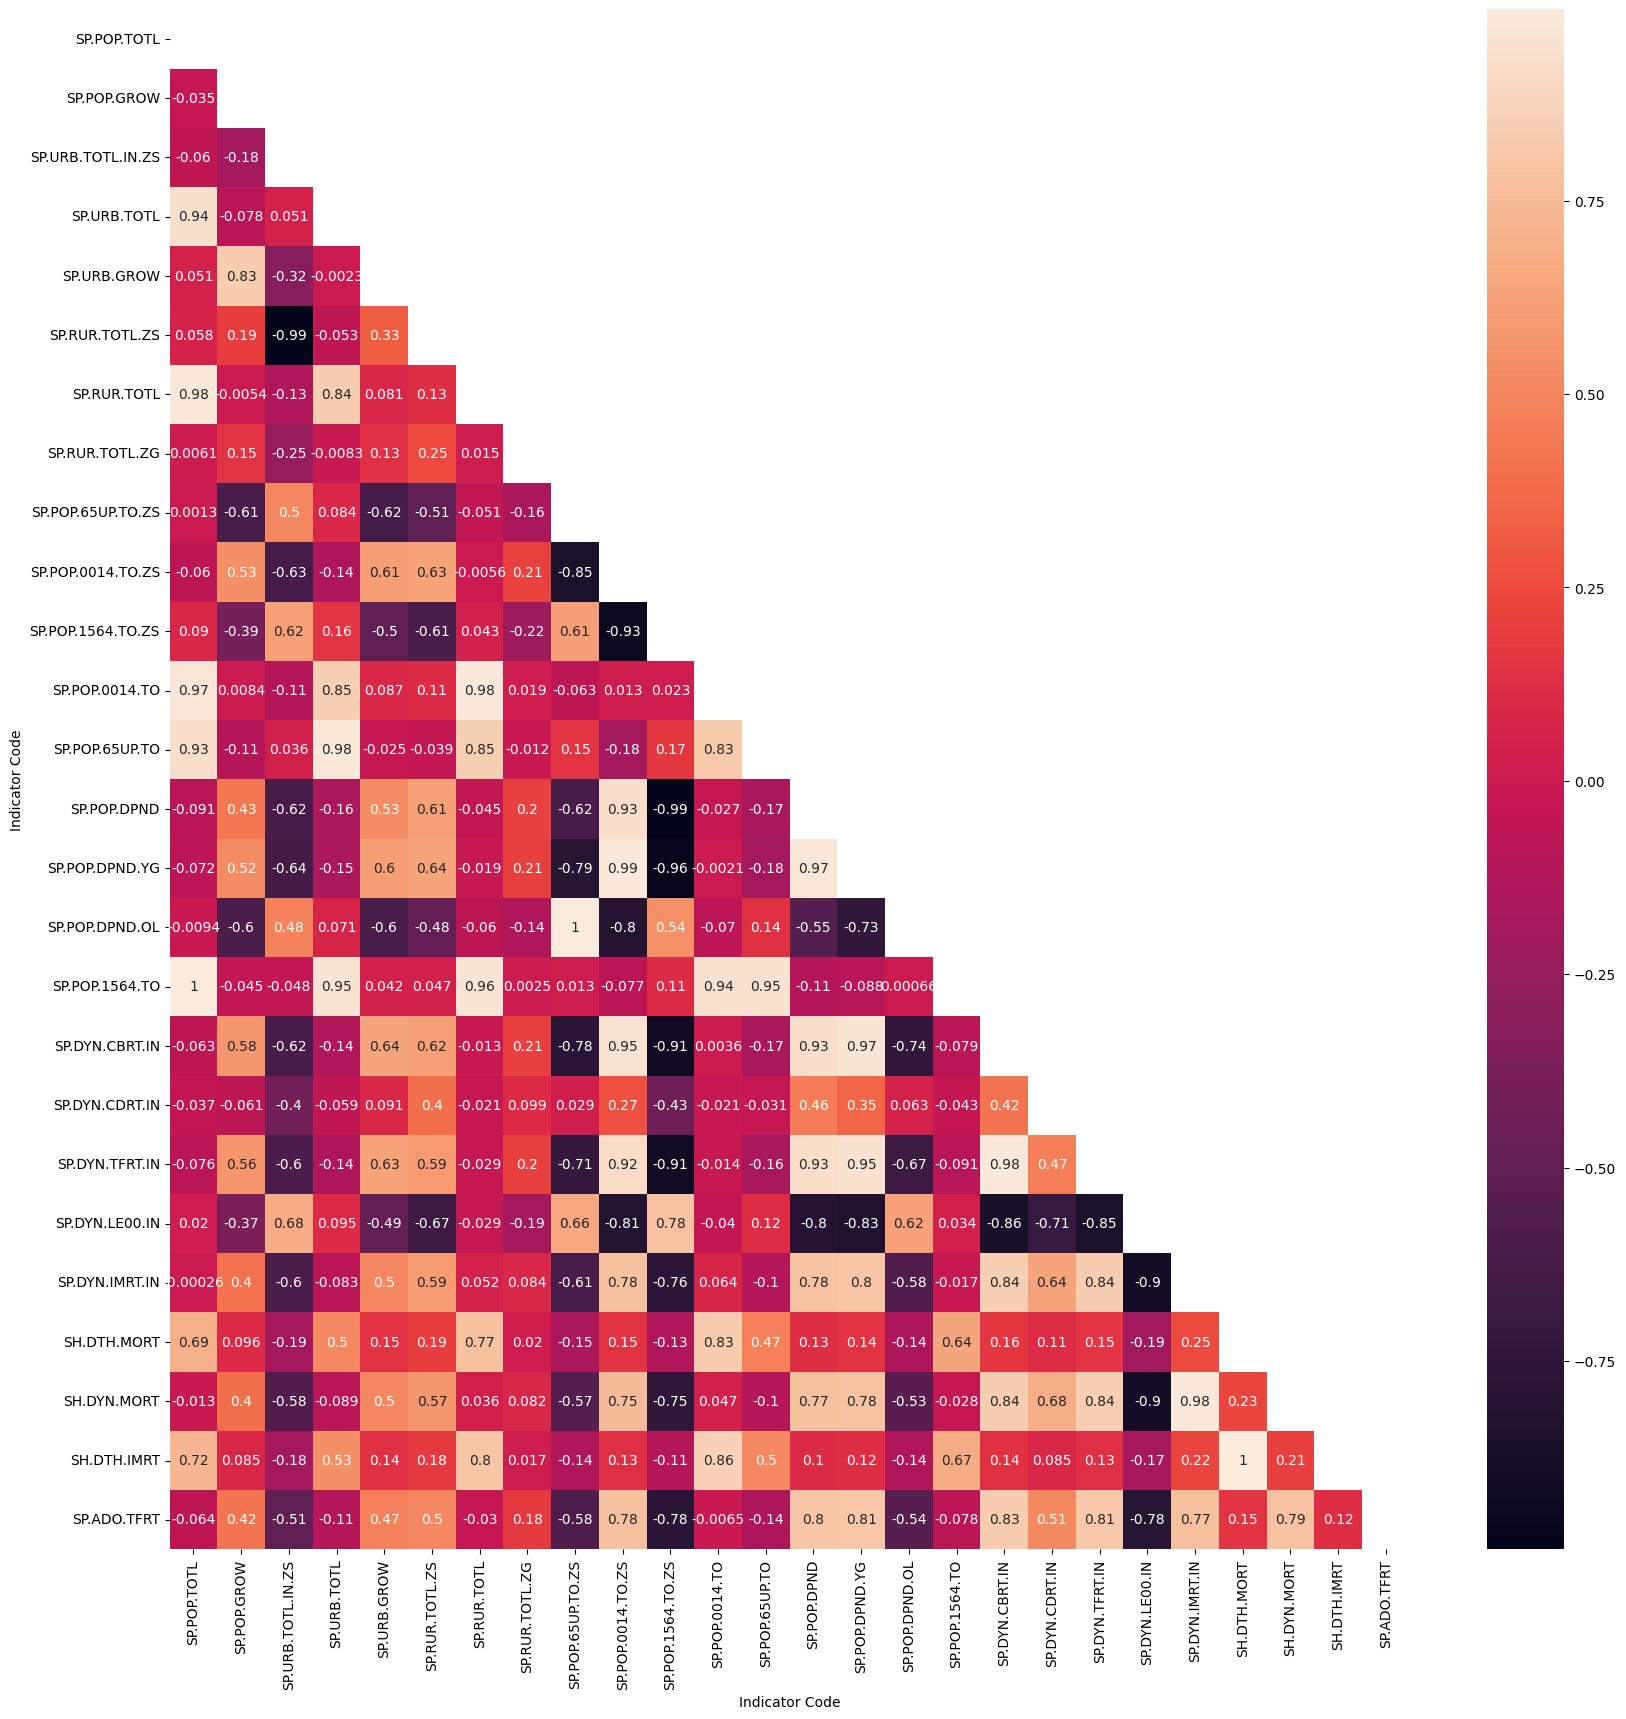

In [149]:
# Checking corelation
plt.figure(figsize=(20, 20))
corr_1 = df_x_4.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_1)
sns.heatmap(corr_1, annot=True, mask=matrix)

In [150]:
corr_1

Indicator Code     SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Indicator Code                                                                
SP.POP.TOTL           1.000000    -0.035374          -0.060135     0.939379   
SP.POP.GROW          -0.035374     1.000000          -0.183398    -0.077796   
SP.URB.TOTL.IN.ZS    -0.060135    -0.183398           1.000000     0.050647   
SP.URB.TOTL           0.939379    -0.077796           0.050647     1.000000   
SP.URB.GROW           0.050604     0.832925          -0.324230    -0.002326   
SP.RUR.TOTL.ZS        0.058471     0.191218          -0.990622    -0.053410   
SP.RUR.TOTL           0.975577    -0.005416          -0.125189     0.841278   
SP.RUR.TOTL.ZG        0.006088     0.151219          -0.245289    -0.008255   
SP.POP.65UP.TO.ZS     0.001278    -0.607170           0.503203     0.083728   
SP.POP.0014.TO.ZS    -0.060249     0.533170          -0.632730    -0.141640   
SP.POP.1564.TO.ZS     0.090393    -0.393390           0.615135     0.157429   
SP.POP.0014.TO        0.966334     0.008379          -0.108873     0.845594   
SP.POP.65UP.TO        0.933607    -0.107899           0.035970     0.978157   
SP.POP.DPND          -0.091108     0.432556          -0.619860    -0.157158   
SP.POP.DPND.YG       -0.071585     0.522402          -0.640829    -0.148218   
SP.POP.DPND.OL       -0.009407    -0.598810           0.478152     0.070974   
SP.POP.1564.TO        0.996889    -0.045242          -0.048335     0.951869   
SP.DYN.CBRT.IN       -0.063368     0.576923          -0.619018    -0.137259   
SP.DYN.CDRT.IN       -0.036913    -0.061159          -0.402957    -0.059446   
SP.DYN.TFRT.IN       -0.076228     0.563055          -0.596024    -0.144196   
SP.DYN.LE00.IN        0.019666    -0.370274           0.676111     0.095359   
SP.DYN.IMRT.IN       -0.000260     0.399985          -0.598424    -0.083029   
SH.DTH.MORT           0.693950     0.096241          -0.191785     0.503372   
SH.DYN.MORT          -0.012791     0.398344          -0.577353    -0.089097   
SH.DTH.IMRT           0.723519     0.085345          -0.180708     0.532514   
SP.ADO.TFRT          -0.063985     0.419369          -0.508524    -0.112919   

Indicator Code     SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Indicator Code                                                                
SP.POP.TOTL           0.050604        0.058471     0.975577        0.006088   
SP.POP.GROW           0.832925        0.191218    -0.005416        0.151219   
SP.URB.TOTL.IN.ZS    -0.324230       -0.990622    -0.125189       -0.245289   
SP.URB.TOTL          -0.002326       -0.053410     0.841278       -0.008255   
SP.URB.GROW           1.000000        0.328346     0.081345        0.130510   
SP.RUR.TOTL.ZS        0.328346        1.000000     0.126266        0.247132   
SP.RUR.TOTL           0.081345        0.126266     1.000000        0.014866   
SP.RUR.TOTL.ZG        0.130510        0.247132     0.014866        1.000000   
SP.POP.65UP.TO.ZS    -0.620499       -0.506516    -0.051334       -0.157931   
SP.POP.0014.TO.ZS     0.607085        0.627976    -0.005559        0.214663   
SP.POP.1564.TO.ZS    -0.496260       -0.605673     0.043444       -0.217419   
SP.POP.0014.TO        0.087160        0.107465     0.982433        0.018940   
SP.POP.65UP.TO       -0.025393       -0.038628     0.846137       -0.012176   
SP.POP.DPND           0.529034        0.612267    -0.044558        0.204133   
SP.POP.DPND.YG        0.602735        0.636082    -0.019230        0.205301   
SP.POP.DPND.OL       -0.604811       -0.483234    -0.060229       -0.137240   
SP.POP.1564.TO        0.042022        0.046706     0.962707        0.002485   
SP.DYN.CBRT.IN        0.643495        0.615012    -0.013185        0.205049   
SP.DYN.CDRT.IN        0.091263        0.395667    -0.021340        0.098780   
SP.DYN.TFRT.IN        0.627348        0.591391    -0.029062        0.204770   
SP.DYN.LE00.IN       -0.493015       -0.671513   

In [154]:
corr_coeff_cutoff = .75

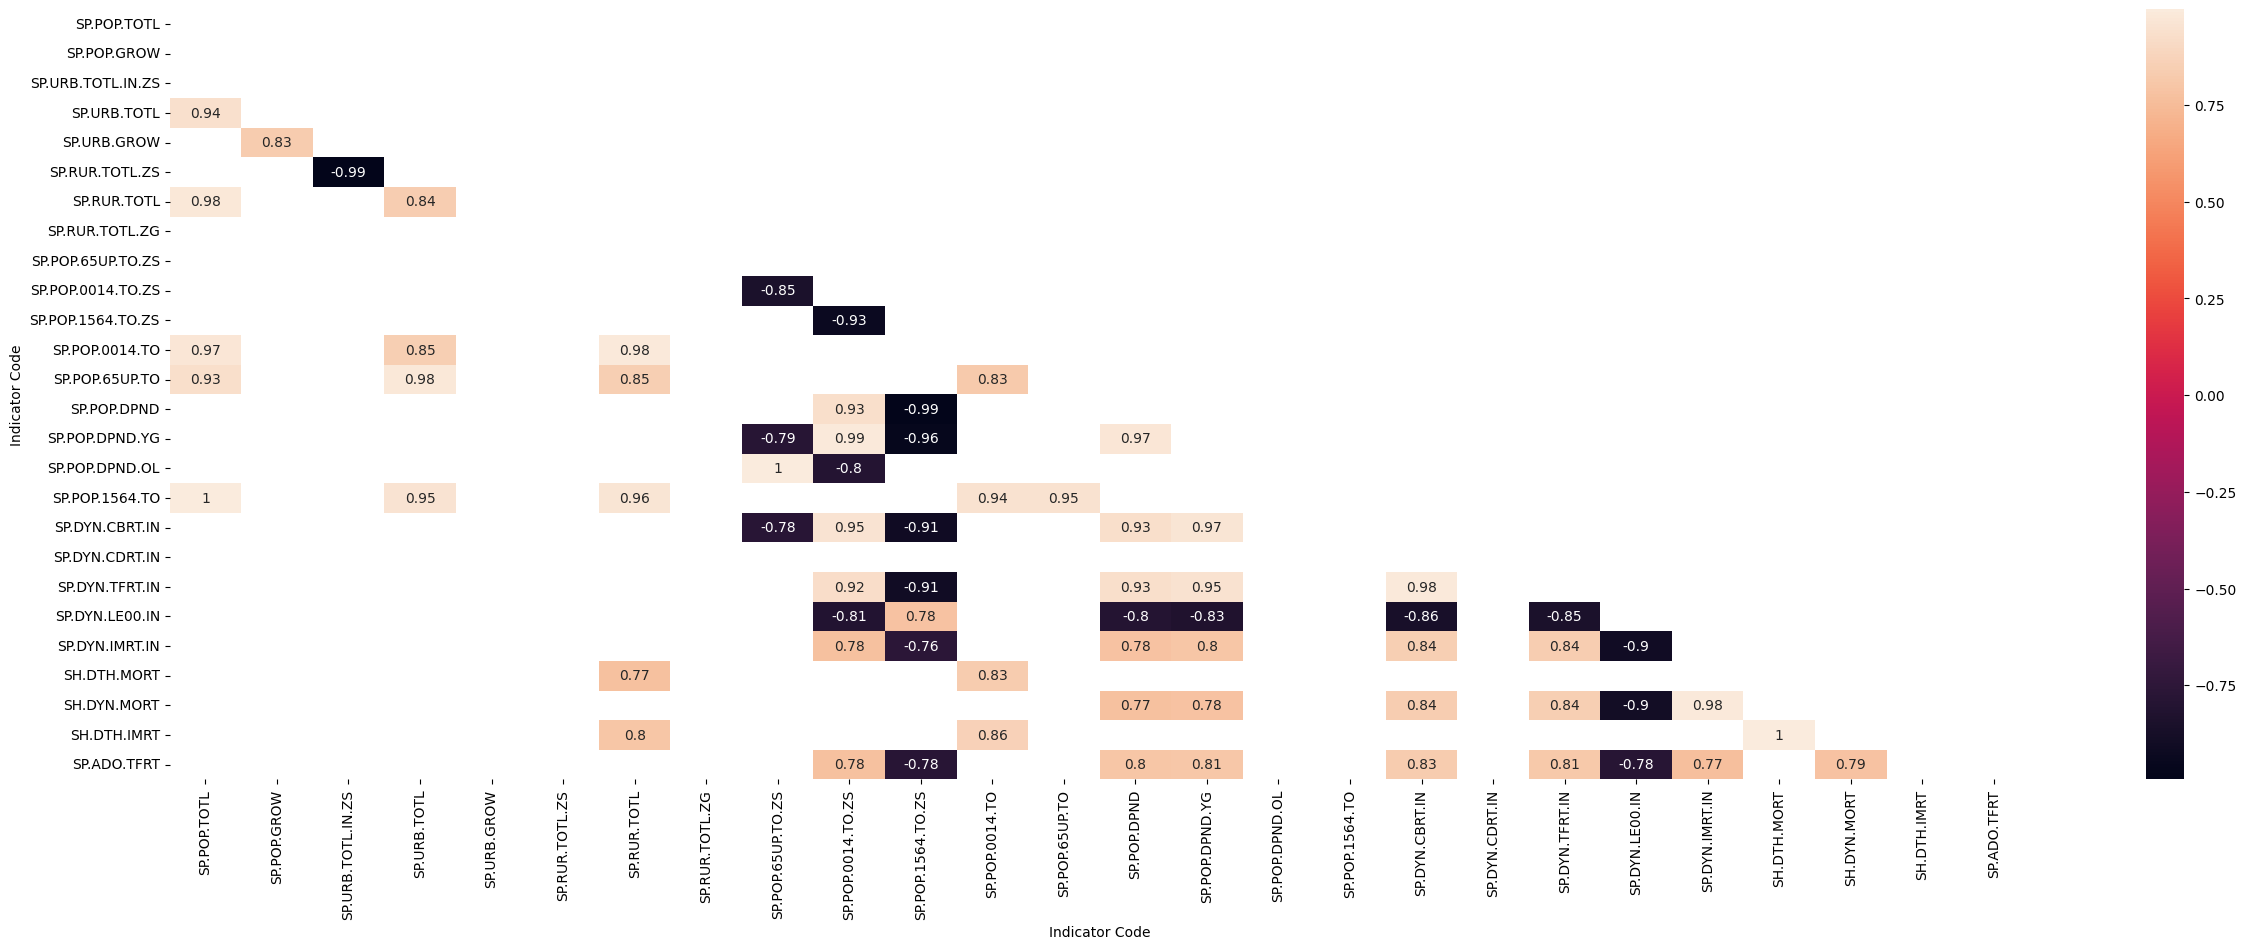

In [190]:
filtered_corr_1 = corr_1[((corr_1 >= corr_coeff_cutoff) | (corr_1 <= -corr_coeff_cutoff)) & (corr_1 !=1.000)]
plt.figure(figsize=(30,10))
# Getting the Upper Triangle of the co-relation matrix
matrix_1 = np.triu(corr_1)
sns.heatmap(filtered_corr_1, annot=True, mask=matrix_1)
#sns.heatmap(filtered_corr_1, annot=True, cmap="Reds")
plt.show()

In [156]:
filtered_corr_1

Indicator Code     SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  SP.URB.TOTL  \
Indicator Code                                                                
SP.POP.TOTL                NaN          NaN                NaN     0.939379   
SP.POP.GROW                NaN          NaN                NaN          NaN   
SP.URB.TOTL.IN.ZS          NaN          NaN                NaN          NaN   
SP.URB.TOTL           0.939379          NaN                NaN          NaN   
SP.URB.GROW                NaN     0.832925                NaN          NaN   
SP.RUR.TOTL.ZS             NaN          NaN          -0.990622          NaN   
SP.RUR.TOTL           0.975577          NaN                NaN     0.841278   
SP.RUR.TOTL.ZG             NaN          NaN                NaN          NaN   
SP.POP.65UP.TO.ZS          NaN          NaN                NaN          NaN   
SP.POP.0014.TO.ZS          NaN          NaN                NaN          NaN   
SP.POP.1564.TO.ZS          NaN          NaN                NaN          NaN   
SP.POP.0014.TO        0.966334          NaN                NaN     0.845594   
SP.POP.65UP.TO        0.933607          NaN                NaN     0.978157   
SP.POP.DPND                NaN          NaN                NaN          NaN   
SP.POP.DPND.YG             NaN          NaN                NaN          NaN   
SP.POP.DPND.OL             NaN          NaN                NaN          NaN   
SP.POP.1564.TO        0.996889          NaN                NaN     0.951869   
SP.DYN.CBRT.IN             NaN          NaN                NaN          NaN   
SP.DYN.CDRT.IN             NaN          NaN                NaN          NaN   
SP.DYN.TFRT.IN             NaN          NaN                NaN          NaN   
SP.DYN.LE00.IN             NaN          NaN                NaN          NaN   
SP.DYN.IMRT.IN             NaN          NaN                NaN          NaN   
SH.DTH.MORT                NaN          NaN                NaN          NaN   
SH.DYN.MORT                NaN          NaN                NaN          NaN   
SH.DTH.IMRT                NaN          NaN                NaN          NaN   
SP.ADO.TFRT                NaN          NaN                NaN          NaN   

Indicator Code     SP.URB.GROW  SP.RUR.TOTL.ZS  SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
Indicator Code                                                                
SP.POP.TOTL                NaN             NaN     0.975577             NaN   
SP.POP.GROW           0.832925             NaN          NaN             NaN   
SP.URB.TOTL.IN.ZS          NaN       -0.990622          NaN             NaN   
SP.URB.TOTL                NaN             NaN     0.841278             NaN   
SP.URB.GROW                NaN             NaN          NaN             NaN   
SP.RUR.TOTL.ZS             NaN             NaN          NaN             NaN   
SP.RUR.TOTL                NaN             NaN          NaN             NaN   
SP.RUR.TOTL.ZG             NaN             NaN          NaN             NaN   
SP.POP.65UP.TO.ZS          NaN             NaN          NaN             NaN   
SP.POP.0014.TO.ZS          NaN             NaN          NaN             NaN   
SP.POP.1564.TO.ZS          NaN             NaN          NaN             NaN   
SP.POP.0014.TO             NaN             NaN     0.982433             NaN   
SP.POP.65UP.TO             NaN             NaN     0.846137             NaN   
SP.POP.DPND                NaN             NaN          NaN             NaN   
SP.POP.DPND.YG             NaN             NaN          NaN             NaN   
SP.POP.DPND.OL             NaN             NaN          NaN             NaN   
SP.POP.1564.TO             NaN             NaN     0.962707             NaN   
SP.DYN.CBRT.IN             NaN             NaN          NaN             NaN   
SP.DYN.CDRT.IN             NaN             NaN          NaN             NaN   
SP.DYN.TFRT.IN             NaN             NaN          NaN             NaN   
SP.DYN.LE00.IN             NaN             NaN   

In [208]:
df_economy = pd.read_csv("EconomyData.csv")
df_economy.head()

Economy Code                      Region         Income group  \
0     Afghanistan  AFG                  South Asia           Low income   
1         Albania  ALB       Europe & Central Asia  Upper middle income   
2         Algeria  DZA  Middle East & North Africa  Upper middle income   
3  American Samoa  ASM         East Asia & Pacific          High income   
4         Andorra  AND       Europe & Central Asia          High income   

  Lending category  
0              IDA  
1             IBRD  
2             IBRD  
3              NaN  
4              NaN

In [211]:
economy_dict = df_economy[['Economy', 'Income group']].set_index('Economy').to_dict()
economy_dict

{'Income group': {'Afghanistan': 'Low income',
  'Albania': 'Upper middle income',
  'Algeria': 'Upper middle income',
  'American Samoa': 'High income',
  'Andorra': 'High income',
  'Angola': 'Lower middle income',
  'Antigua and Barbuda': 'High income',
  'Argentina': 'Upper middle income',
  'Armenia': 'Upper middle income',
  'Aruba': 'High income',
  'Australia': 'High income',
  'Austria': 'High income',
  'Azerbaijan': 'Upper middle income',
  'Bahamas, The': 'High income',
  'Bahrain': 'High income',
  'Bangladesh': 'Lower middle income',
  'Barbados': 'High income',
  'Belarus': 'Upper middle income',
  'Belgium': 'High income',
  'Belize': 'Upper middle income',
  'Benin': 'Lower middle income',
  'Bermuda': 'High income',
  'Bhutan': 'Lower middle income',
  'Bolivia': 'Lower middle income',
  'Bosnia and Herzegovina': 'Upper middle income',
  'Botswana': 'Upper middle income',
  'Brazil': 'Upper middle income',
  'British Virgin Islands': 'High income',
  'Brunei Darussala

In [219]:
economy_dict = df_economy[['Economy', 'Income group']].set_index('Economy').to_dict()
# Convert keys in 'Income group' to lowercase to handle potential inconsistencies
economy_dict['Income group'] = {k.lower(): v for k, v in economy_dict['Income group'].items()}

# Now, during the dictionary comprehension:
country_code_economy_dict = {}  # Initialize an empty dictionary

for k in df_x_4.index.get_level_values('Country Code').drop_duplicates():
    country_name = country_dict[k]
    # Convert the country name to lowercase to check in the lowercase keys
    if country_name.lower() in economy_dict['Income group']:
        country_code_economy_dict[k] = economy_dict['Income group'][country_name.lower()]
    else:
        # Handle cases where the country name is not in economy_dict
        print(f"Warning: Country name '{country_name}' not found in economy_dict.")
        # You can choose a default value, skip, or raise an error here.
        # For example, assign 'Unknown' as the income group:
        country_code_economy_dict[k] = 'Unknown'

country_code_economy_dict  # Display the dictionary

{0: 'Low income',
 1: 'Upper middle income',
 2: 'Upper middle income',
 3: 'Lower middle income',
 4: 'High income',
 5: 'Upper middle income',
 6: 'Upper middle income',
 7: 'High income',
 8: 'High income',
 9: 'High income',
 10: 'Upper middle income',
 11: 'High income',
 12: 'High income',
 13: 'Lower middle income',
 14: 'High income',
 15: 'Upper middle income',
 16: 'High income',
 17: 'Upper middle income',
 18: 'Lower middle income',
 19: 'Lower middle income',
 20: 'Lower middle income',
 21: 'Upper middle income',
 22: 'Upper middle income',
 23: 'Upper middle income',
 24: 'High income',
 25: 'High income',
 26: 'Low income',
 27: 'Low income',
 28: 'Lower middle income',
 29: 'Lower middle income',
 30: 'Lower middle income',
 31: 'High income',
 32: 'Low income',
 33: 'Low income',
 34: 'High income',
 35: 'High income',
 36: 'Upper middle income',
 37: 'Upper middle income',
 38: 'Lower middle income',
 39: 'Low income',
 40: 'Lower middle income',
 41: 'Upper middle i

In [221]:
df_x_4['Economy'] = df_x_4.index.get_level_values('Country Code').map(country_code_economy_dict)

In [325]:
df_x_4.head()

Indicator Code                   SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                                  
0           0            1990 12067570.00000      3.87969           18.31600   
                         1991 12789374.00000      5.80930           18.59700   
                         1992 13745630.00000      7.21063           18.88200   
                         1993 14824371.00000      7.55516           19.17000   
                         1994 15869967.00000      6.81559           19.46200   

Indicator Code                  SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
GDP Cluster Country Code Year                                              
0           0            1990 2210296.00000      5.40914        81.68400   
                         1991 2378440.00000      7.33184        81.40300   
                         1992 2595450.00000      8.73151        81.11800   
                         1993 2841832.00000      9.06890        80.83000   
                         1994 3088613.00000      8.32732        80.53800   

Indicator Code                   SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
GDP Cluster Country Code Year                                  
0           0            1990  9857274.00000         3.53993   
                         1991 10410934.00000         5.46469   
                         1992 11150180.00000         6.85990   
                         1993 11982539.00000         7.19949   
                         1994 12781354.00000         6.45369   

Indicator Code                 SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  \
GDP Cluster Country Code Year                                        ...   
0           0            1990            2.20707           48.06517  ...   
                         1991            2.22128           48.02945  ...   
                         1992            2.23862           47.98057  ...   
                         1993            2.25892           47.96050  ...   
                         1994            2.28497           47.92609  ...   

Indicator Code                 SP.DYN.CBRT.IN  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  \
GDP Cluster Country Code Year                                                   
0           0            1990        49.02900        15.55500         7.46600   
                         1991        48.89600        15.00800         7.47900   
                         1992        48.83400        14.52400         7.50200   
                         1993        48.83900        14.10100         7.53500   
                         1994        48.89800        13.73600         7.57200   

Indicator Code                 SP.DYN.LE00.IN  SP.DYN.IMRT.IN  SH.DTH.MORT  \
GDP Cluster Country Code Year                                                
0           0            1990        49.86105       122.50000 100437.00000   
                         1991        50.64098       118.30000 101417.00000   
                         1992        51.36293       114.40000 104899.00000   
                         1993        52.02188       110.90000 109625.00000   
                         1994        52.61434       107.70000 113758.00000   

Indicator Code                 SH.DYN.MORT  SH.DTH.IMRT  SP.ADO.TFRT  \
GDP Cluster Country Code Year                                          
0           0            1990    181.00000  68718.00000    162.73800   
                         1991    174.20000  69482.00000    163.32700   
                         1992    167.80000  72376.00000    163.91600   
                         1993    162.00000  76190.00000    164.18120   
                         1994    156.80000  79446.00000    164.44640   

Indicator Code                    Economy  
GDP Cluster Country Code Year              
0           0            1990  Low income  
                         1991  Low income  
                         1992  Low income  
                         1993  Low income  
                         1994  Low incom

In [223]:
df_x_4.to_csv('health_data_processed_5.csv')

In [346]:
# Create dummy variables
df_economy_dummies = pd.get_dummies(df_x_4['Economy'], columns=['Economy'])
df_economy_dummies

High income  Low income  Lower middle income  \
GDP Cluster Country Code Year                                                 
0           0            1990        False        True                False   
                         1991        False        True                False   
                         1992        False        True                False   
                         1993        False        True                False   
                         1994        False        True                False   
...                                    ...         ...                  ...   
            193          2011        False       False                 True   
                         2012        False       False                 True   
                         2013        False       False                 True   
                         2014        False       False                 True   
                         2015        False       False                 True   

                               Unknown  Upper middle income  
GDP Cluster Country Code Year                                
0           0            1990    False                False  
                         1991    False                False  
                         1992    False                False  
                         1993    False                False  
                         1994    False                False  
...                                ...                  ...  
            193          2011    False                False  
                         2012    False                False  
                         2013    False                False  
                         2014    False                False  
                         2015    False                False  

[5044 rows x 5 columns]

In [347]:
df_x_5 = pd.concat([df_x_4, df_economy_dummies], axis=1)
df_x_5.head()

SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                                  
0           0            1990 12067570.00000      3.87969           18.31600   
                         1991 12789374.00000      5.80930           18.59700   
                         1992 13745630.00000      7.21063           18.88200   
                         1993 14824371.00000      7.55516           19.17000   
                         1994 15869967.00000      6.81559           19.46200   

                                SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
GDP Cluster Country Code Year                                              
0           0            1990 2210296.00000      5.40914        81.68400   
                         1991 2378440.00000      7.33184        81.40300   
                         1992 2595450.00000      8.73151        81.11800   
                         1993 2841832.00000      9.06890        80.83000   
                         1994 3088613.00000      8.32732        80.53800   

                                 SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
GDP Cluster Country Code Year                                  
0           0            1990  9857274.00000         3.53993   
                         1991 10410934.00000         5.46469   
                         1992 11150180.00000         6.85990   
                         1993 11982539.00000         7.19949   
                         1994 12781354.00000         6.45369   

                               SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  \
GDP Cluster Country Code Year                                        ...   
0           0            1990            2.20707           48.06517  ...   
                         1991            2.22128           48.02945  ...   
                         1992            2.23862           47.98057  ...   
                         1993            2.25892           47.96050  ...   
                         1994            2.28497           47.92609  ...   

                               SH.DTH.MORT  SH.DYN.MORT  SH.DTH.IMRT  \
GDP Cluster Country Code Year                                          
0           0            1990 100437.00000    181.00000  68718.00000   
                         1991 101417.00000    174.20000  69482.00000   
                         1992 104899.00000    167.80000  72376.00000   
                         1993 109625.00000    162.00000  76190.00000   
                         1994 113758.00000    156.80000  79446.00000   

                               SP.ADO.TFRT     Economy  High income  \
GDP Cluster Country Code Year                                         
0           0            1990    162.73800  Low income        False   
                         1991    163.32700  Low income        False   
                         1992    163.91600  Low income        False   
                         1993    164.18120  Low income        False   
                         1994    164.44640  Low income        False   

                               Low income  Lower middle income  Unknown  \
GDP Cluster Country Code Year                                             
0           0            1990        True                False    False   
                         1991        True                False    False   
                         1992        True                False    False   
                         1993        True                False    False   
                         1994        True                False    False   

                               Upper middle income  
GDP Cluster Country Code Year                       
0           0            1990                False  
                         1991                False  
                         1992                False  
                         1993                False  
                         1994                False  

[5 rows x 32 columns]

In [364]:
df_x_5.rename(columns = {'High income' : "Economy High income"}, inplace=True)
df_x_5.rename(columns = {'Low income' : "Economy Low income"}, inplace=True)
df_x_5.rename(columns = {'Lower middle income' : "Economy Lower middle income"}, inplace=True)
df_x_5.rename(columns = {'Unknown' : "Economy Unknown"}, inplace=True)
df_x_5.rename(columns = {'Upper middle income' : "Economy Upper middle income"}, inplace=True)

In [365]:
df_x_5.columns

Index(['SP.POP.TOTL', 'SP.POP.GROW', 'SP.URB.TOTL.IN.ZS', 'SP.URB.TOTL',
       'SP.URB.GROW', 'SP.RUR.TOTL.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG',
       'SP.POP.65UP.TO.ZS', 'SP.POP.0014.TO.ZS', 'SP.POP.1564.TO.ZS',
       'SP.POP.0014.TO', 'SP.POP.65UP.TO', 'SP.POP.DPND', 'SP.POP.DPND.YG',
       'SP.POP.DPND.OL', 'SP.POP.1564.TO', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN',
       'SP.DYN.TFRT.IN', 'SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.DTH.MORT',
       'SH.DYN.MORT', 'SH.DTH.IMRT', 'SP.ADO.TFRT', 'Economy High income',
       'Economy Low income', 'Economy Lower middle income', 'Economy Unknown',
       'Economy Upper middle income'],
      dtype='object')

In [366]:
for col in ['Economy High income',
            'Economy Low income',
            'Economy Lower middle income',
            'Economy Unknown',
            'Economy Upper middle income'
          ]:
    df_x_5[col] = df_x_5[col].astype('int')

In [229]:
# Prepare the features and target
X_1 = df_x_4.drop(columns=target_variable)
y_1 = df_x_4[target_variable]

In [231]:
# Split into training and testing sets
X_1_train = X_1[X_1.index.get_level_values('Year') <= str(test_cutoff)]
y_1_train = y_1[y_1.index.get_level_values('Year') <= str(test_cutoff)]

X_1_test = X_1[X_1.index.get_level_values('Year') > str(test_cutoff)]
y_1_test = y_1[y_1.index.get_level_values('Year') > str(test_cutoff)]

In [173]:
# Scale the features
scaler = StandardScaler()
X_1_train_scaled = scaler.fit_transform(X_1_train)
X_1_test_scaled = scaler.transform(X_1_test)

# Fit ElasticNet model
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Tune alpha and l1_ratio as needed
model_en.fit(X_1_train_scaled, y_1_train)

# Make predictions
y_pred_en = model_en.predict(X_1_test_scaled)

# Evaluate the model
mse_en = mean_squared_error(y_1_test, y_pred_en)
print(f'Mean Squared Error: {mse_en}')
r2_en = model_en.score(X_1_test_scaled, y_1_test)
print(f'R-squared: {r2_en}')

# Print the coefficients
print(f'ElasticNet Coefficients: {model_en.coef_}')

Mean Squared Error: 10.632756678011429
R-squared: 0.8713362212297158
ElasticNet Coefficients: [-0.         -0.          0.52926779  0.         -0.         -0.52523357
 -0.         -0.          0.57177438 -0.50744934  0.27500683 -0.
  0.         -0.26183061 -0.44671593  0.6005261  -0.         -0.61224581
 -2.29182841 -0.48633154 -1.39140652 -0.         -1.31498749 -0.
 -0.48951578]


In [185]:
col_coef_list = [(col, coef) for col, coef in zip(X_1_train.columns, model_en.coef_) if abs(coef) != 0]
independent_variables = [e[0] for e in col_coef_list]
[(k, kpi_dict[k]) for k in independent_variables]

[('SP.URB.TOTL.IN.ZS', 'Urban population (% of total)'),
 ('SP.RUR.TOTL.ZS', 'Rural population (% of total population)'),
 ('SP.POP.65UP.TO.ZS', 'Population ages 65 and above (% of total)'),
 ('SP.POP.0014.TO.ZS', 'Population ages 00-14 (% of total)'),
 ('SP.POP.1564.TO.ZS', 'Population ages 15-64 (% of total)'),
 ('SP.POP.DPND', 'Age dependency ratio (% of working-age population)'),
 ('SP.POP.DPND.YG', 'Age dependency ratio, young'),
 ('SP.POP.DPND.OL', 'Age dependency ratio, old'),
 ('SP.DYN.CBRT.IN', 'Birth rate, crude (per 1,000 people)'),
 ('SP.DYN.CDRT.IN', 'Death rate, crude (per 1,000 people)'),
 ('SP.DYN.TFRT.IN', 'Fertility rate, total (births per woman)'),
 ('SP.DYN.IMRT.IN', 'Mortality rate, infant (per 1,000 live births)'),
 ('SH.DYN.MORT', 'Mortality rate, under-5 (per 1,000)'),
 ('SP.ADO.TFRT',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)')]

<Axes: xlabel='Indicator Code', ylabel='Indicator Code'>

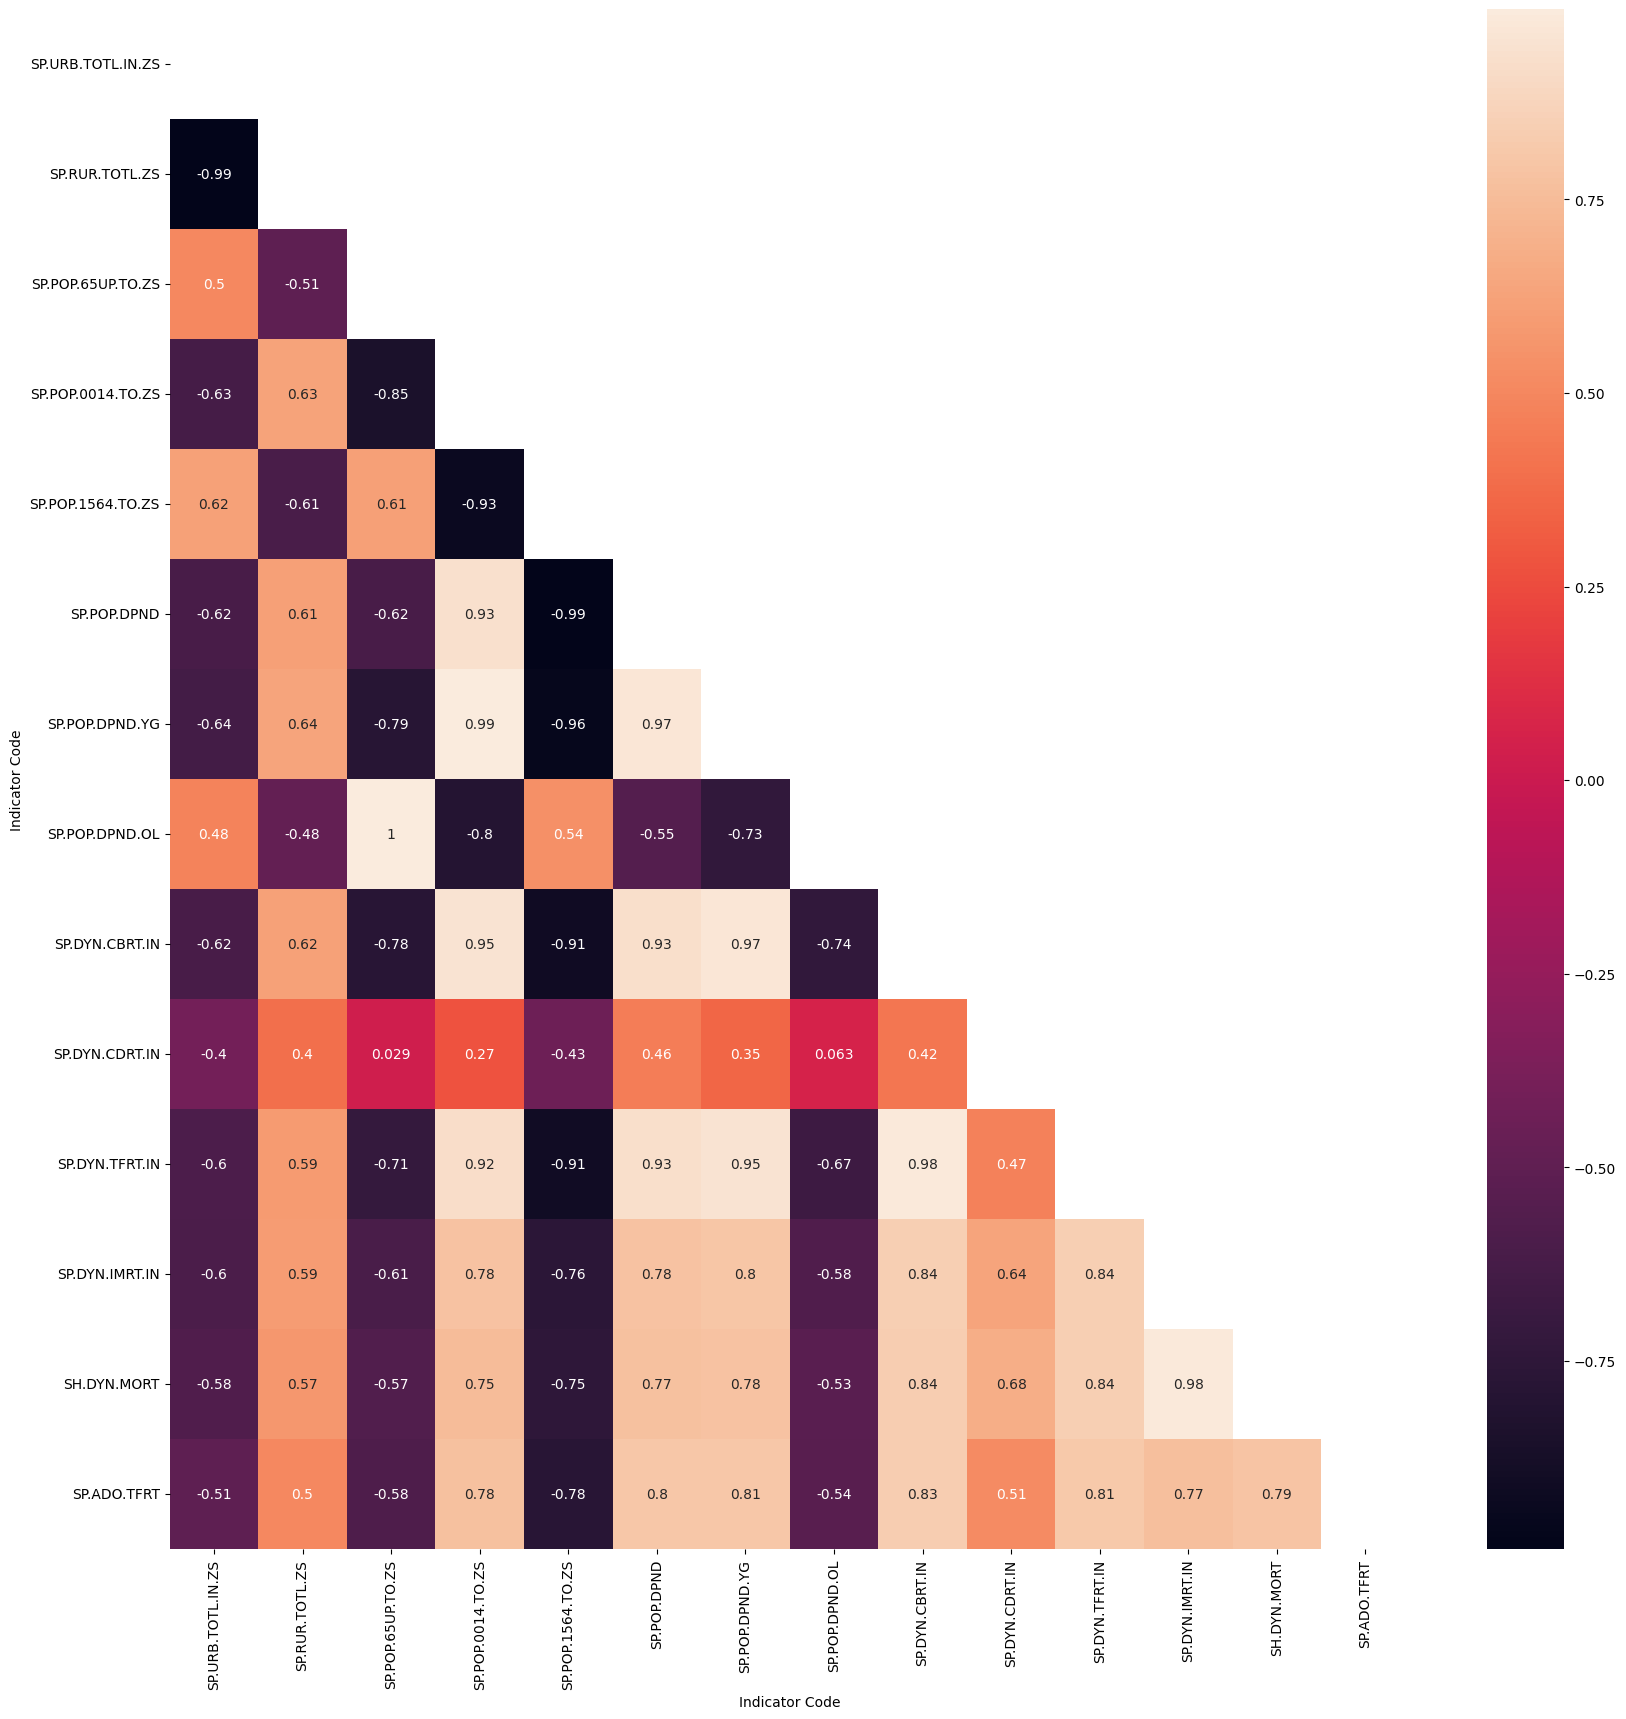

In [189]:
# Checking corelation
plt.figure(figsize=(20, 20))
corr_2 = df_x_4[independent_variables].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot=True, mask=matrix)

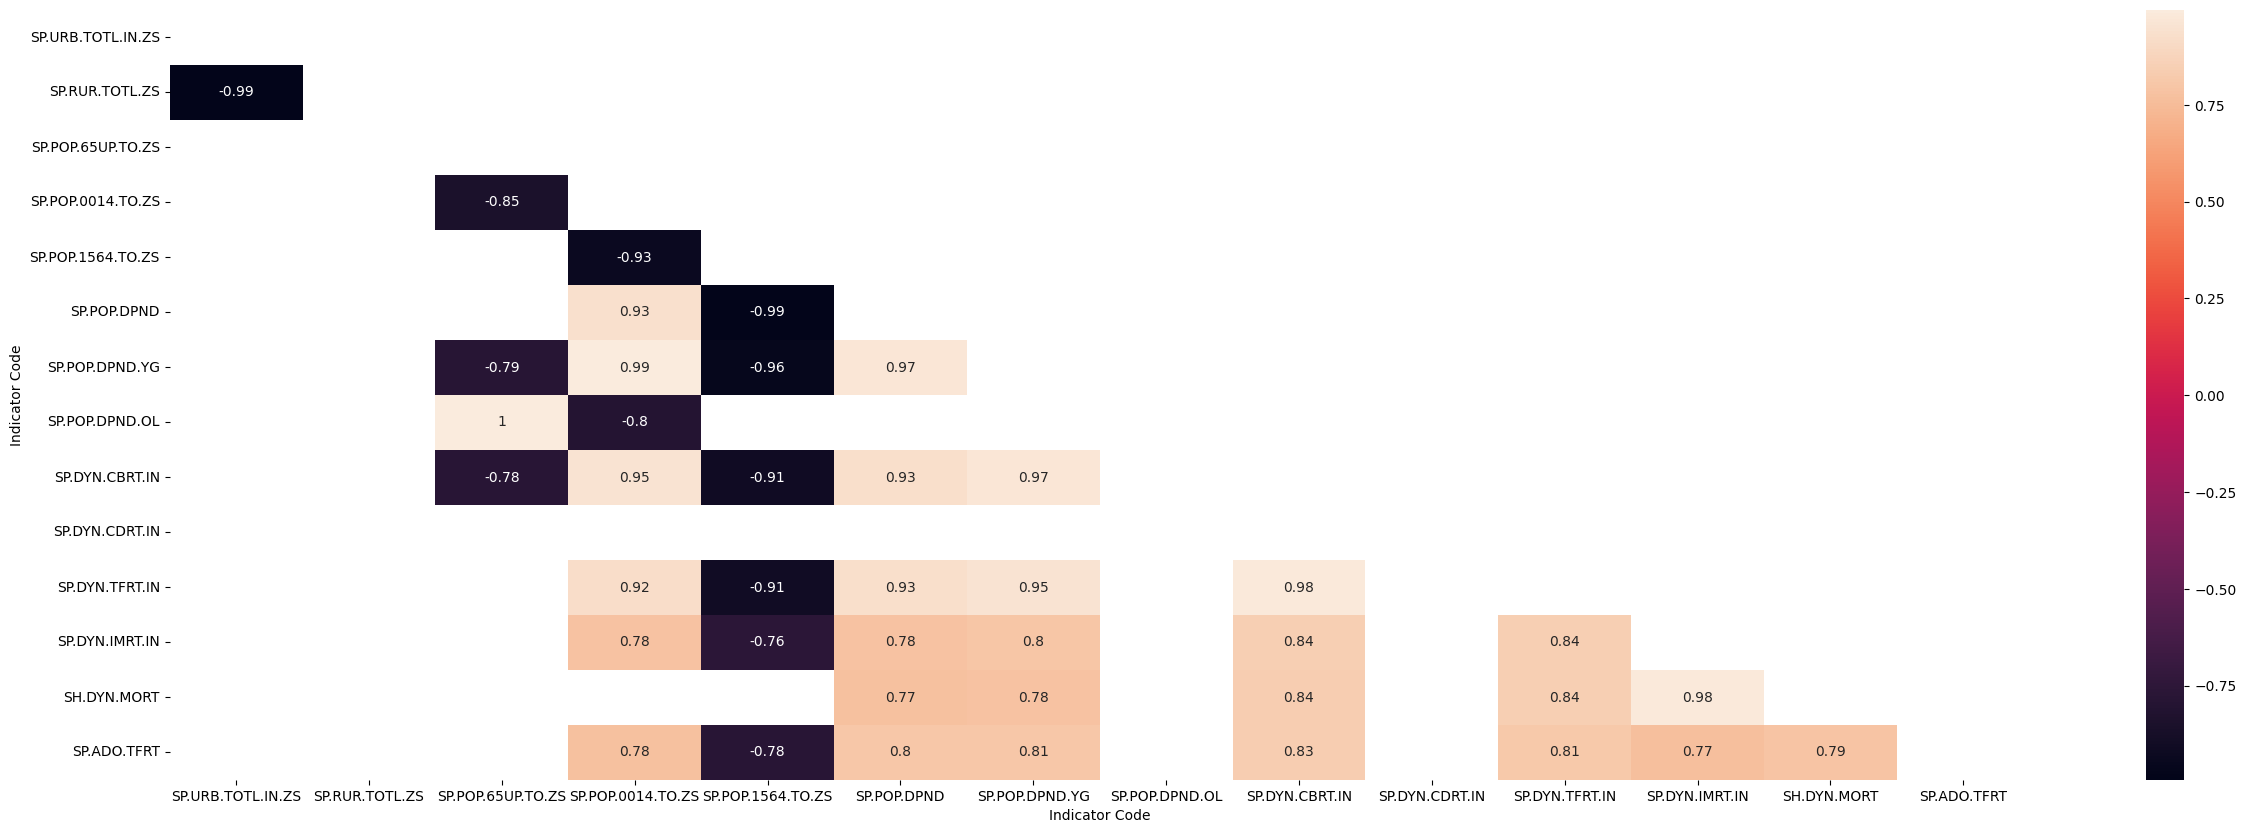

In [191]:
filtered_corr_2 = corr_2[((corr_2 >= corr_coeff_cutoff) | (corr_2 <= -corr_coeff_cutoff)) & (corr_2 !=1.000)]
plt.figure(figsize=(30,10))
# Getting the Upper Triangle of the co-relation matrix
matrix_2 = np.triu(corr_2)
sns.heatmap(filtered_corr_2, annot=True, mask=matrix_2)
#sns.heatmap(filtered_corr_1, annot=True, cmap="Reds")
plt.show()

In [192]:
filtered_corr_2

Indicator Code     SP.URB.TOTL.IN.ZS  SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  \
Indicator Code                                                            
SP.URB.TOTL.IN.ZS                NaN       -0.990622                NaN   
SP.RUR.TOTL.ZS             -0.990622             NaN                NaN   
SP.POP.65UP.TO.ZS                NaN             NaN                NaN   
SP.POP.0014.TO.ZS                NaN             NaN          -0.851520   
SP.POP.1564.TO.ZS                NaN             NaN                NaN   
SP.POP.DPND                      NaN             NaN                NaN   
SP.POP.DPND.YG                   NaN             NaN          -0.785560   
SP.POP.DPND.OL                   NaN             NaN           0.995341   
SP.DYN.CBRT.IN                   NaN             NaN          -0.780752   
SP.DYN.CDRT.IN                   NaN             NaN                NaN   
SP.DYN.TFRT.IN                   NaN             NaN                NaN   
SP.DYN.IMRT.IN                   NaN             NaN                NaN   
SH.DYN.MORT                      NaN             NaN                NaN   
SP.ADO.TFRT                      NaN             NaN                NaN   

Indicator Code     SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  SP.POP.DPND  \
Indicator Code                                                         
SP.URB.TOTL.IN.ZS                NaN                NaN          NaN   
SP.RUR.TOTL.ZS                   NaN                NaN          NaN   
SP.POP.65UP.TO.ZS          -0.851520                NaN          NaN   
SP.POP.0014.TO.ZS                NaN          -0.933827     0.933765   
SP.POP.1564.TO.ZS          -0.933827                NaN    -0.993207   
SP.POP.DPND                 0.933765          -0.993207          NaN   
SP.POP.DPND.YG              0.989250          -0.962545     0.971627   
SP.POP.DPND.OL             -0.804538                NaN          NaN   
SP.DYN.CBRT.IN              0.952822          -0.910645     0.928127   
SP.DYN.CDRT.IN                   NaN                NaN          NaN   
SP.DYN.TFRT.IN              0.920637          -0.906970     0.932312   
SP.DYN.IMRT.IN              0.778525          -0.762000     0.782031   
SH.DYN.MORT                      NaN                NaN     0.773561   
SP.ADO.TFRT                 0.777809          -0.781419     0.801149   

Indicator Code     SP.POP.DPND.YG  SP.POP.DPND.OL  SP.DYN.CBRT.IN  \
Indicator Code                                                      
SP.URB.TOTL.IN.ZS             NaN             NaN             NaN   
SP.RUR.TOTL.ZS                NaN             NaN             NaN   
SP.POP.65UP.TO.ZS       -0.785560        0.995341       -0.780752   
SP.POP.0014.TO.ZS        0.989250       -0.804538        0.952822   
SP.POP.1564.TO.ZS       -0.962545             NaN       -0.910645   
SP.POP.DPND              0.971627             NaN        0.928127   
SP.POP.DPND.YG                NaN             NaN        0.965387   
SP.POP.DPND.OL                NaN             NaN             NaN   
SP.DYN.CBRT.IN           0.965387             NaN             NaN   
SP.DYN.CDRT.IN                NaN             NaN             NaN   
SP.DYN.TFRT.IN           0.949230             NaN        0.982857   
SP.DYN.IMRT.IN           0.800866             NaN        0.843203   
SH.DYN.MORT              0.781876             NaN        0.838650   
SP.ADO.TFRT              0.805397             NaN        0.832448   

Indicator Code     SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SP.DYN.IMRT.IN  \
Indicator Code                                                      
SP.URB.TOTL.IN.ZS             NaN             NaN             NaN   
SP.RUR.TOTL.ZS                NaN             NaN             NaN   
SP.POP.65UP.TO.ZS             NaN             NaN             NaN   
SP.POP.0014.TO.ZS             NaN        0.920637        0.778525   
SP.POP.1564.TO.ZS             NaN       -0.906970       -0.762000   
SP.POP.DPND                   NaN        0.932312        0

In [196]:
for k in filtered_corr_2.columns:
    print(k, kpi_dict[k])

SP.URB.TOTL.IN.ZS Urban population (% of total)
SP.RUR.TOTL.ZS Rural population (% of total population)
SP.POP.65UP.TO.ZS Population ages 65 and above (% of total)
SP.POP.0014.TO.ZS Population ages 00-14 (% of total)
SP.POP.1564.TO.ZS Population ages 15-64 (% of total)
SP.POP.DPND Age dependency ratio (% of working-age population)
SP.POP.DPND.YG Age dependency ratio, young
SP.POP.DPND.OL Age dependency ratio, old
SP.DYN.CBRT.IN Birth rate, crude (per 1,000 people)
SP.DYN.CDRT.IN Death rate, crude (per 1,000 people)
SP.DYN.TFRT.IN Fertility rate, total (births per woman)
SP.DYN.IMRT.IN Mortality rate, infant (per 1,000 live births)
SH.DYN.MORT Mortality rate, under-5 (per 1,000)
SP.ADO.TFRT Adolescent fertility rate (births per 1,000 women ages 15-19)


In [180]:
#independent_variables = [col for col in df_x_4.columns if col != target_variable]

VIF = 1: No multicollinearity. The variance of the coefficient estimate is not inflated.

VIF > 1 and < 5: Moderate multicollinearity.

VIF >= 5: High multicollinearity. Action should be taken, such as removing correlated variables.

In [188]:
df_vif = get_vif(df_x_4[independent_variables])
df_vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Features          VIF
5         SP.POP.DPND          inf
6      SP.POP.DPND.YG          inf
7      SP.POP.DPND.OL          inf
3   SP.POP.0014.TO.ZS  2116.935442
2   SP.POP.65UP.TO.ZS  2112.015407
4   SP.POP.1564.TO.ZS   681.350751
8      SP.DYN.CBRT.IN   376.057734
0   SP.URB.TOTL.IN.ZS   340.169472
1      SP.RUR.TOTL.ZS   268.908747
10     SP.DYN.TFRT.IN   241.030349
11     SP.DYN.IMRT.IN   102.477576
12        SH.DYN.MORT   101.695525
9      SP.DYN.CDRT.IN    26.262625
13        SP.ADO.TFRT    11.379792

In [197]:
non_corr_features = df_vif[(df_vif['VIF'] >= 1) & (df_vif['VIF'] < 5)]['Features'].values.tolist()
non_corr_features

[]

<Axes: xlabel='Indicator Code', ylabel='Indicator Code'>

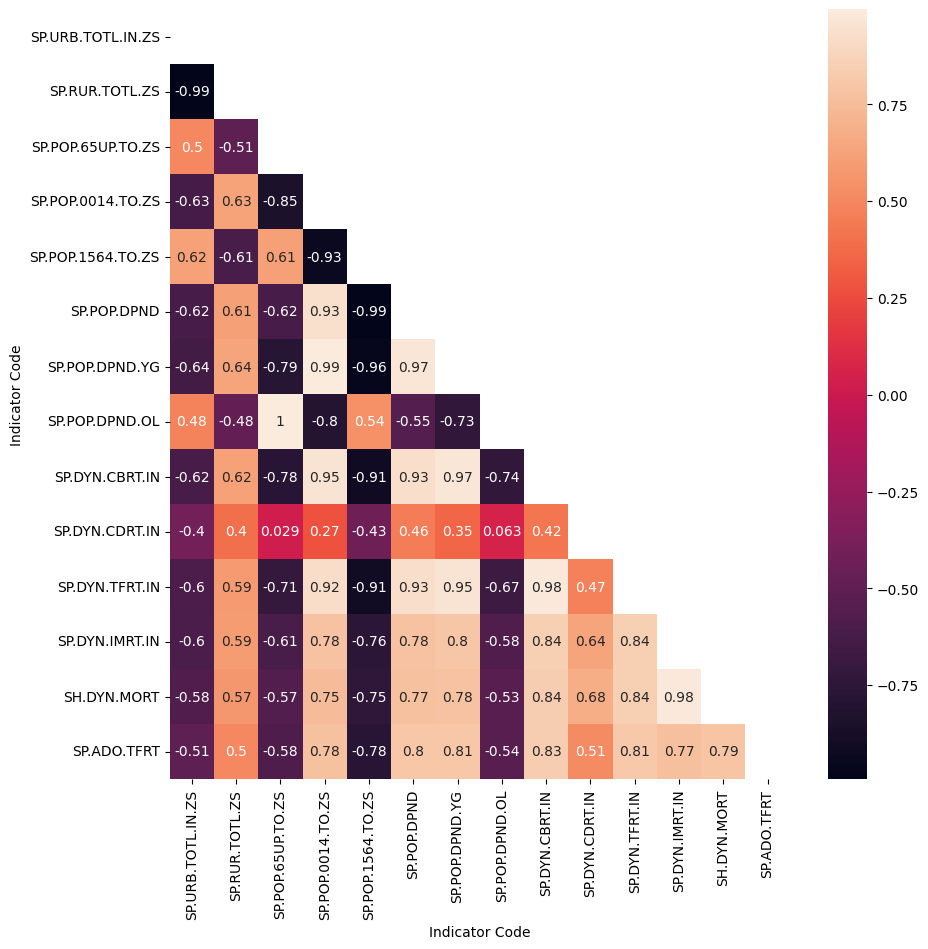

In [201]:
plt.figure(figsize=(10, 10))
corr_3 = df_x_4[independent_variables].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix_3 = np.triu(corr_3)
sns.heatmap(corr_3, annot=True, mask=matrix_3)

In [328]:
df_x_4[['Economy'] + independent_variables]

Indicator Code                             Economy  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                           
0           0            1990           Low income           18.31600   
                         1991           Low income           18.59700   
                         1992           Low income           18.88200   
                         1993           Low income           19.17000   
                         1994           Low income           19.46200   
...                                            ...                ...   
            193          2011  Lower middle income           33.01500   
                         2012  Lower middle income           32.83400   
                         2013  Lower middle income           32.65400   
                         2014  Lower middle income           32.50100   
                         2015  Lower middle income           32.37600   

Indicator Code                 SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  \
GDP Cluster Country Code Year                                      
0           0            1990        81.68400            2.20707   
                         1991        81.40300            2.22128   
                         1992        81.11800            2.23862   
                         1993        80.83000            2.25892   
                         1994        80.53800            2.28497   
...                                       ...                ...   
            193          2011        66.98500            3.16968   
                         2012        67.16600            3.11363   
                         2013        67.34600            3.05315   
                         2014        67.49900            3.00117   
                         2015        67.62400            2.96453   

Indicator Code                 SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  \
GDP Cluster Country Code Year                                         
0           0            1990           48.06517           49.72776   
                         1991           48.02945           49.74927   
                         1992           47.98057           49.78082   
                         1993           47.96050           49.78058   
                         1994           47.92609           49.78894   
...                                          ...                ...   
            193          2011           41.50238           55.32794   
                         2012           41.50921           55.37716   
                         2013           41.54513           55.40172   
                         2014           41.58379           55.41504   
                         2015           41.60034           55.43513   

Indicator Code                 SP.POP.DPND  SP.POP.DPND.YG  SP.POP.DPND.OL  \
GDP Cluster Country Code Year                                                
0           0            1990    101.09493        96.65662         4.43831   
                         1991    101.00798        96.54303         4.46495   
                         1992    100.88059        96.38364         4.49695   
                         1993    100.88154        96.34380         4.53774   
                         1994    100.84780        96.25849         4.58931   
...                                    ...             ...             ...   
            193          2011     80.74049        75.01161         5.72889   
                         2012     80.57987        74.95728         5.62259   
                         2013     80.49982        74.98889         5.51093   
                         2014     80.45644        75.04063         5.41580   
                         2015     80.39103        75.04329         5.34774   

Indicator Code                 SP.DYN.CBRT.IN  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  \
GDP Cluster Country Code Year                                                   
0           0            1990        49.02900        15.55500   

In [367]:
df_x_6 = df_x_5[['Economy High income',
       'Economy Low income', 'Economy Lower middle income', 'Economy Unknown',
       'Economy Upper middle income'] + independent_variables] #df_x_4[non_corr_features]
df_x_6.head()

Economy High income  Economy Low income  \
GDP Cluster Country Code Year                                            
0           0            1990                    0                   1   
                         1991                    0                   1   
                         1992                    0                   1   
                         1993                    0                   1   
                         1994                    0                   1   

                               Economy Lower middle income  Economy Unknown  \
GDP Cluster Country Code Year                                                 
0           0            1990                            0                0   
                         1991                            0                0   
                         1992                            0                0   
                         1993                            0                0   
                         1994                            0                0   

                               Economy Upper middle income  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                                   
0           0            1990                            0           18.31600   
                         1991                            0           18.59700   
                         1992                            0           18.88200   
                         1993                            0           19.17000   
                         1994                            0           19.46200   

                               SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  \
GDP Cluster Country Code Year                                      
0           0            1990        81.68400            2.20707   
                         1991        81.40300            2.22128   
                         1992        81.11800            2.23862   
                         1993        80.83000            2.25892   
                         1994        80.53800            2.28497   

                               SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  \
GDP Cluster Country Code Year                                         
0           0            1990           48.06517           49.72776   
                         1991           48.02945           49.74927   
                         1992           47.98057           49.78082   
                         1993           47.96050           49.78058   
                         1994           47.92609           49.78894   

                               SP.POP.DPND  SP.POP.DPND.YG  SP.POP.DPND.OL  \
GDP Cluster Country Code Year                                                
0           0            1990    101.09493        96.65662         4.43831   
                         1991    101.00798        96.54303         4.46495   
                         1992    100.88059        96.38364         4.49695   
                         1993    100.88154        96.34380         4.53774   
                         1994    100.84780        96.25849         4.58931   

                               SP.DYN.CBRT.IN  SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  \
GDP Cluster Country Code Year                                                   
0           0            1990        49.02900        15.55500         7.46600   
                         1991        48.89600        15.00800         7.47900   
                         1992        48.83400        14.52400         7.50200   
                         1993        48.83900        14.10100         7.53500   
                         1994        48.89800        13.73600         7.57200   

                               SP.DYN.IMRT.IN  SH.DYN.MORT  SP.ADO.TFRT  
GDP Cluster Country Code Year                                            
0           0            1990       122.50000    181.00000    162.73800  
                         1991       118.30000    174.20000    163.32700  
    

In [203]:
corr_3

Indicator Code     SP.URB.TOTL.IN.ZS  SP.RUR.TOTL.ZS  SP.POP.65UP.TO.ZS  \
Indicator Code                                                            
SP.URB.TOTL.IN.ZS           1.000000       -0.990622           0.503203   
SP.RUR.TOTL.ZS             -0.990622        1.000000          -0.506516   
SP.POP.65UP.TO.ZS           0.503203       -0.506516           1.000000   
SP.POP.0014.TO.ZS          -0.632730        0.627976          -0.851520   
SP.POP.1564.TO.ZS           0.615135       -0.605673           0.607609   
SP.POP.DPND                -0.619860        0.612267          -0.617427   
SP.POP.DPND.YG             -0.640829        0.636082          -0.785560   
SP.POP.DPND.OL              0.478152       -0.483234           0.995341   
SP.DYN.CBRT.IN             -0.619018        0.615012          -0.780752   
SP.DYN.CDRT.IN             -0.402957        0.395667           0.029398   
SP.DYN.TFRT.IN             -0.596024        0.591391          -0.714678   
SP.DYN.IMRT.IN             -0.598424        0.594005          -0.611641   
SH.DYN.MORT                -0.577353        0.574018          -0.569015   
SP.ADO.TFRT                -0.508524        0.502118          -0.581588   

Indicator Code     SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  SP.POP.DPND  \
Indicator Code                                                         
SP.URB.TOTL.IN.ZS          -0.632730           0.615135    -0.619860   
SP.RUR.TOTL.ZS              0.627976          -0.605673     0.612267   
SP.POP.65UP.TO.ZS          -0.851520           0.607609    -0.617427   
SP.POP.0014.TO.ZS           1.000000          -0.933827     0.933765   
SP.POP.1564.TO.ZS          -0.933827           1.000000    -0.993207   
SP.POP.DPND                 0.933765          -0.993207     1.000000   
SP.POP.DPND.YG              0.989250          -0.962545     0.971627   
SP.POP.DPND.OL             -0.804538           0.539619    -0.552118   
SP.DYN.CBRT.IN              0.952822          -0.910645     0.928127   
SP.DYN.CDRT.IN              0.273918          -0.434985     0.456563   
SP.DYN.TFRT.IN              0.920637          -0.906970     0.932312   
SP.DYN.IMRT.IN              0.778525          -0.762000     0.782031   
SH.DYN.MORT                 0.749655          -0.747351     0.773561   
SP.ADO.TFRT                 0.777809          -0.781419     0.801149   

Indicator Code     SP.POP.DPND.YG  SP.POP.DPND.OL  SP.DYN.CBRT.IN  \
Indicator Code                                                      
SP.URB.TOTL.IN.ZS       -0.640829        0.478152       -0.619018   
SP.RUR.TOTL.ZS           0.636082       -0.483234        0.615012   
SP.POP.65UP.TO.ZS       -0.785560        0.995341       -0.780752   
SP.POP.0014.TO.ZS        0.989250       -0.804538        0.952822   
SP.POP.1564.TO.ZS       -0.962545        0.539619       -0.910645   
SP.POP.DPND              0.971627       -0.552118        0.928127   
SP.POP.DPND.YG           1.000000       -0.733654        0.965387   
SP.POP.DPND.OL          -0.733654        1.000000       -0.736615   
SP.DYN.CBRT.IN           0.965387       -0.736615        1.000000   
SP.DYN.CDRT.IN           0.354339        0.062615        0.421811   
SP.DYN.TFRT.IN           0.949230       -0.667636        0.982857   
SP.DYN.IMRT.IN           0.800866       -0.576387        0.843203   
SH.DYN.MORT              0.781876       -0.533780        0.838650   
SP.ADO.TFRT              0.805397       -0.537434        0.832448   

Indicator Code     SP.DYN.CDRT.IN  SP.DYN.TFRT.IN  SP.DYN.IMRT.IN  \
Indicator Code                                                      
SP.URB.TOTL.IN.ZS       -0.402957       -0.596024       -0.598424   
SP.RUR.TOTL.ZS           0.395667        0.591391        0.594005   
SP.POP.65UP.TO.ZS        0.029398       -0.714678       -0.611641   
SP.POP.0014.TO.ZS        0.273918        0.920637        0.778525   
SP.POP.1564.TO.ZS       -0.434985       -0.906970       -0.762000   
SP.POP.DPND              0.456563        0.932312        0

In [350]:
df_x_5[target_variable]

GDP Cluster  Country Code  Year
0            0             1990   49.86105
                           1991   50.64098
                           1992   51.36293
                           1993   52.02188
                           1994   52.61434
                                    ...   
             193           2011   51.60037
                           2012   53.64307
                           2013   55.63300
                           2014   57.49832
                           2015   48.31774
Name: SP.DYN.LE00.IN, Length: 5044, dtype: float64

In [373]:
# df_x_5 has index and df_x_6 does not have index.
#df_x_5[target_variable] = df_x_4[target_variable].values.tolist()
#df_x_5.drop(columns=['Economy'], inplace=True)
df_x_6 = df_x_5.reset_index()
df_x_6.head()

GDP Cluster  Country Code  Year    SP.POP.TOTL  SP.POP.GROW  \
0            0             0  1990 12067570.00000      3.87969   
1            0             0  1991 12789374.00000      5.80930   
2            0             0  1992 13745630.00000      7.21063   
3            0             0  1993 14824371.00000      7.55516   
4            0             0  1994 15869967.00000      6.81559   

   SP.URB.TOTL.IN.ZS   SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0           18.31600 2210296.00000      5.40914        81.68400   
1           18.59700 2378440.00000      7.33184        81.40300   
2           18.88200 2595450.00000      8.73151        81.11800   
3           19.17000 2841832.00000      9.06890        80.83000   
4           19.46200 3088613.00000      8.32732        80.53800   

     SP.RUR.TOTL  ...  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DYN.MORT  SH.DTH.IMRT  \
0  9857274.00000  ...       122.50000 100437.00000    181.00000  68718.00000   
1 10410934.00000  ...       118.30000 101417.00000    174.20000  69482.00000   
2 11150180.00000  ...       114.40000 104899.00000    167.80000  72376.00000   
3 11982539.00000  ...       110.90000 109625.00000    162.00000  76190.00000   
4 12781354.00000  ...       107.70000 113758.00000    156.80000  79446.00000   

   SP.ADO.TFRT  Economy High income  Economy Low income  \
0    162.73800                    0                   1   
1    163.32700                    0                   1   
2    163.91600                    0                   1   
3    164.18120                    0                   1   
4    164.44640                    0                   1   

   Economy Lower middle income  Economy Unknown  Economy Upper middle income  
0                            0                0                            0  
1                            0                0                            0  
2                            0                0                            0  
3                            0                0                            0  
4                            0                0                            0  

[5 rows x 34 columns]

In [368]:
df_x_6.isna().any()

Economy High income            False
Economy Low income             False
Economy Lower middle income    False
Economy Unknown                False
Economy Upper middle income    False
SP.URB.TOTL.IN.ZS              False
SP.RUR.TOTL.ZS                 False
SP.POP.65UP.TO.ZS              False
SP.POP.0014.TO.ZS              False
SP.POP.1564.TO.ZS              False
SP.POP.DPND                    False
SP.POP.DPND.YG                 False
SP.POP.DPND.OL                 False
SP.DYN.CBRT.IN                 False
SP.DYN.CDRT.IN                 False
SP.DYN.TFRT.IN                 False
SP.DYN.IMRT.IN                 False
SH.DYN.MORT                    False
SP.ADO.TFRT                    False
dtype: bool

In [355]:
df_x_6.to_csv('health_data_processed_6.csv', index=False)

In [356]:
df_x_6.head()

GDP Cluster  Country Code  Year    SP.POP.TOTL  SP.POP.GROW  \
0            0             0  1990 12067570.00000      3.87969   
1            0             0  1991 12789374.00000      5.80930   
2            0             0  1992 13745630.00000      7.21063   
3            0             0  1993 14824371.00000      7.55516   
4            0             0  1994 15869967.00000      6.81559   

   SP.URB.TOTL.IN.ZS   SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
0           18.31600 2210296.00000      5.40914        81.68400   
1           18.59700 2378440.00000      7.33184        81.40300   
2           18.88200 2595450.00000      8.73151        81.11800   
3           19.17000 2841832.00000      9.06890        80.83000   
4           19.46200 3088613.00000      8.32732        80.53800   

     SP.RUR.TOTL  ...  SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DYN.MORT  SH.DTH.IMRT  \
0  9857274.00000  ...       122.50000 100437.00000    181.00000  68718.00000   
1 10410934.00000  ...       118.30000 101417.00000    174.20000  69482.00000   
2 11150180.00000  ...       114.40000 104899.00000    167.80000  72376.00000   
3 11982539.00000  ...       110.90000 109625.00000    162.00000  76190.00000   
4 12781354.00000  ...       107.70000 113758.00000    156.80000  79446.00000   

   SP.ADO.TFRT  High income  Low income  Lower middle income  Unknown  \
0    162.73800        False        True                False    False   
1    163.32700        False        True                False    False   
2    163.91600        False        True                False    False   
3    164.18120        False        True                False    False   
4    164.44640        False        True                False    False   

   Upper middle income  
0                False  
1                False  
2                False  
3                False  
4                False  

[5 rows x 34 columns]

In [335]:
df_x_5.head()

SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                                  
0           0            1990 12067570.00000      3.87969           18.31600   
                         1991 12789374.00000      5.80930           18.59700   
                         1992 13745630.00000      7.21063           18.88200   
                         1993 14824371.00000      7.55516           19.17000   
                         1994 15869967.00000      6.81559           19.46200   

                                SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
GDP Cluster Country Code Year                                              
0           0            1990 2210296.00000      5.40914        81.68400   
                         1991 2378440.00000      7.33184        81.40300   
                         1992 2595450.00000      8.73151        81.11800   
                         1993 2841832.00000      9.06890        80.83000   
                         1994 3088613.00000      8.32732        80.53800   

                                 SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
GDP Cluster Country Code Year                                  
0           0            1990  9857274.00000         3.53993   
                         1991 10410934.00000         5.46469   
                         1992 11150180.00000         6.85990   
                         1993 11982539.00000         7.19949   
                         1994 12781354.00000         6.45369   

                               SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  \
GDP Cluster Country Code Year                                        ...   
0           0            1990            2.20707           48.06517  ...   
                         1991            2.22128           48.02945  ...   
                         1992            2.23862           47.98057  ...   
                         1993            2.25892           47.96050  ...   
                         1994            2.28497           47.92609  ...   

                               SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DYN.MORT  \
GDP Cluster Country Code Year                                             
0           0            1990       122.50000 100437.00000    181.00000   
                         1991       118.30000 101417.00000    174.20000   
                         1992       114.40000 104899.00000    167.80000   
                         1993       110.90000 109625.00000    162.00000   
                         1994       107.70000 113758.00000    156.80000   

                               SH.DTH.IMRT  SP.ADO.TFRT  Economy_High income  \
GDP Cluster Country Code Year                                                  
0           0            1990  68718.00000    162.73800                False   
                         1991  69482.00000    163.32700                False   
                         1992  72376.00000    163.91600                False   
                         1993  76190.00000    164.18120                False   
                         1994  79446.00000    164.44640                False   

                               Economy_Low income  \
GDP Cluster Country Code Year                       
0           0            1990                True   
                         1991                True   
                         1992                True   
                         1993                True   
                         1994                True   

                               Economy_Lower middle income  Economy_Unknown  \
GDP Cluster Country Code Year                                                 
0           0            1990                        False            False   
                         1991                        False            False   
                         1992                        False            False   
                         1993                        False            False   
                        

# Modeling

In [374]:
df_x_6[target_variable]

0      49.86105
1      50.64098
2      51.36293
3      52.02188
4      52.61434
         ...   
5039   51.60037
5040   53.64307
5041   55.63300
5042   57.49832
5043   48.31774
Name: SP.DYN.LE00.IN, Length: 5044, dtype: float64

In [392]:
# Prepare the features and target
X_2 = df_x_5.drop(columns=target_variable)
y_2 = df_x_5[target_variable]

# Split into training and testing sets
X_2_train = X_2[X_2.index.get_level_values('Year') <= str(test_cutoff)]
y_2_train = y_2[y_2.index.get_level_values('Year') <= str(test_cutoff)]

X_2_test = X_2[X_2.index.get_level_values('Year') > str(test_cutoff)]
y_2_test = y_2[y_2.index.get_level_values('Year') > str(test_cutoff)]

In [395]:
X_2_train.reset_index(inplace=True)
X_2_test.reset_index(inplace=True)

In [396]:
X_2_train['Year'] = X_2_train['Year'].astype('int')
X_2_test['Year'] = X_2_test['Year'].astype('int')

<ipython-input-396-1e7752cb5647>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-396-1e7752cb5647>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['Country Code'])

In [397]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Random Forest Regressor

In [398]:
rf_model_1 = RandomForestRegressor(random_state=42)
rf_model_1.fit(X_2_train, y_2_train)

RandomForestRegressor(random_state=42)

In [399]:
# Get feature importances from the trained model
importances_rf_1 = rf_model_1.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_rf_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_rf_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_rf_1['Feature Name'] = df_feature_importance_rf_1['Feature Code'].map(kpi_dict)
df_feature_importance_rf_1['Model'] = 'Random Forest Regressor'
df_feature_importance_rf_1.drop_duplicates(inplace=True)
df_feature_importance_rf_1

Feature Code  Gini Importance  \
26                  SH.DYN.MORT          0.79216   
22               SP.DYN.CDRT.IN          0.14362   
24               SP.DYN.IMRT.IN          0.02363   
9                SP.RUR.TOTL.ZS          0.00668   
6             SP.URB.TOTL.IN.ZS          0.00631   
19               SP.POP.DPND.OL          0.00545   
12            SP.POP.65UP.TO.ZS          0.00346   
21               SP.DYN.CBRT.IN          0.00239   
5                   SP.POP.GROW          0.00215   
13            SP.POP.0014.TO.ZS          0.00182   
28                  SP.ADO.TFRT          0.00122   
18               SP.POP.DPND.YG          0.00110   
11               SP.RUR.TOTL.ZG          0.00100   
7                   SP.URB.TOTL          0.00086   
23               SP.DYN.TFRT.IN          0.00082   
15               SP.POP.0014.TO          0.00082   
16               SP.POP.65UP.TO          0.00081   
0                         index          0.00080   
3                          Year          0.00077   
8                   SP.URB.GROW          0.00067   
14            SP.POP.1564.TO.ZS          0.00055   
17                  SP.POP.DPND          0.00051   
10                  SP.RUR.TOTL          0.00049   
2                  Country Code          0.00040   
4                   SP.POP.TOTL          0.00032   
20               SP.POP.1564.TO          0.00031   
27                  SH.DTH.IMRT          0.00031   
25                  SH.DTH.MORT          0.00027   
29          Economy High income          0.00012   
31  Economy Lower middle income          0.00007   
33  Economy Upper middle income          0.00004   
32              Economy Unknown          0.00002   
1                   GDP Cluster          0.00002   
30           Economy Low income          0.00001   

                                         Feature Name                    Model  
26                Mortality rate, under-5 (per 1,000)  Random Forest Regressor  
22               Death rate, crude (per 1,000 people)  Random Forest Regressor  
24     Mortality rate, infant (per 1,000 live births)  Random Forest Regressor  
9            Rural population (% of total population)  Random Forest Regressor  
6                       Urban population (% of total)  Random Forest Regressor  
19                          Age dependency ratio, old  Random Forest Regressor  
12          Population ages 65 and above (% of total)  Random Forest Regressor  
21               Birth rate, crude (per 1,000 people)  Random Forest Regressor  
5                        Population growth (annual %)  Random Forest Regressor  
13                 Population ages 00-14 (% of total)  Random Forest Regressor  
28  Adolescent fertility rate (births per 1,000 wo...  Random Forest Regressor  
18                        Age dependency ratio, young  Random Forest Regressor  
11                 Rural population growth (annual %)  Random Forest Regressor  
7                                    Urban population  Random Forest Regressor  
23           Fertility rate, total (births per woman)  Random Forest Regressor  
15                       Population ages 00-14, total  Random Forest Regressor  
16                Population ages 65 and above, total  Random Forest Regressor  
0                                                 NaN  Random Forest Regressor  
3                                                 NaN  Random Forest Regressor  
8                  Urban population growth (annual %)  Random Forest Regressor  
14                 Population ages 15-64 (% of total)  Random Forest Regressor  
17  Age dependency ratio (% of working-age populat...  Random Forest Regressor  
10                                   Rural population  Random Forest Regressor  
2                                                 NaN  Random Forest Regressor  
4                                   Population, total  Random Forest Regressor  
20                       Population ages 15-64, total  Random Forest Regressor  
27         

In [400]:
y_pred_rf_1 = rf_model_1.predict(X_2_test)
mse_rf_1 = mean_squared_error(y_2_test, y_pred_rf_1)
print(f'Mean Squared Error (MSE): {mse_rf_1}')

Mean Squared Error (MSE): 3.486737719405895


In [495]:
df_test_and_predicted_rf_1, df_actual_vs_predicted_rf_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_rf_1, 'Random Forest Regressor')
df_test_and_predicted_rf_1

Actual  Predicted                    Model
GDP Cluster Country Code Year                                             
0           0            2006 57.43256   57.39522  Random Forest Regressor
                         2007 57.83383   58.16856  Random Forest Regressor
                         2008 58.22502   59.26458  Random Forest Regressor
                         2009 58.60368   59.41773  Random Forest Regressor
                         2010 58.97083   60.05731  Random Forest Regressor
...                                ...        ...                      ...
            193          2011 51.60037   53.10008  Random Forest Regressor
                         2012 53.64307   54.52857  Random Forest Regressor
                         2013 55.63300   56.43683  Random Forest Regressor
                         2014 57.49832   58.91375  Random Forest Regressor
                         2015 48.31774   56.08728  Random Forest Regressor

[1940 rows x 3 columns]

In [501]:
df_actual_vs_predicted_rf_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.39522
1         0.00000  Afghanistan 2007.00000 57.83383  58.16856
2         0.00000  Afghanistan 2008.00000 58.22502  59.26458
3         0.00000  Afghanistan 2009.00000 58.60368  59.41773
4         0.00000  Afghanistan 2010.00000 58.97083  60.05731
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  53.10008
1936    193.00000     Zimbabwe 2012.00000 53.64307  54.52857
1937    193.00000     Zimbabwe 2013.00000 55.63300  56.43683
1938    193.00000     Zimbabwe 2014.00000 57.49832  58.91375
1939    193.00000     Zimbabwe 2015.00000 48.31774  56.08728

[1940 rows x 5 columns]

In [416]:
#plot_kpi(df_test_and_predicted_rf_1, 'Year', 'Actual', hue_col='Country Code')
#plot_kpi(df_test_and_predicted_rf_1, 'Year', 'Predicted', hue_col='Country Code')

In [417]:
#plot_results(df_test_and_predicted_rf_1, 'Random Forest')

## XGBoost Regressor

In [422]:
xgb_model_1 = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3)
'''
for col in X_2_train.select_dtypes(include=['object']).columns:
    try:
        X_2_train[col] = pd.to_numeric(X_2_train[col])
        X_2_test[col] = pd.to_numeric(X_2_test[col]) # Apply the same transformation to X_test
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. You might need to handle it differently.")

'''
xgb_model_1.fit(X_2_train, y_2_train)
# Make predictions
y_pred_xgb_1 = xgb_model_1.predict(X_2_test)

# Evaluate the model's performance
mse_xgb_1 = mean_squared_error(y_2_test, y_pred_xgb_1)
print(f'Mean Squared Error: {mse_xgb_1}')

Mean Squared Error: 3.9264456703175243


In [426]:
# Get feature importances from the trained model
importances_xgb_1 = xgb_model_1.feature_importances_

# Use X_2_train.columns (the features used for training) to get feature names
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_xgb_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_xgb_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_xgb_1['Feature Name'] = df_feature_importance_xgb_1['Feature Code'].map(kpi_dict)
df_feature_importance_xgb_1['Model'] = 'XGBoost Regressor'
df_feature_importance_xgb_1

Feature Code  Gini Importance  \
26                  SH.DYN.MORT          0.70578   
24               SP.DYN.IMRT.IN          0.11365   
29          Economy High income          0.05271   
22               SP.DYN.CDRT.IN          0.03752   
6             SP.URB.TOTL.IN.ZS          0.01365   
12            SP.POP.65UP.TO.ZS          0.01329   
13            SP.POP.0014.TO.ZS          0.01326   
9                SP.RUR.TOTL.ZS          0.00929   
19               SP.POP.DPND.OL          0.00758   
28                  SP.ADO.TFRT          0.00637   
10                  SP.RUR.TOTL          0.00350   
5                   SP.POP.GROW          0.00230   
8                   SP.URB.GROW          0.00220   
0                         index          0.00176   
2                  Country Code          0.00168   
33  Economy Upper middle income          0.00150   
21               SP.DYN.CBRT.IN          0.00146   
7                   SP.URB.TOTL          0.00141   
14            SP.POP.1564.TO.ZS          0.00112   
15               SP.POP.0014.TO          0.00109   
27                  SH.DTH.IMRT          0.00103   
16               SP.POP.65UP.TO          0.00098   
23               SP.DYN.TFRT.IN          0.00096   
11               SP.RUR.TOTL.ZG          0.00095   
17                  SP.POP.DPND          0.00087   
4                   SP.POP.TOTL          0.00086   
3                          Year          0.00085   
25                  SH.DTH.MORT          0.00080   
20               SP.POP.1564.TO          0.00072   
31  Economy Lower middle income          0.00067   
18               SP.POP.DPND.YG          0.00016   
1                   GDP Cluster          0.00000   
30           Economy Low income          0.00000   
32              Economy Unknown          0.00000   

                                         Feature Name              Model  
26                Mortality rate, under-5 (per 1,000)  XGBoost Regressor  
24     Mortality rate, infant (per 1,000 live births)  XGBoost Regressor  
29                                                NaN  XGBoost Regressor  
22               Death rate, crude (per 1,000 people)  XGBoost Regressor  
6                       Urban population (% of total)  XGBoost Regressor  
12          Population ages 65 and above (% of total)  XGBoost Regressor  
13                 Population ages 00-14 (% of total)  XGBoost Regressor  
9            Rural population (% of total population)  XGBoost Regressor  
19                          Age dependency ratio, old  XGBoost Regressor  
28  Adolescent fertility rate (births per 1,000 wo...  XGBoost Regressor  
10                                   Rural population  XGBoost Regressor  
5                        Population growth (annual %)  XGBoost Regressor  
8                  Urban population growth (annual %)  XGBoost Regressor  
0                                                 NaN  XGBoost Regressor  
2                                                 NaN  XGBoost Regressor  
33                                                NaN  XGBoost Regressor  
21               Birth rate, crude (per 1,000 people)  XGBoost Regressor  
7                                    Urban population  XGBoost Regressor  
14                 Population ages 15-64 (% of total)  XGBoost Regressor  
15                       Population ages 00-14, total  XGBoost Regressor  
27                            Number of infant deaths  XGBoost Regressor  
16                Population ages 65 and above, total  XGBoost Regressor  
23           Fertility rate, total (births per woman)  XGBoost Regressor  
11                 Rural population growth (annual %)  XGBoost Regressor  
17  Age dependency ratio (% of working-age populat...  XGBoost Regressor  
4                                   Population, total  XGBoost Regressor  
3                                                 NaN  XGBoost Regressor  
25                        Number of under-five deaths  XGBoost Regressor  
20                     

In [498]:
df_test_and_predicted_xgb_1, df_actual_vs_predicted_xgb_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_xgb_1, 'XGBoost Regressor')
df_test_and_predicted_xgb_1

Actual  Predicted              Model
GDP Cluster Country Code Year                                       
0           0            2006 57.43256   57.33229  XGBoost Regressor
                         2007 57.83383   58.35636  XGBoost Regressor
                         2008 58.22502   59.25492  XGBoost Regressor
                         2009 58.60368   59.30075  XGBoost Regressor
                         2010 58.97083   60.00362  XGBoost Regressor
...                                ...        ...                ...
            193          2011 51.60037   53.28732  XGBoost Regressor
                         2012 53.64307   53.74174  XGBoost Regressor
                         2013 55.63300   55.69664  XGBoost Regressor
                         2014 57.49832   57.57526  XGBoost Regressor
                         2015 48.31774   52.05026  XGBoost Regressor

[1940 rows x 3 columns]

In [502]:
df_actual_vs_predicted_xgb_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.33229
1         0.00000  Afghanistan 2007.00000 57.83383  58.35636
2         0.00000  Afghanistan 2008.00000 58.22502  59.25492
3         0.00000  Afghanistan 2009.00000 58.60368  59.30075
4         0.00000  Afghanistan 2010.00000 58.97083  60.00362
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  53.28732
1936    193.00000     Zimbabwe 2012.00000 53.64307  53.74174
1937    193.00000     Zimbabwe 2013.00000 55.63300  55.69664
1938    193.00000     Zimbabwe 2014.00000 57.49832  57.57526
1939    193.00000     Zimbabwe 2015.00000 48.31774  52.05026

[1940 rows x 5 columns]

In [506]:
#plot_kpi(df_test_and_predicted_xgb_1, 'Year', 'Actual', hue_col='Country Code')
#plot_kpi(df_test_and_predicted_xgb_1, 'Year', 'Predicted', hue_col='Country Code')

In [507]:
#plot_results(df_test_and_predicted_xgb_1, 'XGBoost')

##LightGBM Regressor

In [510]:
# Initialize the LightGBM model
lgb_model_1 = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.05, max_depth=3)

'''
le = LabelEncoder()
y_train_1 = y_train.to_string()
y_test_1 = y_test.to_string()
'''
#y_train['SP.DYN.LE00.IN'] = le.fit_transform(y_train['SP.DYN.LE00.IN'].astype(str))
#y_test['SP.DYN.LE00.IN'] = le.transform(y_test['SP.DYN.LE00.IN'].astype(str))

# After applying one of the above options, retrain the model:
lgb_model_1.fit(X_2_train, y_2_train)

# Make predictions
y_pred_lgbm_1 = lgb_model_1.predict(X_2_test)

# Evaluate the model's performance
mse_lgbm_1 = mean_squared_error(y_2_test, y_pred_lgbm_1)
print(f'Mean Squared Error: {mse_lgbm_1}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6855
[LightGBM] [Info] Number of data points in the train set: 3104, number of used features: 34
[LightGBM] [Info] Start training from score 66.307183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [511]:
# Get feature importances from the trained model
importances_lgb_1 = lgb_model_1.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_lgb_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_lgb_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_lgb_1['Feature Name'] = df_feature_importance_lgb_1['Feature Code'].map(kpi_dict)
df_feature_importance_lgb_1['Model'] = 'LightGBM Regressor'
df_feature_importance_lgb_1

Feature Code  Gini Importance  \
22               SP.DYN.CDRT.IN              256   
19               SP.POP.DPND.OL               67   
26                  SH.DYN.MORT               55   
12            SP.POP.65UP.TO.ZS               44   
24               SP.DYN.IMRT.IN               32   
9                SP.RUR.TOTL.ZS               28   
6             SP.URB.TOTL.IN.ZS               26   
13            SP.POP.0014.TO.ZS               18   
0                         index               15   
5                   SP.POP.GROW               14   
23               SP.DYN.TFRT.IN               13   
10                  SP.RUR.TOTL               13   
28                  SP.ADO.TFRT               13   
7                   SP.URB.TOTL               11   
2                  Country Code               10   
27                  SH.DTH.IMRT                9   
21               SP.DYN.CBRT.IN                9   
15               SP.POP.0014.TO                8   
3                          Year                7   
8                   SP.URB.GROW                6   
29          Economy High income                6   
11               SP.RUR.TOTL.ZG                6   
33  Economy Upper middle income                5   
16               SP.POP.65UP.TO                5   
14            SP.POP.1564.TO.ZS                3   
18               SP.POP.DPND.YG                2   
25                  SH.DTH.MORT                1   
17                  SP.POP.DPND                1   
20               SP.POP.1564.TO                0   
1                   GDP Cluster                0   
4                   SP.POP.TOTL                0   
30           Economy Low income                0   
31  Economy Lower middle income                0   
32              Economy Unknown                0   

                                         Feature Name               Model  
22               Death rate, crude (per 1,000 people)  LightGBM Regressor  
19                          Age dependency ratio, old  LightGBM Regressor  
26                Mortality rate, under-5 (per 1,000)  LightGBM Regressor  
12          Population ages 65 and above (% of total)  LightGBM Regressor  
24     Mortality rate, infant (per 1,000 live births)  LightGBM Regressor  
9            Rural population (% of total population)  LightGBM Regressor  
6                       Urban population (% of total)  LightGBM Regressor  
13                 Population ages 00-14 (% of total)  LightGBM Regressor  
0                                                 NaN  LightGBM Regressor  
5                        Population growth (annual %)  LightGBM Regressor  
23           Fertility rate, total (births per woman)  LightGBM Regressor  
10                                   Rural population  LightGBM Regressor  
28  Adolescent fertility rate (births per 1,000 wo...  LightGBM Regressor  
7                                    Urban population  LightGBM Regressor  
2                                                 NaN  LightGBM Regressor  
27                            Number of infant deaths  LightGBM Regressor  
21               Birth rate, crude (per 1,000 people)  LightGBM Regressor  
15                       Population ages 00-14, total  LightGBM Regressor  
3                                                 NaN  LightGBM Regressor  
8                  Urban population growth (annual %)  LightGBM Regressor  
29                                                NaN  LightGBM Regressor  
11                 Rural population growth (annual %)  LightGBM Regressor  
33                                                NaN  LightGBM Regressor  
16                Population ages 65 and above, total  LightGBM Regressor  
14                 Population ages 15-64 (% of total)  LightGBM Regressor  
18                        Age dependency ratio, young  LightGBM Regressor  
25                        Number of under-five deaths  LightGBM Regressor  
17  Age dependency ratio (% of working-age populat...  LightGBM Regres

In [513]:
df_test_and_predicted_lgbm_1, df_actual_vs_predicted_lgbm_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_lgbm_1, 'LightGBM Regressor')
df_test_and_predicted_lgbm_1

Actual  Predicted               Model
GDP Cluster Country Code Year                                        
0           0            2006 57.43256   57.33676  LightGBM Regressor
                         2007 57.83383   58.30746  LightGBM Regressor
                         2008 58.22502   58.95220  LightGBM Regressor
                         2009 58.60368   59.16383  LightGBM Regressor
                         2010 58.97083   59.73096  LightGBM Regressor
...                                ...        ...                 ...
            193          2011 51.60037   53.34311  LightGBM Regressor
                         2012 53.64307   54.27849  LightGBM Regressor
                         2013 55.63300   56.25810  LightGBM Regressor
                         2014 57.49832   58.02732  LightGBM Regressor
                         2015 48.31774   52.86297  LightGBM Regressor

[1940 rows x 3 columns]

In [514]:
df_actual_vs_predicted_lgbm_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.33676
1         0.00000  Afghanistan 2007.00000 57.83383  58.30746
2         0.00000  Afghanistan 2008.00000 58.22502  58.95220
3         0.00000  Afghanistan 2009.00000 58.60368  59.16383
4         0.00000  Afghanistan 2010.00000 58.97083  59.73096
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  53.34311
1936    193.00000     Zimbabwe 2012.00000 53.64307  54.27849
1937    193.00000     Zimbabwe 2013.00000 55.63300  56.25810
1938    193.00000     Zimbabwe 2014.00000 57.49832  58.02732
1939    193.00000     Zimbabwe 2015.00000 48.31774  52.86297

[1940 rows x 5 columns]

In [517]:
'''
plot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Predicted', hue_col='Country Code')
'''

"\nplot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Actual', hue_col='Country Code')\nplot_kpi(df_test_and_predicted_lgbm_1, 'Year', 'Predicted', hue_col='Country Code')\n"

In [518]:
#plot_results(df_test_and_predicted_xgb, 'LightGBM')

##Catboost Regressor

In [519]:
# Initialize the CatBoost model
catboost_model_1 = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.1,
                                   depth=6,
                                   verbose=200)

# Train the model
catboost_model_1.fit(X_2_train, y_2_train)
# Make predictions
y_pred_catboost_1 = catboost_model_1.predict(X_2_test)

# Evaluate the model's performance
mse_catboost_1 = mean_squared_error(y_2_test, y_pred_catboost_1)
print(f'Mean Squared Error: {mse_catboost_1}')

0:	learn: 9.2401659	total: 61.8ms	remaining: 1m 1s
200:	learn: 0.4263973	total: 2.92s	remaining: 11.6s
400:	learn: 0.2473176	total: 5.2s	remaining: 7.76s
600:	learn: 0.1838360	total: 6.78s	remaining: 4.5s
800:	learn: 0.1476220	total: 8.33s	remaining: 2.07s
999:	learn: 0.1227974	total: 9.89s	remaining: 0us
Mean Squared Error: 1.7861253092554692


In [521]:
# Get feature importances from the trained model
importances_catboost_1 = catboost_model_1.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_2_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_catboost_1 = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_catboost_1}).sort_values('Gini Importance', ascending=False)
df_feature_importance_catboost_1['Feature Name'] = df_feature_importance_catboost_1['Feature Code'].map(kpi_dict)
df_feature_importance_catboost_1['Model'] = 'CatBoost Regressor'
df_feature_importance_catboost_1

Feature Code  Gini Importance  \
22               SP.DYN.CDRT.IN         31.90286   
24               SP.DYN.IMRT.IN         20.17154   
26                  SH.DYN.MORT         16.62316   
19               SP.POP.DPND.OL          4.46275   
21               SP.DYN.CBRT.IN          3.53371   
9                SP.RUR.TOTL.ZS          2.78897   
6             SP.URB.TOTL.IN.ZS          2.48097   
13            SP.POP.0014.TO.ZS          2.40724   
8                   SP.URB.GROW          1.51544   
29          Economy High income          1.49551   
18               SP.POP.DPND.YG          1.33445   
12            SP.POP.65UP.TO.ZS          1.21392   
28                  SP.ADO.TFRT          1.03962   
5                   SP.POP.GROW          0.82821   
0                         index          0.81832   
11               SP.RUR.TOTL.ZG          0.81780   
17                  SP.POP.DPND          0.70129   
23               SP.DYN.TFRT.IN          0.56597   
27                  SH.DTH.IMRT          0.55964   
7                   SP.URB.TOTL          0.48858   
15               SP.POP.0014.TO          0.47314   
14            SP.POP.1564.TO.ZS          0.46356   
20               SP.POP.1564.TO          0.42621   
10                  SP.RUR.TOTL          0.42316   
1                   GDP Cluster          0.41124   
16               SP.POP.65UP.TO          0.38913   
31  Economy Lower middle income          0.33435   
25                  SH.DTH.MORT          0.31244   
2                  Country Code          0.29767   
3                          Year          0.26642   
4                   SP.POP.TOTL          0.20226   
32              Economy Unknown          0.12503   
33  Economy Upper middle income          0.09171   
30           Economy Low income          0.03373   

                                         Feature Name               Model  
22               Death rate, crude (per 1,000 people)  CatBoost Regressor  
24     Mortality rate, infant (per 1,000 live births)  CatBoost Regressor  
26                Mortality rate, under-5 (per 1,000)  CatBoost Regressor  
19                          Age dependency ratio, old  CatBoost Regressor  
21               Birth rate, crude (per 1,000 people)  CatBoost Regressor  
9            Rural population (% of total population)  CatBoost Regressor  
6                       Urban population (% of total)  CatBoost Regressor  
13                 Population ages 00-14 (% of total)  CatBoost Regressor  
8                  Urban population growth (annual %)  CatBoost Regressor  
29                                                NaN  CatBoost Regressor  
18                        Age dependency ratio, young  CatBoost Regressor  
12          Population ages 65 and above (% of total)  CatBoost Regressor  
28  Adolescent fertility rate (births per 1,000 wo...  CatBoost Regressor  
5                        Population growth (annual %)  CatBoost Regressor  
0                                                 NaN  CatBoost Regressor  
11                 Rural population growth (annual %)  CatBoost Regressor  
17  Age dependency ratio (% of working-age populat...  CatBoost Regressor  
23           Fertility rate, total (births per woman)  CatBoost Regressor  
27                            Number of infant deaths  CatBoost Regressor  
7                                    Urban population  CatBoost Regressor  
15                       Population ages 00-14, total  CatBoost Regressor  
14                 Population ages 15-64 (% of total)  CatBoost Regressor  
20                       Population ages 15-64, total  CatBoost Regressor  
10                                   Rural population  CatBoost Regressor  
1                                                 NaN  CatBoost Regressor  
16                Population ages 65 and above, total  CatBoost Regressor  
31                                                NaN  CatBoost Regressor  
25                        Number of under-five deaths  CatBoost Regres

In [522]:
df_test_and_predicted_catboost_1, df_actual_vs_predicted_catboost_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_catboost_1, 'CatBoost Regressor')
df_test_and_predicted_catboost_1

Actual  Predicted               Model
GDP Cluster Country Code Year                                        
0           0            2006 57.43256   57.93897  CatBoost Regressor
                         2007 57.83383   58.59577  CatBoost Regressor
                         2008 58.22502   58.59741  CatBoost Regressor
                         2009 58.60368   58.93461  CatBoost Regressor
                         2010 58.97083   59.28170  CatBoost Regressor
...                                ...        ...                 ...
            193          2011 51.60037   52.84285  CatBoost Regressor
                         2012 53.64307   54.64027  CatBoost Regressor
                         2013 55.63300   56.91484  CatBoost Regressor
                         2014 57.49832   58.58571  CatBoost Regressor
                         2015 48.31774   49.87277  CatBoost Regressor

[1940 rows x 3 columns]

In [524]:
df_actual_vs_predicted_catboost_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  57.93897
1         0.00000  Afghanistan 2007.00000 57.83383  58.59577
2         0.00000  Afghanistan 2008.00000 58.22502  58.59741
3         0.00000  Afghanistan 2009.00000 58.60368  58.93461
4         0.00000  Afghanistan 2010.00000 58.97083  59.28170
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  52.84285
1936    193.00000     Zimbabwe 2012.00000 53.64307  54.64027
1937    193.00000     Zimbabwe 2013.00000 55.63300  56.91484
1938    193.00000     Zimbabwe 2014.00000 57.49832  58.58571
1939    193.00000     Zimbabwe 2015.00000 48.31774  49.87277

[1940 rows x 5 columns]

In [526]:
'''
plot_kpi(df_test_and_predicted_catboost, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_catboost, 'Year', 'Predicted', hue_col='Country Code')
'''

"\nplot_kpi(df_test_and_predicted_catboost, 'Year', 'Actual', hue_col='Country Code')\nplot_kpi(df_test_and_predicted_catboost, 'Year', 'Predicted', hue_col='Country Code')\n"

In [525]:
#plot_results(df_test_and_predicted_xgb, 'CatBoost')

##SVM Regressor

In [528]:
# Initialize the Support Vector Regressor
svr_1 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_1.fit(X_2_train, y_2_train)

# Predict on the test set
y_pred_svr_1 = svr_1.predict(X_2_test)

# Evaluate the model
mse_svr_1 = mean_squared_error(y_2_test, y_pred_svr_1)

print(f'Mean Squared Error: {mse_svr_1}')

Mean Squared Error: 94.75845845592865


It really performed so bad and predicted constant value across.

In [529]:
df_test_and_predicted_svr_1, df_actual_vs_predicted_svr_1 = compare_actual_vs_predicted(X_2_test, y_2_test, y_pred_svr_1, 'Support Vector Regressor')
df_test_and_predicted_svr_1

Actual  Predicted                     Model
GDP Cluster Country Code Year                                              
0           0            2006 57.43256   66.28281  Support Vector Regressor
                         2007 57.83383   66.28281  Support Vector Regressor
                         2008 58.22502   66.28281  Support Vector Regressor
                         2009 58.60368   66.28281  Support Vector Regressor
                         2010 58.97083   66.28281  Support Vector Regressor
...                                ...        ...                       ...
            193          2011 51.60037   66.28281  Support Vector Regressor
                         2012 53.64307   66.28281  Support Vector Regressor
                         2013 55.63300   66.28281  Support Vector Regressor
                         2014 57.49832   66.28281  Support Vector Regressor
                         2015 48.31774   66.28281  Support Vector Regressor

[1940 rows x 3 columns]

In [531]:
df_actual_vs_predicted_svr_1[['Country Code', 'Country Name', 'Year', 'Actual', 'Predicted']]

Country Code Country Name       Year   Actual Predicted
0         0.00000  Afghanistan 2006.00000 57.43256  66.28281
1         0.00000  Afghanistan 2007.00000 57.83383  66.28281
2         0.00000  Afghanistan 2008.00000 58.22502  66.28281
3         0.00000  Afghanistan 2009.00000 58.60368  66.28281
4         0.00000  Afghanistan 2010.00000 58.97083  66.28281
...           ...          ...        ...      ...       ...
1935    193.00000     Zimbabwe 2011.00000 51.60037  66.28281
1936    193.00000     Zimbabwe 2012.00000 53.64307  66.28281
1937    193.00000     Zimbabwe 2013.00000 55.63300  66.28281
1938    193.00000     Zimbabwe 2014.00000 57.49832  66.28281
1939    193.00000     Zimbabwe 2015.00000 48.31774  66.28281

[1940 rows x 5 columns]

##Panel Data Regression

In [545]:
df_feature_importance_rf_1.head(5)['Feature Code'].values.tolist()

['SH.DYN.MORT',
 'SP.DYN.CDRT.IN',
 'SP.DYN.IMRT.IN',
 'SP.RUR.TOTL.ZS',
 'SP.URB.TOTL.IN.ZS']

In [546]:
df_feature_importance_xgb_1.head(5)['Feature Code'].values.tolist()

['SH.DYN.MORT',
 'SP.DYN.IMRT.IN',
 'Economy High income',
 'SP.DYN.CDRT.IN',
 'SP.URB.TOTL.IN.ZS']

In [547]:
df_feature_importance_catboost_1.head(5)['Feature Code'].values.tolist()

['SP.DYN.CDRT.IN',
 'SP.DYN.IMRT.IN',
 'SH.DYN.MORT',
 'SP.POP.DPND.OL',
 'SP.DYN.CBRT.IN']

In [551]:
final_pred_cols = list(set(df_feature_importance_rf_1.head(10)['Feature Code'].values.tolist()) &
     set(df_feature_importance_xgb_1.head(10)['Feature Code'].values.tolist()) &
     set(df_feature_importance_catboost_1.head(10)['Feature Code'].values.tolist()))
final_pred_cols

['SP.RUR.TOTL.ZS',
 'SP.POP.0014.TO.ZS',
 'SP.URB.TOTL.IN.ZS',
 'SH.DYN.MORT',
 'SP.DYN.IMRT.IN',
 'SP.DYN.CDRT.IN',
 'SP.POP.DPND.OL']

In [532]:
df_x_5.head()

SP.POP.TOTL  SP.POP.GROW  SP.URB.TOTL.IN.ZS  \
GDP Cluster Country Code Year                                                  
0           0            1990 12067570.00000      3.87969           18.31600   
                         1991 12789374.00000      5.80930           18.59700   
                         1992 13745630.00000      7.21063           18.88200   
                         1993 14824371.00000      7.55516           19.17000   
                         1994 15869967.00000      6.81559           19.46200   

                                SP.URB.TOTL  SP.URB.GROW  SP.RUR.TOTL.ZS  \
GDP Cluster Country Code Year                                              
0           0            1990 2210296.00000      5.40914        81.68400   
                         1991 2378440.00000      7.33184        81.40300   
                         1992 2595450.00000      8.73151        81.11800   
                         1993 2841832.00000      9.06890        80.83000   
                         1994 3088613.00000      8.32732        80.53800   

                                 SP.RUR.TOTL  SP.RUR.TOTL.ZG  \
GDP Cluster Country Code Year                                  
0           0            1990  9857274.00000         3.53993   
                         1991 10410934.00000         5.46469   
                         1992 11150180.00000         6.85990   
                         1993 11982539.00000         7.19949   
                         1994 12781354.00000         6.45369   

                               SP.POP.65UP.TO.ZS  SP.POP.0014.TO.ZS  ...  \
GDP Cluster Country Code Year                                        ...   
0           0            1990            2.20707           48.06517  ...   
                         1991            2.22128           48.02945  ...   
                         1992            2.23862           47.98057  ...   
                         1993            2.25892           47.96050  ...   
                         1994            2.28497           47.92609  ...   

                               SP.DYN.IMRT.IN  SH.DTH.MORT  SH.DYN.MORT  \
GDP Cluster Country Code Year                                             
0           0            1990       122.50000 100437.00000    181.00000   
                         1991       118.30000 101417.00000    174.20000   
                         1992       114.40000 104899.00000    167.80000   
                         1993       110.90000 109625.00000    162.00000   
                         1994       107.70000 113758.00000    156.80000   

                               SH.DTH.IMRT  SP.ADO.TFRT  Economy High income  \
GDP Cluster Country Code Year                                                  
0           0            1990  68718.00000    162.73800                    0   
                         1991  69482.00000    163.32700                    0   
                         1992  72376.00000    163.91600                    0   
                         1993  76190.00000    164.18120                    0   
                         1994  79446.00000    164.44640                    0   

                               Economy Low income  \
GDP Cluster Country Code Year                       
0           0            1990                   1   
                         1991                   1   
                         1992                   1   
                         1993                   1   
                         1994                   1   

                               Economy Lower middle income  Economy Unknown  \
GDP Cluster Country Code Year                                                 
0           0            1990                            0                0   
                         1991                            0                0   
                         1992                            0                0   
                         1993                            0                0   
                        

In [556]:
df_x_7 = df_x_5.reset_index()
df_x_7['Country Name'] = df_x_7['Country Code'].map(country_dict)
df_x_7.drop('Country Code', axis=1, inplace=True)
df_x_7['Year'] = pd.to_numeric(df_x_7['Year'])
df_x_7.set_index(['Country Name', 'Year'], inplace=True)
df_x_7 = df_x_7[final_pred_cols + [target_variable]]
df_x_7.head()

SP.RUR.TOTL.ZS  SP.POP.0014.TO.ZS  SP.URB.TOTL.IN.ZS  \
Country Name Year                                                         
Afghanistan  1990        81.68400           48.06517           18.31600   
             1991        81.40300           48.02945           18.59700   
             1992        81.11800           47.98057           18.88200   
             1993        80.83000           47.96050           19.17000   
             1994        80.53800           47.92609           19.46200   

                   SH.DYN.MORT  SP.DYN.IMRT.IN  SP.DYN.CDRT.IN  \
Country Name Year                                                
Afghanistan  1990    181.00000       122.50000        15.55500   
             1991    174.20000       118.30000        15.00800   
             1992    167.80000       114.40000        14.52400   
             1993    162.00000       110.90000        14.10100   
             1994    156.80000       107.70000        13.73600   

                   SP.POP.DPND.OL  SP.DYN.LE00.IN  
Country Name Year                                  
Afghanistan  1990         4.43831        49.86105  
             1991         4.46495        50.64098  
             1992         4.49695        51.36293  
             1993         4.53774        52.02188  
             1994         4.58931        52.61434

In [557]:
independent_variables = [col for col in df_x_7.columns if col != target_variable]

In [558]:
# Fit the fixed effects model
model_fe = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], entity_effects = True)
result_fe = model_fe.fit()
print(result_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                        0.8926
Estimator:                   PanelOLS   R-squared (Between):             -46.292
No. Observations:                5044   R-squared (Within):               0.8926
Date:                Sat, Nov 30 2024   R-squared (Overall):             -46.218
Time:                        21:25:08   Log-likelihood                   -6555.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5749.5
Entities:                         194   P-value                           0.0000
Avg Obs:                       26.000   Distribution:                  F(7,4843)
Min Obs:                       26.000                                           
Max Obs:                       26.000   F-statistic (robust):             5749.5
                            


*   40.92% of the variation between entities is explained by the model.
*   40.92% of the variation within each entity (likely a country or region) is explained by the model.
*   -397.22 – A negative R-squared overall suggests the model may not explain much of the overall variation.

The regression indicates significant relationships between various independent variables (e.g., urban and rural populations) and life expectancy.
The model shows that urbanization and the percentage of the population in the working-age bracket are important predictors of life expectancy.
The results suggest that a fixed-effects model is appropriate due to the significance of the F-test for poolability.

Summary:
The model tries to explain life expectancy based on various independent variables, such as fertility rate, urbanization, rural population, working-age population, and total population.
Significant negative effects on life expectancy are observed for fertility rate and working-age population.
Positive effects on life expectancy are found for urbanization and rural population.
The model is statistically significant and the coefficients for the predictors are meaningful.

In [559]:
# Random effect model
model_re = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], entity_effects=False)
# The 'method' argument is now passed to the fit() method
result_re = model_re.fit(cov_type='clustered', cluster_entity=True)  # Example using 'clustered' cov_type
print(result_re)

                          PanelOLS Estimation Summary                           
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                        0.9982
Estimator:                   PanelOLS   R-squared (Between):              0.9984
No. Observations:                5044   R-squared (Within):               0.8234
Date:                Sat, Nov 30 2024   R-squared (Overall):              0.9982
Time:                        21:25:40   Log-likelihood                -1.259e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   3.889e+05
Entities:                         194   P-value                           0.0000
Avg Obs:                       26.000   Distribution:                  F(7,5037)
Min Obs:                       26.000                                           
Max Obs:                       26.000   F-statistic (robust):          6.516e+04
                            

Some variables, like urban population percentage, have a significant positive relationship with life expectancy.
The model has good explanatory power, especially in explaining the differences between countries (R-squared (Between) = 0.9925).
While the overall model is significant, some variables like the working-age population have a non-significant effect.

In [560]:
# Time effect model
# Fit the model with time effects (instead of entity effects).
model_te = PanelOLS(df_x_7[target_variable], df_x_7[independent_variables], time_effects=True)

# Fit the model with clustered standard errors for more robust results.
result_te = model_te.fit(cov_type='clustered', cluster_entity=True)

# Print the model results.
print(result_te)

                          PanelOLS Estimation Summary                           
Dep. Variable:         SP.DYN.LE00.IN   R-squared:                        0.9756
Estimator:                   PanelOLS   R-squared (Between):             -0.4709
No. Observations:                5044   R-squared (Within):               0.8551
Date:                Sat, Nov 30 2024   R-squared (Overall):             -0.4688
Time:                        21:25:53   Log-likelihood                   -9241.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   2.859e+04
Entities:                         194   P-value                           0.0000
Avg Obs:                       26.000   Distribution:                  F(7,5011)
Min Obs:                       26.000                                           
Max Obs:                       26.000   F-statistic (robust):             3389.2
                            

This output represents a regression model that explains life expectancy using several socio-economic and demographic factors, with time effects accounted for. The results indicate which variables are significantly associated with life expectancy across different countries or regions.

In [561]:
# Assuming model_fe, model_re, and model_te are your PanelOLS model instances
hausman_test_results = {
    "FE": result_fe,
    "RE": result_re,
    "TE": result_te,  # Assuming you have a model_te for time effects
}

hausman_test = linearmodels.panel.results.compare(hausman_test_results)  # Compare the models
print(hausman_test)  # Print the results

                                Model Comparison                                
                                        FE                 RE                 TE
--------------------------------------------------------------------------------
Dep. Variable               SP.DYN.LE00.IN     SP.DYN.LE00.IN     SP.DYN.LE00.IN
Estimator                         PanelOLS           PanelOLS           PanelOLS
No. Observations                      5044               5044               5044
Cov. Est.                       Unadjusted          Clustered          Clustered
R-squared                           0.8926             0.9982             0.9756
R-Squared (Within)                  0.8926             0.8234             0.8551
R-Squared (Between)                -46.292             0.9984            -0.4709
R-Squared (Overall)                -46.218             0.9982            -0.4688
F-statistic                         5749.5          3.889e+05          2.859e+04
P-value (F-stat)            

R-Squared:
Within: The R-squared for within-entity variation.
Between: The R-squared for between-entity (i.e., between countries) variation.
Overall: The overall R-squared, which represents how much of the total variation in life expectancy is explained by the model.
F-statistic: A measure of how well the model fits. The higher the value, the better the model explains the variation in the dependent variable.
P-value: A p-value of 0.0000 indicates that all the models are statistically significant.
Model Comparison Breakdown:
Fixed Effects (FE) Model:

R-Squared (Within): 0.4092 – This means that the model explains 40.92% of the variation within countries across time.
R-Squared (Between): -397.84 – This is negative, indicating that the model doesn't explain the between-country variation well.
Coefficient Estimates:
SP.DYN.TFRT.IN: Coefficient of -2.6620, which means that as the fertility rate increases, life expectancy tends to decrease. The p-value indicates that this result is statistically significant.
SP.POP.TOT: The population size has a very small positive effect on life expectancy.
Random Effects (RE) Model:

R-Squared (Within): 0.2963 – The model explains 29.63% of the within-country variation.
R-Squared (Between): 0.9952 – This indicates that the model does a much better job of explaining between-country variation.
F-statistic (Clustered): 1.706e+05, which is a much higher statistic compared to the Fixed Effects model, suggesting that the Random Effects model explains more of the total variation.
Key Insight: The RE model assumes that there is no correlation between the entity-specific effects and the independent variables, which is likely why it does better in explaining between-entity variation.
Time Effects (TE) Model:

R-Squared (Within): 0.3671 – Similar to the Fixed Effects model but slightly lower.
R-Squared (Between): -0.4143 – A very low value indicating that the model does not explain between-country variation effectively.
Coefficient Estimates: The coefficients are very similar to the other models but are focused on capturing time-specific variation.
Key Insight: This model is capturing the effects of time (e.g., global trends) on life expectancy across the countries.
Parameter Estimates and Statistical Significance:
SP.DYN.TFRT.IN (Fertility rate):
The coefficient is negative across all models, indicating that higher fertility rates are associated with lower life expectancy.
The p-value is low, indicating that this variable is statistically significant.
SP.URB.TOT.IN.ZS (Urbanization):
In the RE model, urbanization has a positive relationship with life expectancy, with a p-value of 0.0013, indicating statistical significance.
SP.POP.TOT (Total population):
The positive coefficient in the FE model and negative in RE and TE models suggests mixed findings, but the small effect and p-value of 0.0000 in all models suggest a significant effect.
F-test for Poolability:
The F-test for poolability assesses whether it is better to include entity effects (for the FE model) or not (for the RE model). A significant p-value here (0.0000) indicates that entity effects should be included (i.e., Fixed Effects is more appropriate in some cases).
Conclusion:
The Fixed Effects model focuses on the variation within countries over time, which is useful when you are concerned with how specific countries' variables change over time.
The Random Effects model accounts for both within- and between-country variation, which works well when the effects of individual countries are assumed to be uncorrelated with the independent variables.
The Time Effects model captures temporal trends, allowing us to account for global changes over time.
Based on R-squared and p-values, you can determine which model fits best based on your research question. However, the FE model would be preferable if you want to control for entity-specific unobserved characteristics.

# Observations



1.   Dataframe is wide.
2.   Not all year-country-indicator column is populated.
3.   Country Name includes both individual countries and conglomerates. Ex. Arab World.



# Considerations



1.   Consider to shift timeline
2.   Check the KPI column population per country to decide, consider a threshold where for a particular KPI, if x countries have populated data which is above the threshold, consider it.



# Research Questions

Which features affect "Life expectancy at birth, total (years)" across different regions and socio economic conditions ('High income', 'Middle income', 'Low & middle income', 'Lower middle income', 'Low income')?

# Exploratory Data Analysis - Matt

In [ ]:
pd.set_option('display.max_columns', None)
# health_df[health_df['Indicator Name'] == 'Literacy rate, youth total (% of people ages 15-24)'].info()

In [ ]:
income_range_df = health_df[health_df['Country Name'].isin(['High income', 'Low & middle income', ' Lower middle income', 'Low income', 'Middle income'])]
display(income_range_df.shape, income_range_df.head())

In [ ]:
ed_indicators = ['Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)',
                'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
                'Literacy rate, adult female (% of females ages 15 and above)',
                'Literacy rate, adult male (% of males ages 15 and above)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Literacy rate, youth male (% of males ages 15-24)',
                'Literacy rate, youth total (% of people ages 15-24)',
                'Primary completion rate, female (% of relevant age group)',
                'Primary completion rate, male (% of relevant age group)',
                'Primary completion rate, total (% of relevant age group)',
                'Public spending on education, total (% of GDP)',
                'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
                'Ratio of young literate females to males (% ages 15-24)',
                'School enrollment, primary (% gross)',
                'School enrollment, primary (% net)',
                'School enrollment, primary, female (% gross)',
                'School enrollment, primary, female (% net)',
                'School enrollment, primary, male (% gross)',
                'School enrollment, primary, male (% net)',
                'School enrollment, secondary (% gross)',
                'School enrollment, secondary (% net)',
                'School enrollment, secondary, female (% gross)',
                'School enrollment, secondary, female (% net)',
                'School enrollment, secondary, male (% gross)',
                'School enrollment, secondary, male (% net)',
                'School enrollment, tertiary (% gross)',
                'School enrollment, tertiary, female (% gross)']

In [ ]:
# set number of rows to display
pd.set_option('display.max_rows', 150)
# drop all columns prior to 1970
columns_to_drop = [str(year) for year in range(1960, 1970)]
# income_range_df = income_range_df.drop(columns=columns_to_drop)
ed_df = income_range_df[income_range_df['Indicator Name'].isin(ed_indicators)].drop(columns=['Country Code', 'Indicator Code'])
ed_df
li_ed_df = ed_df[ed_df['Country Name'] == 'Low income'].drop(columns=['2014', '2015', 'Unnamed: 60'])
li_ed_df

In [ ]:
li_lit_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Literacy rate, youth female (% of females ages 15-24)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
li_lit_df

In [ ]:
df = li_lit_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates Over Time')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's look at formal education

In [ ]:
primary_completion_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Primary completion rate, female (% of relevant age group)',
    'Primary completion rate, male (% of relevant age group)',
    'Primary completion rate, total (% of relevant age group)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
# primary_completion_df

In [ ]:
df = primary_completion_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.title('Primary Completion Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Completion Rate (%)')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
li_gni_df = health_df[health_df['Country Name'] == 'Low income']
li_gni_df = li_gni_df[li_gni_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)']
columns_to_drop = [str(year) for year in range(1960, 1988)]
li_gni_df = li_gni_df.drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60']).drop(columns=columns_to_drop)
li_gni_df.set_index('Indicator Name', inplace=True)
# li_gni_df

In [ ]:
li_gni_df = li_gni_df.transpose()
li_gni_df.plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')


In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

In [ ]:
health_indicators = ['Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Prevalence of anemia among pregnant women (%)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of HIV, female (% ages 15-24)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of overweight (% of adults)',
       'Prevalence of overweight (% of children under 5)',
       'Prevalence of overweight, female (% of children under 5)',
       'Prevalence of overweight, female (% of female adults)',
       'Prevalence of overweight, male (% of children under 5)',
       'Prevalence of overweight, male (% of male adults)',
       'Prevalence of severe wasting, weight for height (% of children under 5)',
       'Prevalence of severe wasting, weight for height, female (% of children under 5)',
       'Prevalence of severe wasting, weight for height, male (% of children under 5)',
       'Prevalence of syphilis (% of women attending antenatal care)',
       'Prevalence of tuberculosis (per 100,000 population)',
       'Prevalence of undernourishment (% of population)',
       'Prevalence of wasting (% of children under 5)',
       'Prevalence of wasting, female (% of children under 5)',
       'Prevalence of wasting, male (% of children under 5)',
       'Malnutrition prevalence, height for age (% of children under 5)',
       'Malnutrition prevalence, height for age, female (% of children under 5)',
       'Malnutrition prevalence, height for age, male (% of children under 5)',
       'Malnutrition prevalence, weight for age (% of children under 5)',
       'Malnutrition prevalence, weight for age, female (% of children under 5)',
       'Malnutrition prevalence, weight for age, male (% of children under 5)',
       'Maternal leave benefits (% of wages paid in covered period)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, infant, female (per 1,000 live births)',
       'Mortality rate, infant, male (per 1,000 live births)',
       'Mortality rate, neonatal (per 1,000 live births)',
       'Mortality rate, under-5 (per 1,000)',
       'Mortality rate, under-5, female (per 1,000)',
       'Mortality rate, under-5, male (per 1,000)']

In [ ]:
li_health_df = health_df[health_df['Indicator Name'].isin(health_indicators)][health_df['Country Name'] == 'Low income'].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
li_health_df

In [ ]:
# li_health_df.isna().sum()

In [ ]:
li_adult_mortality_df = li_health_df[li_health_df['Indicator Name'].isin(['Mortality rate, adult, female (per 1,000 female adults)',
                                                                          'Mortality rate, adult, male (per 1,000 male adults)'])]
li_adult_mortality_df



In [ ]:
li_adult_mortality_df = li_adult_mortality_df.set_index('Indicator Name').transpose()



In [ ]:
# rename index to "Year"
li_adult_mortality_df.index.name = 'Year'
li_adult_mortality_df

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
# add more space between plots
plt.subplots_adjust(hspace=0.5)

# plot adult mortality rate
axes[0][0].plot(li_adult_mortality_df.index, li_adult_mortality_df)
axes[0][0].set_title('Adult Mortality Rate by Year')
# only display xticks for every five years
axes[0][0].set_xticks(range(0, len(li_adult_mortality_df.index), 5))
axes[0][0].set_xticklabels(li_adult_mortality_df.index[::5])

# plot primary school completion rate
axes[0][1].plot(primary_completion_df.transpose().index, primary_completion_df.transpose())
axes[0][1].set_title('Primary School Completion Rate by Year')
axes[0][1].set_xticks(range(0, len(primary_completion_df.transpose().index), 5))
axes[0][1].set_xticklabels(primary_completion_df.transpose().index[::5])

# plot GNI per capita by year
axes[1][0].plot(li_gni_df.index, li_gni_df)
axes[1][0].set_title('GNI per Capita by Year')
axes[1][0].set_xticks(range(0, len(li_gni_df.index), 5))
axes[1][0].set_xticklabels(li_gni_df.index[::5])

# plot literacy rates over time
axes[1][1].plot(li_lit_df.transpose().index, li_lit_df.transpose())
axes[1][1].set_title('Literacy Rates by Year')


# Conclusions So Far
My hypothesis was that increasing education levels in low income countries might have a positive effect on life expectancy (or, as seen in the plots above, a decreasing effect on mortality rates). It seems clear, however, that at least in a broad sense, any effects of education are overshadowed by general wealth levels. That is to say, there's a definite correlation between education levels (as measured by primary school completion and literacy rates) and a decrease in adulkt mortality rates. However, GNI per capita seems to correlate even better with mortality rates than the chosen education metrics. (Note the dip and then plateau in GNI matches the brief rise in mortality rate from roughly 1990 to 2000.) This means we can't tell if education itself has anything to do with decreasing adult mortality rates, or if increased education and lower mortality rates are both effects of increasing wealth. Alternatively, it could be the case that education is the root cause of both decreasing mortality and increasing wealth.

As far as predictions go, this is not necessarily a problem. We could build a model to predict mortality rate that takes these factors (and others) into consideration. When it comes to elucidating causes and suggesting interventions, however, we want to know what has the most impact.

# Next Direction to Pursue
## Dig Deeper into the metrics
I suspect that the data I've examined so far will prove fairly representative, but I want to take a look at similar indicators to see if they follow the same patterns. I'll look at education indicators and health indicators in different categories - adult, youth - and in more specific areas, such HIV rates (which may correlate with sexual health education) and malaria incidence.

In [ ]:
reproductive_ed_indicators = [
    '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
    '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)'
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions',
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Condom use with non regular partner, % adults(15-49), female',
    'Condom use with non regular partner, % adults(15-49), male',
    'Condom use, population ages 15-24, female (% of females ages 15-24)',
    'Condom use, population ages 15-24, male (% of males ages 15-24)',
    'Contraceptive prevalence, any methods (% of women ages 15-49)',
    'Contraceptive prevalence, modern methods (% of women ages 15-49)'
    ]
hiv_outcomes = [
    'Children (0-14) living with HIV',
    'Children (ages 0-14) newly infected with HIV',
    'Children orphaned by HIV/AIDS',
    'Prevalence of HIV, female (% ages 15-24)',
    'Prevalence of HIV, male (% ages 15-24)',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Adults (ages 15+) and children (0-14 years) living with HIV',
    'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
    'Adults (ages 15+) living with HIV',
    'Adults (ages 15+) newly infected with HIV'
    ]

In [ ]:
low_income_df = health_df[health_df['Country Name'] == 'Low income']
reproductive_ed_df = low_income_df[low_income_df['Indicator Name'].isin(reproductive_ed_indicators)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
reproductive_ed_df

In [ ]:
reproductive_ed_df = reproductive_ed_df.dropna(axis=0, thresh=2)

In [ ]:
reproductive_ed_df

In [ ]:
reproductive_ed_df.set_index('Indicator Name').transpose().fillna(method='ffill').plot(kind='line', figsize=(10, 4))
plt.title('Reproductive Health Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

In [ ]:
hiv_df = low_income_df[low_income_df['Indicator Name'].isin(hiv_outcomes)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
hiv_df

In [ ]:
hiv_df = hiv_df.set_index('Indicator Name').dropna(thresh=5).transpose().fillna(method='ffill')
hiv_df.plot(kind='line', figsize=(10, 4))
plt.title('HIV Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Reproductive Health
Here we see that higher contraceptive use, regardless of the specific method, is correlated with lower adolescent birth rates and lower prevalence of HIV over time.

Let's also look at:
* malaria
* spending on education
* education beyond primary
* separate countries that fall into low income level



In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

In [ ]:
gni_df = health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].drop(columns=['Country Code', 'Indicator Code', 'Indicator Name', 'Unnamed: 60'])
gni_df

In [ ]:
# let's plot gni_df
gni_df.set_index('Country Name').transpose().plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
# no legend
plt.legend().set_visible(False)

That's not very informative...

# Let's Look at Individual Low-Income Countries
We'll create a threshold, based on an average of each country's GNI per capita over time, and examine the data and trends for all countries under that threshold.

In [ ]:
# let's find average gni for every Country Name in gni_df
gni_df[gni_df['Country Name'] == 'Low income']

In [ ]:
avg_gni = gni_df.bfill(axis=1)
avg_gni = avg_gni.set_index('Country Name')
avg_gni = avg_gni.ffill(axis=1).sort_values(by='Country Name')
avg_gni = avg_gni.ffill(axis=1).dropna()
avg_gni = avg_gni.mean(axis=1)
avg_gni.describe()

In [ ]:
avg_gni

I can use the info above to create my own list of low income countries and see if anything interesting shows up in the numbers for that group that is hidden in the aggregate view where country name = 'Low income'. Let's use the average value for the 'Low income' Country Name as our threshold, but let's bump it up a little bit to include a few more countries.

In [ ]:
avg_gni['Low income']

In [ ]:
threshhold = avg_gni['Low income'] + 150

In [ ]:
# build a custom list of low income countries
low_income_countries = avg_gni[avg_gni < threshhold].index.tolist()
low_income_countries.remove('Least developed countries: UN classification')  # remove the aggregate names
low_income_countries.remove('Low income')
low_income_countries.remove('Heavily indebted poor countries (HIPC)')
low_income_countries

In [ ]:
# filter the main df to include only those countries in the new list
new_df = health_df[health_df['Country Name'].isin(low_income_countries)]
new_df

In [ ]:
# build a df of education indicators for the low income countries
new_ed_df = new_df[new_df['Indicator Name'].isin(ed_indicators)]
# new_ed_df

In [ ]:
# new_ed_df.info()
# there's no non-null data in the columns 1960-1969, or in "unnamed", so let's drop those
new_ed_df = new_ed_df.drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, how='all')
# new_ed_df

In [ ]:
female_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# female_youth_hiv_ed_df
# 2005, 2006, 2010, 2014

In [ ]:
male_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# male_youth_hiv_ed_df

In [ ]:
youth_hiv_ed_df = male_youth_hiv_ed_df.merge(female_youth_hiv_ed_df, how='outer', on="Country Name", suffixes=("_male", "_female"))
youth_hiv_ed_df

In [ ]:
big_hiv_df = new_df[new_df['Indicator Name'].isin(['Prevalence of HIV, female (% ages 15-24)', 'Prevalence of HIV, male (% ages 15-24)'])].dropna(thresh=5).drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, thresh=5)[['Country Name', '2005', '2006', '2010', '2014']].merge(youth_hiv_ed_df, how='inner', on="Country Name")

In [ ]:
df = new_df[new_df['Indicator Name'] == 'Prevalence of HIV, female (% ages 15-24)'][['Country Name', '2005', '2006', '2010', '2014']].merge(female_youth_hiv_ed_df, how='inner', on="Country Name", suffixes=('_hiv', '_ed')).dropna(axis=1, thresh=3)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
df_melted_hiv = df.melt(id_vars=['Country Name'], value_vars=['2005_hiv', '2006_hiv', '2010_hiv', '2014_hiv'],
                        var_name='Year', value_name='HIV')
df_melted_hiv['Year'] = df_melted_hiv['Year'].str.extract('(\d+)')

df_melted_ed = df.melt(id_vars=['Country Name'], value_vars=['2005_ed', '2006_ed', '2010_ed', '2014_ed'],
                       var_name='Year', value_name='Education')
df_melted_ed['Year'] = df_melted_ed['Year'].str.extract('(\d+)')

# Merge the two melted DataFrames
df_combined = pd.merge(df_melted_hiv, df_melted_ed, on=['Country Name', 'Year'])


In [ ]:
df_combined_cleaned = df_combined.dropna(subset=['HIV', 'Education'])

df_combined_cleaned

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with all countries combined
plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_combined_cleaned, x="Education", y="HIV", hue="Country Name", palette="tab20", alpha=0.8)
sns.regplot(data=df_combined_cleaned, x="Education", y="HIV", scatter=True)

# Add labels and title
plt.title("Correlation Between Education and HIV Prevalence Across Countries", fontsize=16)
plt.xlabel("HIV Education Level (%)", fontsize=14)
plt.ylabel("HIV Prevalence (%)", fontsize=14)
# plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
adult_lit = new_df[new_df['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)']
adult_lit

In [ ]:
ed_indicators